In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [42]:
#load train and test files
train = pd.read_csv('train_BRCpofr.csv')
test = pd.read_csv('test_koRSKBP.csv')

In [43]:
print(train.shape, test.shape)

(89392, 12) (59595, 11)


In [44]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [45]:
train[['claim_amount', 'cltv']].describe()

,claim_amount,cltv
count,89392.000000,89392.000000
mean,4351.502416,97952.828978
std,3262.359775,90613.814793
min,0.000000,24828.000000
25%,2406.000000,52836.000000
50%,4089.000000,66396.000000
75%,6094.000000,103440.000000
max,31894.000000,724068.000000


<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

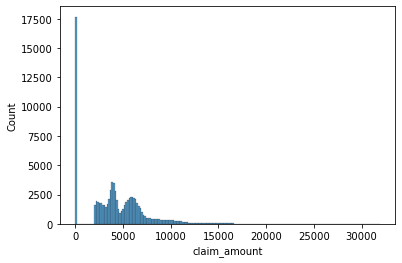

In [46]:
sns.histplot((train.claim_amount))

<AxesSubplot:xlabel='cltv', ylabel='Count'>

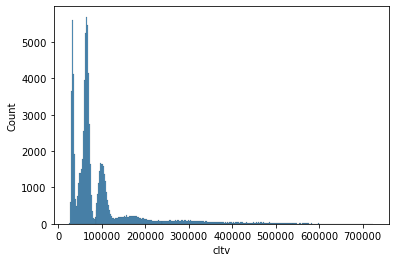

In [47]:
sns.histplot((train.cltv))

In [48]:
train.policy.unique()

array(['A', 'C', 'B'], dtype=object)

In [49]:
train.type_of_policy.unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [50]:
train.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [51]:
train.vintage.unique()

array([5, 8, 7, 6, 1, 0, 3, 4, 2], dtype=int64)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [53]:
 for col in train.select_dtypes(['object']).columns:
        print(col, train[col].unique())

gender ['Male' 'Female']
area ['Urban' 'Rural']
qualification ['Bachelor' 'High School' 'Others']
income ['5L-10L' 'More than 10L' '2L-5L' '<=2L']
num_policies ['More than 1' '1']
policy ['A' 'C' 'B']
type_of_policy ['Platinum' 'Gold' 'Silver']


In [54]:
qualification_dict = {'Others': 0,'High School':1, 'Bachelor': 2}
income_dict = {'<=2L': 0,  '2L-5L':1, '5L-10L':2,  'More than 10L' :3 }
num_policies_dict =  {'1': 0,'More than 1': 1 }
type_of_policy_dict = { 'Silver': 0,  'Gold' : 1 , 'Platinum': 2}

In [55]:
train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [56]:
def label_df(df):
    qualification_dict = {'Others': 0,'High School':1, 'Bachelor': 2}
    income_dict = {'<=2L': 0,  '2L-5L':1, '5L-10L':2,  'More than 10L' :3 }
    num_policies_dict =  {'1': 0,'More than 1': 1 }
    type_of_policy_dict = { 'Silver': 0,  'Gold' : 1 , 'Platinum': 2}
    
    df['qualification'] = df['qualification'].map(qualification_dict)
    df['income'] = df['income'].map(income_dict)
    df['num_policies'] = df['num_policies'].map(num_policies_dict)
    df['type_of_policy'] =  df['type_of_policy'].map(type_of_policy_dict)   
    
    return df

In [57]:
label_df(train)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,2,2,1,5,5790,1,A,2,64308
1,2,Male,Rural,1,2,0,8,5080,1,A,2,515400
2,3,Male,Urban,2,2,1,8,2599,1,A,2,64212
3,4,Female,Rural,1,2,0,7,0,1,A,2,97920
4,5,Male,Urban,1,3,1,6,3508,1,A,1,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,1,3,0,6,0,1,B,2,95736
89388,89389,Male,Urban,2,2,1,0,3897,1,A,2,67596
89389,89390,Female,Urban,2,2,0,4,3363,1,B,2,114120
89390,89391,Female,Rural,1,1,0,8,0,1,B,2,71772


In [58]:
label_df(test)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,1,2,0,6,2134,1,B,0
1,89394,Female,Urban,1,1,0,4,4102,1,A,2
2,89395,Male,Rural,1,2,1,7,2925,1,B,1
3,89396,Female,Rural,2,3,1,2,0,1,B,0
4,89397,Female,Urban,1,1,0,5,14059,1,B,0
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,2,2,1,6,0,0,A,0
59591,148984,Male,Urban,1,2,0,6,0,0,C,1
59592,148985,Female,Urban,1,1,1,4,3323,1,B,2
59593,148986,Male,Rural,2,2,0,1,2886,1,A,0


In [59]:
train = pd.get_dummies(train, drop_first = True)

In [60]:
test  = pd.get_dummies(test, drop_first = True)

In [61]:
train_features = train.drop(['id', 'cltv'], axis = 'columns')

In [62]:
train_target = train['cltv']

In [63]:
test_features = test.drop(['id'], axis = 'columns')

In [64]:
from catboost import CatBoostRegressor

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
model_eval = []

n_estimators=  [100, 200,250,500]
learning_rate = [0.1, 0.05]
    
for n in n_estimators:
    for lr in learning_rate:
        model = CatBoostRegressor(learning_rate=lr,n_estimators=n)
        r2_score = cross_val_score(model, train_features,train_target, cv = 5, scoring = 'r2').mean()
        neg_mean_squared_error = cross_val_score(model, train_features, train_target, cv =5, 
                                            scoring = 'neg_mean_squared_error').mean()
        model_eval.append(['GradientBoostingRegressor',n,lr, r2_score, neg_mean_squared_error])
        model.fit(train_features, train_target)
        test['cltv'] = model.predict(test_features)
        submission = test[['id','cltv']]
        submission.to_csv('CatBoost'+'n_'+str(n)+'lr_'+str(lr)+'.csv', index = False)

0:	learn: 89258.5199589	total: 11.3ms	remaining: 1.11s
1:	learn: 88177.1192837	total: 20.9ms	remaining: 1.02s
2:	learn: 87344.5732366	total: 29.6ms	remaining: 958ms
3:	learn: 86596.9032315	total: 39.4ms	remaining: 946ms
4:	learn: 85974.9871987	total: 50.6ms	remaining: 962ms
5:	learn: 85469.4044007	total: 60.8ms	remaining: 953ms
6:	learn: 85033.4890254	total: 69.7ms	remaining: 926ms
7:	learn: 84670.3886667	total: 79.4ms	remaining: 913ms
8:	learn: 84393.9743126	total: 87.1ms	remaining: 881ms
9:	learn: 84160.6665793	total: 95.5ms	remaining: 859ms
10:	learn: 83955.5728661	total: 103ms	remaining: 837ms
11:	learn: 83798.5579009	total: 110ms	remaining: 810ms
12:	learn: 83658.0237426	total: 118ms	remaining: 789ms
13:	learn: 83533.5181889	total: 125ms	remaining: 768ms
14:	learn: 83442.7284973	total: 132ms	remaining: 749ms
15:	learn: 83358.4715666	total: 139ms	remaining: 732ms
16:	learn: 83282.7606096	total: 146ms	remaining: 715ms
17:	learn: 83227.2770033	total: 155ms	remaining: 705ms
18:	learn:

63:	learn: 82068.7477735	total: 553ms	remaining: 311ms
64:	learn: 82061.2410627	total: 560ms	remaining: 302ms
65:	learn: 82057.7072731	total: 568ms	remaining: 293ms
66:	learn: 82047.9070439	total: 575ms	remaining: 283ms
67:	learn: 82041.3443089	total: 582ms	remaining: 274ms
68:	learn: 82036.8407137	total: 589ms	remaining: 265ms
69:	learn: 82031.6546194	total: 596ms	remaining: 256ms
70:	learn: 82025.1720279	total: 604ms	remaining: 247ms
71:	learn: 82018.2838683	total: 611ms	remaining: 238ms
72:	learn: 82011.3673583	total: 619ms	remaining: 229ms
73:	learn: 82004.3591450	total: 628ms	remaining: 221ms
74:	learn: 81999.7072642	total: 638ms	remaining: 213ms
75:	learn: 81996.9178010	total: 648ms	remaining: 205ms
76:	learn: 81993.1483560	total: 655ms	remaining: 196ms
77:	learn: 81988.5803860	total: 663ms	remaining: 187ms
78:	learn: 81982.0735669	total: 670ms	remaining: 178ms
79:	learn: 81978.9860349	total: 678ms	remaining: 169ms
80:	learn: 81971.6383910	total: 685ms	remaining: 161ms
81:	learn:

24:	learn: 83117.4566814	total: 191ms	remaining: 572ms
25:	learn: 83100.3606650	total: 198ms	remaining: 563ms
26:	learn: 83084.2094860	total: 205ms	remaining: 554ms
27:	learn: 83070.5131561	total: 213ms	remaining: 549ms
28:	learn: 83057.2856870	total: 222ms	remaining: 544ms
29:	learn: 83046.7843115	total: 231ms	remaining: 538ms
30:	learn: 83034.2751441	total: 240ms	remaining: 534ms
31:	learn: 83025.6456753	total: 248ms	remaining: 527ms
32:	learn: 83014.0748013	total: 259ms	remaining: 525ms
33:	learn: 83002.2498362	total: 268ms	remaining: 519ms
34:	learn: 82991.4378552	total: 278ms	remaining: 516ms
35:	learn: 82980.8211204	total: 287ms	remaining: 510ms
36:	learn: 82973.5153888	total: 295ms	remaining: 503ms
37:	learn: 82966.2500300	total: 304ms	remaining: 496ms
38:	learn: 82958.0411508	total: 312ms	remaining: 488ms
39:	learn: 82956.5609674	total: 317ms	remaining: 475ms
40:	learn: 82946.2292172	total: 324ms	remaining: 466ms
41:	learn: 82938.8681490	total: 332ms	remaining: 458ms
42:	learn:

74:	learn: 83041.6370574	total: 724ms	remaining: 241ms
75:	learn: 83035.2039846	total: 734ms	remaining: 232ms
76:	learn: 83028.3821936	total: 745ms	remaining: 223ms
77:	learn: 83021.7935474	total: 756ms	remaining: 213ms
78:	learn: 83018.6401482	total: 767ms	remaining: 204ms
79:	learn: 83012.1642174	total: 778ms	remaining: 194ms
80:	learn: 83005.9545177	total: 789ms	remaining: 185ms
81:	learn: 83002.6531054	total: 799ms	remaining: 175ms
82:	learn: 82994.3523387	total: 808ms	remaining: 166ms
83:	learn: 82986.8051960	total: 819ms	remaining: 156ms
84:	learn: 82986.7048046	total: 825ms	remaining: 146ms
85:	learn: 82982.2026783	total: 837ms	remaining: 136ms
86:	learn: 82973.5736334	total: 847ms	remaining: 127ms
87:	learn: 82967.3489784	total: 857ms	remaining: 117ms
88:	learn: 82962.8277191	total: 866ms	remaining: 107ms
89:	learn: 82959.5458017	total: 875ms	remaining: 97.3ms
90:	learn: 82957.1253313	total: 886ms	remaining: 87.6ms
91:	learn: 82950.2969243	total: 895ms	remaining: 77.8ms
92:	lea

23:	learn: 82395.9487723	total: 194ms	remaining: 613ms
24:	learn: 82374.8898914	total: 202ms	remaining: 606ms
25:	learn: 82351.6572470	total: 210ms	remaining: 598ms
26:	learn: 82339.7430017	total: 219ms	remaining: 591ms
27:	learn: 82326.8187439	total: 227ms	remaining: 583ms
28:	learn: 82311.8960416	total: 234ms	remaining: 573ms
29:	learn: 82302.1117237	total: 242ms	remaining: 564ms
30:	learn: 82293.1129961	total: 249ms	remaining: 554ms
31:	learn: 82283.2782111	total: 257ms	remaining: 545ms
32:	learn: 82273.6280332	total: 264ms	remaining: 535ms
33:	learn: 82269.2097249	total: 270ms	remaining: 525ms
34:	learn: 82256.0551917	total: 277ms	remaining: 515ms
35:	learn: 82247.3568817	total: 284ms	remaining: 505ms
36:	learn: 82239.0627765	total: 291ms	remaining: 495ms
37:	learn: 82231.2380958	total: 299ms	remaining: 488ms
38:	learn: 82216.8707517	total: 306ms	remaining: 479ms
39:	learn: 82211.2843245	total: 315ms	remaining: 472ms
40:	learn: 82204.2104693	total: 322ms	remaining: 463ms
41:	learn:

96:	learn: 82673.3602454	total: 719ms	remaining: 22.2ms
97:	learn: 82672.0920607	total: 726ms	remaining: 14.8ms
98:	learn: 82667.0185044	total: 733ms	remaining: 7.41ms
99:	learn: 82662.8722286	total: 740ms	remaining: 0us
0:	learn: 89448.3804855	total: 16.4ms	remaining: 1.62s
1:	learn: 88351.8489899	total: 33ms	remaining: 1.62s
2:	learn: 87510.6239042	total: 50.3ms	remaining: 1.63s
3:	learn: 86743.6335405	total: 59.7ms	remaining: 1.43s
4:	learn: 86114.9718315	total: 67.2ms	remaining: 1.28s
5:	learn: 85598.5657419	total: 75ms	remaining: 1.17s
6:	learn: 85159.5034279	total: 82.1ms	remaining: 1.09s
7:	learn: 84794.6027820	total: 89.8ms	remaining: 1.03s
8:	learn: 84523.6916626	total: 96.7ms	remaining: 977ms
9:	learn: 84291.8547326	total: 104ms	remaining: 938ms
10:	learn: 84088.2177809	total: 111ms	remaining: 901ms
11:	learn: 83918.3669223	total: 120ms	remaining: 878ms
12:	learn: 83780.9849015	total: 128ms	remaining: 855ms
13:	learn: 83669.3520795	total: 137ms	remaining: 839ms
14:	learn: 835

46:	learn: 83221.9393482	total: 371ms	remaining: 418ms
47:	learn: 83213.5345768	total: 378ms	remaining: 410ms
48:	learn: 83205.7395241	total: 386ms	remaining: 402ms
49:	learn: 83198.9391434	total: 394ms	remaining: 394ms
50:	learn: 83189.3107687	total: 403ms	remaining: 387ms
51:	learn: 83183.3878705	total: 411ms	remaining: 380ms
52:	learn: 83172.4912024	total: 420ms	remaining: 373ms
53:	learn: 83169.9062908	total: 429ms	remaining: 366ms
54:	learn: 83163.0052049	total: 438ms	remaining: 358ms
55:	learn: 83156.9271673	total: 447ms	remaining: 351ms
56:	learn: 83153.9872403	total: 455ms	remaining: 343ms
57:	learn: 83147.1496087	total: 464ms	remaining: 336ms
58:	learn: 83140.4188562	total: 472ms	remaining: 328ms
59:	learn: 83133.4355329	total: 481ms	remaining: 321ms
60:	learn: 83126.5708890	total: 488ms	remaining: 312ms
61:	learn: 83121.8408177	total: 496ms	remaining: 304ms
62:	learn: 83112.4092045	total: 503ms	remaining: 295ms
63:	learn: 83103.2575454	total: 510ms	remaining: 287ms
64:	learn:

0:	learn: 89913.6324828	total: 10.2ms	remaining: 1.01s
1:	learn: 89300.4750394	total: 17.8ms	remaining: 873ms
2:	learn: 88748.3983971	total: 23ms	remaining: 742ms
3:	learn: 88254.8942190	total: 29.6ms	remaining: 711ms
4:	learn: 87798.8248589	total: 37.1ms	remaining: 704ms
5:	learn: 87379.6946432	total: 45ms	remaining: 704ms
6:	learn: 86987.3546369	total: 53.7ms	remaining: 714ms
7:	learn: 86636.8965256	total: 62.7ms	remaining: 721ms
8:	learn: 86315.7214886	total: 70.8ms	remaining: 716ms
9:	learn: 86010.7251797	total: 78.8ms	remaining: 709ms
10:	learn: 85737.3459400	total: 86.5ms	remaining: 700ms
11:	learn: 85494.4646751	total: 93.7ms	remaining: 687ms
12:	learn: 85272.8588561	total: 100ms	remaining: 673ms
13:	learn: 85069.3290016	total: 108ms	remaining: 662ms
14:	learn: 84889.9125851	total: 116ms	remaining: 656ms
15:	learn: 84726.4814610	total: 123ms	remaining: 643ms
16:	learn: 84572.9113031	total: 133ms	remaining: 648ms
17:	learn: 84427.0302032	total: 139ms	remaining: 635ms
18:	learn: 8

53:	learn: 82349.5636624	total: 565ms	remaining: 482ms
54:	learn: 82342.2136643	total: 575ms	remaining: 471ms
55:	learn: 82335.8743518	total: 585ms	remaining: 460ms
56:	learn: 82328.8880568	total: 594ms	remaining: 448ms
57:	learn: 82327.1278115	total: 601ms	remaining: 435ms
58:	learn: 82319.7498582	total: 610ms	remaining: 424ms
59:	learn: 82311.9135916	total: 619ms	remaining: 412ms
60:	learn: 82303.3907798	total: 627ms	remaining: 401ms
61:	learn: 82298.4673144	total: 635ms	remaining: 389ms
62:	learn: 82293.0155845	total: 645ms	remaining: 379ms
63:	learn: 82288.5562931	total: 656ms	remaining: 369ms
64:	learn: 82282.8223437	total: 668ms	remaining: 360ms
65:	learn: 82278.3453889	total: 679ms	remaining: 350ms
66:	learn: 82273.4075682	total: 690ms	remaining: 340ms
67:	learn: 82267.1645256	total: 701ms	remaining: 330ms
68:	learn: 82263.4958313	total: 711ms	remaining: 319ms
69:	learn: 82259.0297676	total: 721ms	remaining: 309ms
70:	learn: 82254.7626676	total: 732ms	remaining: 299ms
71:	learn:

18:	learn: 84453.8336296	total: 189ms	remaining: 806ms
19:	learn: 84336.3221328	total: 196ms	remaining: 785ms
20:	learn: 84231.1621918	total: 203ms	remaining: 766ms
21:	learn: 84135.6506077	total: 211ms	remaining: 749ms
22:	learn: 84055.9462152	total: 218ms	remaining: 729ms
23:	learn: 83973.9715774	total: 226ms	remaining: 716ms
24:	learn: 83900.7310765	total: 235ms	remaining: 705ms
25:	learn: 83827.3526619	total: 244ms	remaining: 696ms
26:	learn: 83775.2234057	total: 251ms	remaining: 679ms
27:	learn: 83724.5316451	total: 261ms	remaining: 671ms
28:	learn: 83669.6842485	total: 270ms	remaining: 661ms
29:	learn: 83621.2550967	total: 279ms	remaining: 651ms
30:	learn: 83576.2049939	total: 288ms	remaining: 641ms
31:	learn: 83532.0131504	total: 297ms	remaining: 632ms
32:	learn: 83489.7561105	total: 306ms	remaining: 622ms
33:	learn: 83455.2170948	total: 316ms	remaining: 612ms
34:	learn: 83425.6619311	total: 325ms	remaining: 604ms
35:	learn: 83392.7344008	total: 335ms	remaining: 595ms
36:	learn:

76:	learn: 83265.1686351	total: 623ms	remaining: 186ms
77:	learn: 83262.5649769	total: 630ms	remaining: 178ms
78:	learn: 83258.8471044	total: 638ms	remaining: 170ms
79:	learn: 83255.4380630	total: 646ms	remaining: 161ms
80:	learn: 83252.3581892	total: 654ms	remaining: 153ms
81:	learn: 83247.4626346	total: 661ms	remaining: 145ms
82:	learn: 83243.7641631	total: 669ms	remaining: 137ms
83:	learn: 83240.0129364	total: 677ms	remaining: 129ms
84:	learn: 83237.1381189	total: 684ms	remaining: 121ms
85:	learn: 83233.5614526	total: 693ms	remaining: 113ms
86:	learn: 83230.5294127	total: 701ms	remaining: 105ms
87:	learn: 83228.4202529	total: 709ms	remaining: 96.6ms
88:	learn: 83224.8936565	total: 716ms	remaining: 88.5ms
89:	learn: 83219.6212469	total: 724ms	remaining: 80.5ms
90:	learn: 83217.2701154	total: 732ms	remaining: 72.4ms
91:	learn: 83214.3166949	total: 740ms	remaining: 64.4ms
92:	learn: 83211.4334073	total: 748ms	remaining: 56.3ms
93:	learn: 83208.0998820	total: 755ms	remaining: 48.2ms
94:

45:	learn: 82438.2517811	total: 395ms	remaining: 464ms
46:	learn: 82423.4409689	total: 404ms	remaining: 455ms
47:	learn: 82413.8745629	total: 412ms	remaining: 446ms
48:	learn: 82401.2264626	total: 421ms	remaining: 438ms
49:	learn: 82389.7756411	total: 430ms	remaining: 430ms
50:	learn: 82378.2229996	total: 439ms	remaining: 422ms
51:	learn: 82366.8254715	total: 449ms	remaining: 414ms
52:	learn: 82357.5233797	total: 458ms	remaining: 406ms
53:	learn: 82349.5636624	total: 467ms	remaining: 398ms
54:	learn: 82342.2136643	total: 475ms	remaining: 389ms
55:	learn: 82335.8743518	total: 484ms	remaining: 380ms
56:	learn: 82328.8880568	total: 493ms	remaining: 372ms
57:	learn: 82327.1278115	total: 499ms	remaining: 361ms
58:	learn: 82319.7498582	total: 508ms	remaining: 353ms
59:	learn: 82311.9135916	total: 518ms	remaining: 345ms
60:	learn: 82303.3907798	total: 527ms	remaining: 337ms
61:	learn: 82298.4673144	total: 535ms	remaining: 328ms
62:	learn: 82293.0155845	total: 544ms	remaining: 319ms
63:	learn:

2:	learn: 88967.7170695	total: 22.4ms	remaining: 723ms
3:	learn: 88439.5195592	total: 31ms	remaining: 744ms
4:	learn: 87965.4844498	total: 40ms	remaining: 759ms
5:	learn: 87534.7929593	total: 48.7ms	remaining: 763ms
6:	learn: 87141.0023631	total: 57.4ms	remaining: 763ms
7:	learn: 86774.0468859	total: 65.5ms	remaining: 753ms
8:	learn: 86456.9831184	total: 73.8ms	remaining: 746ms
9:	learn: 86155.8830688	total: 82.2ms	remaining: 739ms
10:	learn: 85888.8546742	total: 90.4ms	remaining: 732ms
11:	learn: 85642.3236617	total: 98.4ms	remaining: 721ms
12:	learn: 85419.1972672	total: 107ms	remaining: 713ms
13:	learn: 85214.5166870	total: 115ms	remaining: 705ms
14:	learn: 85032.5526704	total: 122ms	remaining: 694ms
15:	learn: 84871.3738582	total: 129ms	remaining: 676ms
16:	learn: 84715.8433569	total: 136ms	remaining: 666ms
17:	learn: 84579.5100892	total: 144ms	remaining: 657ms
18:	learn: 84453.8336296	total: 152ms	remaining: 647ms
19:	learn: 84336.3221328	total: 159ms	remaining: 638ms
20:	learn: 8

64:	learn: 83319.1968291	total: 547ms	remaining: 295ms
65:	learn: 83314.2630244	total: 570ms	remaining: 294ms
66:	learn: 83310.4434034	total: 582ms	remaining: 287ms
67:	learn: 83302.9256635	total: 600ms	remaining: 282ms
68:	learn: 83298.5372803	total: 614ms	remaining: 276ms
69:	learn: 83292.5248810	total: 627ms	remaining: 269ms
70:	learn: 83288.7658879	total: 637ms	remaining: 260ms
71:	learn: 83285.7583999	total: 646ms	remaining: 251ms
72:	learn: 83281.1084379	total: 656ms	remaining: 243ms
73:	learn: 83276.0820711	total: 666ms	remaining: 234ms
74:	learn: 83272.3662146	total: 676ms	remaining: 225ms
75:	learn: 83268.8452591	total: 686ms	remaining: 216ms
76:	learn: 83265.1686351	total: 693ms	remaining: 207ms
77:	learn: 83262.5649769	total: 701ms	remaining: 198ms
78:	learn: 83258.8471044	total: 709ms	remaining: 189ms
79:	learn: 83255.4380630	total: 719ms	remaining: 180ms
80:	learn: 83252.3581892	total: 727ms	remaining: 171ms
81:	learn: 83247.4626346	total: 736ms	remaining: 162ms
82:	learn:

21:	learn: 83071.7521869	total: 189ms	remaining: 1.52s
22:	learn: 83044.4387837	total: 199ms	remaining: 1.53s
23:	learn: 83020.1954033	total: 209ms	remaining: 1.53s
24:	learn: 83000.6951148	total: 222ms	remaining: 1.55s
25:	learn: 82980.9182452	total: 232ms	remaining: 1.55s
26:	learn: 82963.6508282	total: 242ms	remaining: 1.55s
27:	learn: 82947.8838667	total: 252ms	remaining: 1.55s
28:	learn: 82930.4353840	total: 262ms	remaining: 1.54s
29:	learn: 82920.6652048	total: 271ms	remaining: 1.54s
30:	learn: 82907.5964353	total: 281ms	remaining: 1.53s
31:	learn: 82898.4508194	total: 291ms	remaining: 1.53s
32:	learn: 82890.5863372	total: 300ms	remaining: 1.52s
33:	learn: 82879.5998003	total: 308ms	remaining: 1.5s
34:	learn: 82867.6520597	total: 316ms	remaining: 1.49s
35:	learn: 82857.9762237	total: 324ms	remaining: 1.48s
36:	learn: 82850.1613856	total: 332ms	remaining: 1.46s
37:	learn: 82842.6020812	total: 340ms	remaining: 1.45s
38:	learn: 82833.3073209	total: 349ms	remaining: 1.44s
39:	learn: 

182:	learn: 82119.2392527	total: 1.6s	remaining: 149ms
183:	learn: 82114.1005845	total: 1.61s	remaining: 140ms
184:	learn: 82110.2574548	total: 1.62s	remaining: 131ms
185:	learn: 82106.6547306	total: 1.63s	remaining: 122ms
186:	learn: 82101.7117180	total: 1.63s	remaining: 114ms
187:	learn: 82097.4058972	total: 1.64s	remaining: 105ms
188:	learn: 82091.8163111	total: 1.65s	remaining: 96ms
189:	learn: 82087.8928826	total: 1.66s	remaining: 87.3ms
190:	learn: 82083.2843745	total: 1.67s	remaining: 78.5ms
191:	learn: 82079.5123431	total: 1.67s	remaining: 69.7ms
192:	learn: 82076.4986288	total: 1.68s	remaining: 61ms
193:	learn: 82073.9750661	total: 1.69s	remaining: 52.3ms
194:	learn: 82069.9645457	total: 1.7s	remaining: 43.6ms
195:	learn: 82066.1158421	total: 1.71s	remaining: 34.9ms
196:	learn: 82062.6149536	total: 1.72s	remaining: 26.2ms
197:	learn: 82058.7940190	total: 1.73s	remaining: 17.4ms
198:	learn: 82055.2717221	total: 1.74s	remaining: 8.72ms
199:	learn: 82051.8760046	total: 1.75s	rema

131:	learn: 81713.1576753	total: 1.07s	remaining: 551ms
132:	learn: 81710.4862892	total: 1.08s	remaining: 543ms
133:	learn: 81701.3885880	total: 1.08s	remaining: 534ms
134:	learn: 81694.9561795	total: 1.09s	remaining: 527ms
135:	learn: 81687.9489421	total: 1.1s	remaining: 518ms
136:	learn: 81685.6748464	total: 1.11s	remaining: 510ms
137:	learn: 81680.5530672	total: 1.12s	remaining: 501ms
138:	learn: 81674.8905273	total: 1.12s	remaining: 493ms
139:	learn: 81668.4339217	total: 1.13s	remaining: 485ms
140:	learn: 81664.2919335	total: 1.14s	remaining: 476ms
141:	learn: 81660.5632138	total: 1.15s	remaining: 468ms
142:	learn: 81655.7012081	total: 1.15s	remaining: 459ms
143:	learn: 81652.6710083	total: 1.16s	remaining: 451ms
144:	learn: 81646.0536152	total: 1.17s	remaining: 443ms
145:	learn: 81641.9270374	total: 1.17s	remaining: 434ms
146:	learn: 81636.5668217	total: 1.18s	remaining: 426ms
147:	learn: 81631.2580201	total: 1.19s	remaining: 418ms
148:	learn: 81624.9539580	total: 1.2s	remaining: 

98:	learn: 82667.0185044	total: 801ms	remaining: 817ms
99:	learn: 82662.8722286	total: 809ms	remaining: 809ms
100:	learn: 82655.4333703	total: 816ms	remaining: 800ms
101:	learn: 82651.4426448	total: 824ms	remaining: 791ms
102:	learn: 82647.4151025	total: 831ms	remaining: 783ms
103:	learn: 82644.2903811	total: 840ms	remaining: 775ms
104:	learn: 82639.5028889	total: 847ms	remaining: 766ms
105:	learn: 82631.1003963	total: 855ms	remaining: 758ms
106:	learn: 82626.1130764	total: 864ms	remaining: 751ms
107:	learn: 82622.7871722	total: 872ms	remaining: 743ms
108:	learn: 82618.0211806	total: 882ms	remaining: 736ms
109:	learn: 82612.4410007	total: 892ms	remaining: 730ms
110:	learn: 82605.0137366	total: 900ms	remaining: 722ms
111:	learn: 82601.7119117	total: 910ms	remaining: 715ms
112:	learn: 82594.0703877	total: 919ms	remaining: 708ms
113:	learn: 82589.7893552	total: 928ms	remaining: 700ms
114:	learn: 82583.5246215	total: 936ms	remaining: 692ms
115:	learn: 82578.6409872	total: 945ms	remaining: 

64:	learn: 82799.0054906	total: 537ms	remaining: 1.11s
65:	learn: 82791.6205349	total: 544ms	remaining: 1.1s
66:	learn: 82788.7257308	total: 552ms	remaining: 1.09s
67:	learn: 82784.1135788	total: 560ms	remaining: 1.09s
68:	learn: 82774.8142545	total: 567ms	remaining: 1.08s
69:	learn: 82771.4067183	total: 575ms	remaining: 1.07s
70:	learn: 82767.7417022	total: 582ms	remaining: 1.06s
71:	learn: 82762.7409999	total: 589ms	remaining: 1.05s
72:	learn: 82756.1179778	total: 596ms	remaining: 1.04s
73:	learn: 82752.8875613	total: 605ms	remaining: 1.03s
74:	learn: 82748.2808374	total: 614ms	remaining: 1.02s
75:	learn: 82745.2487211	total: 622ms	remaining: 1.01s
76:	learn: 82740.0315118	total: 630ms	remaining: 1.01s
77:	learn: 82731.6812611	total: 639ms	remaining: 999ms
78:	learn: 82728.6343134	total: 646ms	remaining: 990ms
79:	learn: 82724.7944598	total: 653ms	remaining: 980ms
80:	learn: 82719.4588094	total: 661ms	remaining: 971ms
81:	learn: 82715.3309732	total: 669ms	remaining: 963ms
82:	learn: 

33:	learn: 83320.5198213	total: 246ms	remaining: 1.2s
34:	learn: 83314.4423145	total: 253ms	remaining: 1.19s
35:	learn: 83309.8313217	total: 259ms	remaining: 1.18s
36:	learn: 83298.0745671	total: 266ms	remaining: 1.17s
37:	learn: 83289.9379673	total: 273ms	remaining: 1.16s
38:	learn: 83281.7693863	total: 280ms	remaining: 1.15s
39:	learn: 83276.4832408	total: 286ms	remaining: 1.15s
40:	learn: 83265.6479934	total: 293ms	remaining: 1.14s
41:	learn: 83255.0281615	total: 300ms	remaining: 1.13s
42:	learn: 83247.1698941	total: 307ms	remaining: 1.12s
43:	learn: 83239.6864863	total: 314ms	remaining: 1.11s
44:	learn: 83232.2020402	total: 321ms	remaining: 1.11s
45:	learn: 83227.5932054	total: 329ms	remaining: 1.1s
46:	learn: 83221.9393482	total: 336ms	remaining: 1.09s
47:	learn: 83213.5345768	total: 343ms	remaining: 1.09s
48:	learn: 83205.7395241	total: 351ms	remaining: 1.08s
49:	learn: 83198.9391434	total: 358ms	remaining: 1.07s
50:	learn: 83189.3107687	total: 365ms	remaining: 1.07s
51:	learn: 8

192:	learn: 82471.4601253	total: 1.48s	remaining: 53.8ms
193:	learn: 82468.3084981	total: 1.49s	remaining: 46.2ms
194:	learn: 82464.6343356	total: 1.5s	remaining: 38.5ms
195:	learn: 82461.0504754	total: 1.51s	remaining: 30.8ms
196:	learn: 82457.4814184	total: 1.52s	remaining: 23.1ms
197:	learn: 82452.8178097	total: 1.52s	remaining: 15.4ms
198:	learn: 82447.4177494	total: 1.53s	remaining: 7.7ms
199:	learn: 82443.1814260	total: 1.54s	remaining: 0us
0:	learn: 89258.5199589	total: 9.97ms	remaining: 1.98s
1:	learn: 88177.1192837	total: 19.7ms	remaining: 1.95s
2:	learn: 87344.5732366	total: 25.6ms	remaining: 1.68s
3:	learn: 86596.9032315	total: 35.2ms	remaining: 1.73s
4:	learn: 85974.9871987	total: 44.3ms	remaining: 1.73s
5:	learn: 85469.4044007	total: 53.2ms	remaining: 1.72s
6:	learn: 85033.4890254	total: 63.2ms	remaining: 1.74s
7:	learn: 84670.3886667	total: 72.2ms	remaining: 1.73s
8:	learn: 84393.9743126	total: 81.3ms	remaining: 1.73s
9:	learn: 84160.6665793	total: 90.2ms	remaining: 1.71s

152:	learn: 82247.5502278	total: 1.28s	remaining: 392ms
153:	learn: 82242.2037128	total: 1.29s	remaining: 384ms
154:	learn: 82237.5212478	total: 1.29s	remaining: 376ms
155:	learn: 82233.1087093	total: 1.3s	remaining: 368ms
156:	learn: 82228.7428540	total: 1.31s	remaining: 360ms
157:	learn: 82224.6701788	total: 1.32s	remaining: 351ms
158:	learn: 82219.8392164	total: 1.33s	remaining: 343ms
159:	learn: 82215.6082089	total: 1.34s	remaining: 335ms
160:	learn: 82207.9253954	total: 1.35s	remaining: 326ms
161:	learn: 82202.8890498	total: 1.35s	remaining: 318ms
162:	learn: 82198.5152317	total: 1.36s	remaining: 310ms
163:	learn: 82195.4001711	total: 1.37s	remaining: 301ms
164:	learn: 82193.0626065	total: 1.38s	remaining: 293ms
165:	learn: 82189.0722075	total: 1.39s	remaining: 284ms
166:	learn: 82185.2136192	total: 1.4s	remaining: 276ms
167:	learn: 82180.4033203	total: 1.4s	remaining: 267ms
168:	learn: 82176.4692349	total: 1.41s	remaining: 259ms
169:	learn: 82171.8959147	total: 1.42s	remaining: 2

103:	learn: 81860.3566142	total: 750ms	remaining: 692ms
104:	learn: 81855.9048276	total: 756ms	remaining: 684ms
105:	learn: 81850.4366908	total: 763ms	remaining: 677ms
106:	learn: 81841.5671134	total: 771ms	remaining: 670ms
107:	learn: 81834.7597895	total: 779ms	remaining: 664ms
108:	learn: 81829.1450108	total: 786ms	remaining: 656ms
109:	learn: 81824.5424163	total: 793ms	remaining: 649ms
110:	learn: 81818.1970385	total: 801ms	remaining: 642ms
111:	learn: 81811.9427900	total: 809ms	remaining: 635ms
112:	learn: 81808.2277834	total: 817ms	remaining: 629ms
113:	learn: 81804.4490378	total: 825ms	remaining: 622ms
114:	learn: 81797.6241757	total: 834ms	remaining: 616ms
115:	learn: 81794.0168375	total: 842ms	remaining: 610ms
116:	learn: 81787.3800151	total: 850ms	remaining: 603ms
117:	learn: 81781.6901083	total: 857ms	remaining: 596ms
118:	learn: 81778.1596693	total: 864ms	remaining: 588ms
119:	learn: 81774.3516796	total: 871ms	remaining: 581ms
120:	learn: 81768.7418205	total: 878ms	remaining

66:	learn: 82818.6581434	total: 552ms	remaining: 1.09s
67:	learn: 82811.9747476	total: 559ms	remaining: 1.08s
68:	learn: 82808.7626376	total: 566ms	remaining: 1.07s
69:	learn: 82801.5314666	total: 573ms	remaining: 1.06s
70:	learn: 82799.6986669	total: 579ms	remaining: 1.05s
71:	learn: 82795.5581967	total: 586ms	remaining: 1.04s
72:	learn: 82786.6922242	total: 593ms	remaining: 1.03s
73:	learn: 82781.9173690	total: 600ms	remaining: 1.02s
74:	learn: 82778.5076560	total: 607ms	remaining: 1.01s
75:	learn: 82774.4889087	total: 614ms	remaining: 1s
76:	learn: 82769.2473355	total: 622ms	remaining: 993ms
77:	learn: 82766.0455960	total: 629ms	remaining: 984ms
78:	learn: 82761.0165379	total: 636ms	remaining: 974ms
79:	learn: 82761.0038983	total: 640ms	remaining: 959ms
80:	learn: 82756.7183081	total: 647ms	remaining: 950ms
81:	learn: 82748.1169786	total: 654ms	remaining: 942ms
82:	learn: 82747.9156345	total: 660ms	remaining: 930ms
83:	learn: 82741.2420312	total: 668ms	remaining: 922ms
84:	learn: 82

25:	learn: 83100.3606650	total: 199ms	remaining: 1.33s
26:	learn: 83084.2094860	total: 206ms	remaining: 1.32s
27:	learn: 83070.5131561	total: 214ms	remaining: 1.31s
28:	learn: 83057.2856870	total: 222ms	remaining: 1.31s
29:	learn: 83046.7843115	total: 229ms	remaining: 1.29s
30:	learn: 83034.2751441	total: 236ms	remaining: 1.28s
31:	learn: 83025.6456753	total: 243ms	remaining: 1.27s
32:	learn: 83014.0748013	total: 249ms	remaining: 1.26s
33:	learn: 83002.2498362	total: 257ms	remaining: 1.25s
34:	learn: 82991.4378552	total: 263ms	remaining: 1.24s
35:	learn: 82980.8211204	total: 270ms	remaining: 1.23s
36:	learn: 82973.5153888	total: 278ms	remaining: 1.22s
37:	learn: 82966.2500300	total: 285ms	remaining: 1.22s
38:	learn: 82958.0411508	total: 294ms	remaining: 1.21s
39:	learn: 82956.5609674	total: 299ms	remaining: 1.2s
40:	learn: 82946.2292172	total: 307ms	remaining: 1.19s
41:	learn: 82938.8681490	total: 315ms	remaining: 1.18s
42:	learn: 82927.6876677	total: 322ms	remaining: 1.18s
43:	learn: 

190:	learn: 82190.6629188	total: 1.44s	remaining: 67.7ms
191:	learn: 82188.2907180	total: 1.44s	remaining: 60.2ms
192:	learn: 82181.4412410	total: 1.45s	remaining: 52.7ms
193:	learn: 82176.5345692	total: 1.46s	remaining: 45.2ms
194:	learn: 82172.6779491	total: 1.47s	remaining: 37.6ms
195:	learn: 82169.3328562	total: 1.47s	remaining: 30.1ms
196:	learn: 82164.3754403	total: 1.48s	remaining: 22.6ms
197:	learn: 82159.1653321	total: 1.49s	remaining: 15ms
198:	learn: 82154.4044213	total: 1.5s	remaining: 7.52ms
199:	learn: 82148.4272321	total: 1.5s	remaining: 0us
0:	learn: 89556.9984133	total: 9.07ms	remaining: 1.8s
1:	learn: 88484.2218123	total: 16.4ms	remaining: 1.62s
2:	learn: 87661.3964010	total: 20.9ms	remaining: 1.37s
3:	learn: 86914.2539718	total: 29.5ms	remaining: 1.45s
4:	learn: 86313.1287230	total: 37.4ms	remaining: 1.46s
5:	learn: 85817.7051379	total: 44.8ms	remaining: 1.45s
6:	learn: 85386.0982752	total: 52.1ms	remaining: 1.44s
7:	learn: 85029.1337104	total: 59.4ms	remaining: 1.43

148:	learn: 82671.5224716	total: 1.09s	remaining: 373ms
149:	learn: 82665.3101109	total: 1.1s	remaining: 366ms
150:	learn: 82661.5681608	total: 1.1s	remaining: 359ms
151:	learn: 82659.1419589	total: 1.11s	remaining: 351ms
152:	learn: 82655.1307496	total: 1.12s	remaining: 344ms
153:	learn: 82650.1103304	total: 1.13s	remaining: 337ms
154:	learn: 82646.7216916	total: 1.14s	remaining: 330ms
155:	learn: 82644.4514718	total: 1.14s	remaining: 322ms
156:	learn: 82641.1921641	total: 1.15s	remaining: 315ms
157:	learn: 82637.2564522	total: 1.16s	remaining: 308ms
158:	learn: 82633.0766962	total: 1.17s	remaining: 301ms
159:	learn: 82629.1029005	total: 1.17s	remaining: 294ms
160:	learn: 82626.4671510	total: 1.18s	remaining: 287ms
161:	learn: 82623.4407920	total: 1.19s	remaining: 279ms
162:	learn: 82619.6179109	total: 1.2s	remaining: 272ms
163:	learn: 82617.4562260	total: 1.21s	remaining: 265ms
164:	learn: 82612.7355462	total: 1.21s	remaining: 258ms
165:	learn: 82607.1002189	total: 1.22s	remaining: 2

100:	learn: 82623.2508662	total: 908ms	remaining: 890ms
101:	learn: 82617.5595318	total: 916ms	remaining: 880ms
102:	learn: 82613.5617087	total: 924ms	remaining: 870ms
103:	learn: 82611.7056271	total: 932ms	remaining: 861ms
104:	learn: 82608.5135791	total: 941ms	remaining: 851ms
105:	learn: 82603.2185416	total: 950ms	remaining: 842ms
106:	learn: 82598.5822548	total: 958ms	remaining: 832ms
107:	learn: 82596.0894179	total: 966ms	remaining: 823ms
108:	learn: 82591.6817069	total: 974ms	remaining: 813ms
109:	learn: 82588.1402551	total: 982ms	remaining: 803ms
110:	learn: 82583.8388289	total: 990ms	remaining: 794ms
111:	learn: 82577.8277617	total: 998ms	remaining: 784ms
112:	learn: 82574.4137150	total: 1.01s	remaining: 775ms
113:	learn: 82570.5925357	total: 1.01s	remaining: 766ms
114:	learn: 82569.0290673	total: 1.02s	remaining: 758ms
115:	learn: 82565.1209232	total: 1.04s	remaining: 751ms
116:	learn: 82560.3478838	total: 1.05s	remaining: 745ms
117:	learn: 82555.7233980	total: 1.06s	remaining

56:	learn: 82958.6494730	total: 545ms	remaining: 1.37s
57:	learn: 82952.3823589	total: 554ms	remaining: 1.36s
58:	learn: 82944.9518222	total: 564ms	remaining: 1.35s
59:	learn: 82937.1623841	total: 574ms	remaining: 1.34s
60:	learn: 82931.3407444	total: 584ms	remaining: 1.33s
61:	learn: 82924.0828893	total: 592ms	remaining: 1.32s
62:	learn: 82917.2114497	total: 600ms	remaining: 1.3s
63:	learn: 82911.1272011	total: 608ms	remaining: 1.29s
64:	learn: 82905.3509549	total: 617ms	remaining: 1.28s
65:	learn: 82901.2816794	total: 626ms	remaining: 1.27s
66:	learn: 82896.3603454	total: 634ms	remaining: 1.26s
67:	learn: 82888.4919471	total: 642ms	remaining: 1.25s
68:	learn: 82883.2783840	total: 651ms	remaining: 1.24s
69:	learn: 82878.4719815	total: 658ms	remaining: 1.22s
70:	learn: 82873.2182825	total: 667ms	remaining: 1.21s
71:	learn: 82868.3757432	total: 675ms	remaining: 1.2s
72:	learn: 82863.7149386	total: 682ms	remaining: 1.19s
73:	learn: 82858.8144042	total: 689ms	remaining: 1.17s
74:	learn: 8

9:	learn: 85384.1867519	total: 86.9ms	remaining: 1.65s
10:	learn: 85109.8670328	total: 95.3ms	remaining: 1.64s
11:	learn: 84866.6773402	total: 104ms	remaining: 1.62s
12:	learn: 84645.8609718	total: 111ms	remaining: 1.6s
13:	learn: 84446.6847794	total: 119ms	remaining: 1.59s
14:	learn: 84265.9512899	total: 128ms	remaining: 1.57s
15:	learn: 84102.1834844	total: 135ms	remaining: 1.55s
16:	learn: 83954.0393926	total: 143ms	remaining: 1.53s
17:	learn: 83817.3237468	total: 151ms	remaining: 1.52s
18:	learn: 83687.1749685	total: 159ms	remaining: 1.52s
19:	learn: 83566.8605455	total: 168ms	remaining: 1.51s
20:	learn: 83460.3596777	total: 176ms	remaining: 1.5s
21:	learn: 83367.3954101	total: 184ms	remaining: 1.49s
22:	learn: 83287.6198679	total: 191ms	remaining: 1.47s
23:	learn: 83204.4259180	total: 200ms	remaining: 1.47s
24:	learn: 83129.8632708	total: 211ms	remaining: 1.48s
25:	learn: 83057.0681087	total: 219ms	remaining: 1.47s
26:	learn: 83005.9940652	total: 225ms	remaining: 1.44s
27:	learn: 

164:	learn: 81960.6763039	total: 1.32s	remaining: 280ms
165:	learn: 81957.6206428	total: 1.33s	remaining: 272ms
166:	learn: 81955.3577744	total: 1.34s	remaining: 264ms
167:	learn: 81953.5367022	total: 1.35s	remaining: 257ms
168:	learn: 81953.4873045	total: 1.35s	remaining: 248ms
169:	learn: 81951.8639295	total: 1.36s	remaining: 240ms
170:	learn: 81949.5397064	total: 1.37s	remaining: 232ms
171:	learn: 81945.8582365	total: 1.38s	remaining: 224ms
172:	learn: 81944.4746137	total: 1.39s	remaining: 217ms
173:	learn: 81940.7275645	total: 1.4s	remaining: 209ms
174:	learn: 81940.0798466	total: 1.4s	remaining: 200ms
175:	learn: 81940.0741011	total: 1.41s	remaining: 192ms
176:	learn: 81938.2052837	total: 1.42s	remaining: 184ms
177:	learn: 81936.8269954	total: 1.42s	remaining: 176ms
178:	learn: 81934.0147907	total: 1.43s	remaining: 168ms
179:	learn: 81929.1822709	total: 1.44s	remaining: 160ms
180:	learn: 81926.7166027	total: 1.45s	remaining: 152ms
181:	learn: 81924.5708395	total: 1.46s	remaining: 

136:	learn: 82804.6951656	total: 1.07s	remaining: 493ms
137:	learn: 82802.9884990	total: 1.08s	remaining: 485ms
138:	learn: 82801.2940053	total: 1.09s	remaining: 477ms
139:	learn: 82798.1572932	total: 1.09s	remaining: 469ms
140:	learn: 82796.6965407	total: 1.1s	remaining: 461ms
141:	learn: 82794.3778834	total: 1.11s	remaining: 453ms
142:	learn: 82792.8103984	total: 1.11s	remaining: 445ms
143:	learn: 82790.0665180	total: 1.12s	remaining: 437ms
144:	learn: 82786.6644123	total: 1.13s	remaining: 429ms
145:	learn: 82784.9218878	total: 1.14s	remaining: 421ms
146:	learn: 82779.9980845	total: 1.14s	remaining: 413ms
147:	learn: 82775.6567917	total: 1.15s	remaining: 405ms
148:	learn: 82773.6130270	total: 1.16s	remaining: 397ms
149:	learn: 82770.8086240	total: 1.17s	remaining: 390ms
150:	learn: 82767.6360928	total: 1.18s	remaining: 383ms
151:	learn: 82765.0452187	total: 1.19s	remaining: 375ms
152:	learn: 82763.4725068	total: 1.2s	remaining: 368ms
153:	learn: 82760.3361744	total: 1.21s	remaining: 

93:	learn: 82908.9491757	total: 722ms	remaining: 814ms
94:	learn: 82906.3010882	total: 729ms	remaining: 805ms
95:	learn: 82906.0892977	total: 733ms	remaining: 794ms
96:	learn: 82904.4139250	total: 742ms	remaining: 788ms
97:	learn: 82899.5862364	total: 749ms	remaining: 780ms
98:	learn: 82896.4309900	total: 756ms	remaining: 772ms
99:	learn: 82892.3240964	total: 764ms	remaining: 764ms
100:	learn: 82891.0842610	total: 771ms	remaining: 756ms
101:	learn: 82889.2950403	total: 780ms	remaining: 749ms
102:	learn: 82885.3942059	total: 788ms	remaining: 742ms
103:	learn: 82880.6838142	total: 795ms	remaining: 733ms
104:	learn: 82879.1053751	total: 802ms	remaining: 725ms
105:	learn: 82876.6322673	total: 809ms	remaining: 718ms
106:	learn: 82872.6539606	total: 816ms	remaining: 709ms
107:	learn: 82870.0382196	total: 823ms	remaining: 701ms
108:	learn: 82867.0241738	total: 830ms	remaining: 693ms
109:	learn: 82863.9106285	total: 838ms	remaining: 686ms
110:	learn: 82861.3418727	total: 846ms	remaining: 678ms

41:	learn: 83537.6806073	total: 374ms	remaining: 1.41s
42:	learn: 83520.5452254	total: 383ms	remaining: 1.4s
43:	learn: 83508.8517878	total: 390ms	remaining: 1.38s
44:	learn: 83492.9367798	total: 399ms	remaining: 1.37s
45:	learn: 83477.1439490	total: 407ms	remaining: 1.36s
46:	learn: 83463.1622132	total: 415ms	remaining: 1.35s
47:	learn: 83450.3864220	total: 424ms	remaining: 1.34s
48:	learn: 83439.5616576	total: 433ms	remaining: 1.33s
49:	learn: 83431.5171791	total: 442ms	remaining: 1.32s
50:	learn: 83419.8117928	total: 451ms	remaining: 1.32s
51:	learn: 83409.4525586	total: 459ms	remaining: 1.3s
52:	learn: 83398.8947658	total: 467ms	remaining: 1.29s
53:	learn: 83390.2062832	total: 475ms	remaining: 1.28s
54:	learn: 83382.9634719	total: 483ms	remaining: 1.27s
55:	learn: 83376.8549818	total: 493ms	remaining: 1.27s
56:	learn: 83368.3817720	total: 503ms	remaining: 1.26s
57:	learn: 83360.7939519	total: 510ms	remaining: 1.25s
58:	learn: 83352.6653047	total: 517ms	remaining: 1.24s
59:	learn: 8

0:	learn: 89913.6324828	total: 7.25ms	remaining: 1.44s
1:	learn: 89300.4750394	total: 15.8ms	remaining: 1.56s
2:	learn: 88748.3983971	total: 21.8ms	remaining: 1.43s
3:	learn: 88254.8942190	total: 30.6ms	remaining: 1.5s
4:	learn: 87798.8248589	total: 39.6ms	remaining: 1.54s
5:	learn: 87379.6946432	total: 49.5ms	remaining: 1.6s
6:	learn: 86987.3546369	total: 58ms	remaining: 1.6s
7:	learn: 86636.8965256	total: 67.3ms	remaining: 1.61s
8:	learn: 86315.7214886	total: 76.6ms	remaining: 1.63s
9:	learn: 86010.7251797	total: 85.4ms	remaining: 1.62s
10:	learn: 85737.3459400	total: 97.4ms	remaining: 1.67s
11:	learn: 85494.4646751	total: 107ms	remaining: 1.68s
12:	learn: 85272.8588561	total: 115ms	remaining: 1.65s
13:	learn: 85069.3290016	total: 124ms	remaining: 1.64s
14:	learn: 84889.9125851	total: 131ms	remaining: 1.61s
15:	learn: 84726.4814610	total: 137ms	remaining: 1.58s
16:	learn: 84572.9113031	total: 145ms	remaining: 1.56s
17:	learn: 84427.0302032	total: 154ms	remaining: 1.55s
18:	learn: 842

163:	learn: 82593.6178244	total: 1.44s	remaining: 317ms
164:	learn: 82590.9114615	total: 1.45s	remaining: 308ms
165:	learn: 82588.7007382	total: 1.46s	remaining: 299ms
166:	learn: 82586.6240559	total: 1.47s	remaining: 290ms
167:	learn: 82584.3588509	total: 1.48s	remaining: 281ms
168:	learn: 82584.3453805	total: 1.48s	remaining: 272ms
169:	learn: 82581.4481563	total: 1.49s	remaining: 263ms
170:	learn: 82579.5372521	total: 1.5s	remaining: 254ms
171:	learn: 82577.8345664	total: 1.5s	remaining: 245ms
172:	learn: 82575.8176587	total: 1.51s	remaining: 236ms
173:	learn: 82573.4821065	total: 1.52s	remaining: 227ms
174:	learn: 82572.0770240	total: 1.53s	remaining: 218ms
175:	learn: 82569.3591978	total: 1.53s	remaining: 209ms
176:	learn: 82566.6792014	total: 1.54s	remaining: 200ms
177:	learn: 82563.5869520	total: 1.55s	remaining: 191ms
178:	learn: 82561.3728919	total: 1.56s	remaining: 183ms
179:	learn: 82559.1261797	total: 1.57s	remaining: 174ms
180:	learn: 82556.9199564	total: 1.58s	remaining: 

124:	learn: 82066.6602839	total: 1.08s	remaining: 651ms
125:	learn: 82063.8472321	total: 1.09s	remaining: 642ms
126:	learn: 82061.9355324	total: 1.11s	remaining: 636ms
127:	learn: 82060.5714089	total: 1.11s	remaining: 627ms
128:	learn: 82057.9784079	total: 1.12s	remaining: 619ms
129:	learn: 82055.7372955	total: 1.13s	remaining: 610ms
130:	learn: 82053.0655809	total: 1.14s	remaining: 601ms
131:	learn: 82050.5046467	total: 1.15s	remaining: 593ms
132:	learn: 82047.8583131	total: 1.16s	remaining: 584ms
133:	learn: 82045.5957510	total: 1.17s	remaining: 576ms
134:	learn: 82045.4182815	total: 1.18s	remaining: 566ms
135:	learn: 82041.3301092	total: 1.19s	remaining: 558ms
136:	learn: 82037.7584545	total: 1.19s	remaining: 549ms
137:	learn: 82035.9615464	total: 1.2s	remaining: 541ms
138:	learn: 82033.2947647	total: 1.21s	remaining: 533ms
139:	learn: 82030.8230250	total: 1.22s	remaining: 524ms
140:	learn: 82029.2676152	total: 1.23s	remaining: 515ms
141:	learn: 82027.3860590	total: 1.24s	remaining:

84:	learn: 82969.8909120	total: 720ms	remaining: 974ms
85:	learn: 82965.2463884	total: 728ms	remaining: 965ms
86:	learn: 82962.2139517	total: 736ms	remaining: 956ms
87:	learn: 82959.0108129	total: 744ms	remaining: 947ms
88:	learn: 82955.6432064	total: 755ms	remaining: 941ms
89:	learn: 82951.4694441	total: 765ms	remaining: 935ms
90:	learn: 82945.4316997	total: 775ms	remaining: 928ms
91:	learn: 82942.2003613	total: 784ms	remaining: 920ms
92:	learn: 82938.0969989	total: 793ms	remaining: 912ms
93:	learn: 82934.0642374	total: 802ms	remaining: 904ms
94:	learn: 82930.2400979	total: 811ms	remaining: 896ms
95:	learn: 82927.3591514	total: 819ms	remaining: 887ms
96:	learn: 82923.8755801	total: 827ms	remaining: 878ms
97:	learn: 82921.9032824	total: 834ms	remaining: 868ms
98:	learn: 82917.6674110	total: 842ms	remaining: 859ms
99:	learn: 82914.2335623	total: 850ms	remaining: 850ms
100:	learn: 82911.3480906	total: 858ms	remaining: 841ms
101:	learn: 82907.4097850	total: 865ms	remaining: 831ms
102:	lea

53:	learn: 83109.5517670	total: 444ms	remaining: 1.2s
54:	learn: 83101.5699434	total: 451ms	remaining: 1.19s
55:	learn: 83094.0073990	total: 458ms	remaining: 1.18s
56:	learn: 83085.2788385	total: 465ms	remaining: 1.17s
57:	learn: 83075.5629061	total: 473ms	remaining: 1.16s
58:	learn: 83068.6343199	total: 480ms	remaining: 1.15s
59:	learn: 83062.9443101	total: 487ms	remaining: 1.14s
60:	learn: 83055.3210865	total: 494ms	remaining: 1.12s
61:	learn: 83051.6576706	total: 501ms	remaining: 1.11s
62:	learn: 83046.2802634	total: 509ms	remaining: 1.1s
63:	learn: 83040.9061695	total: 516ms	remaining: 1.09s
64:	learn: 83034.7345002	total: 524ms	remaining: 1.09s
65:	learn: 83029.9708526	total: 531ms	remaining: 1.08s
66:	learn: 83026.6359302	total: 538ms	remaining: 1.07s
67:	learn: 83018.7142490	total: 545ms	remaining: 1.06s
68:	learn: 83015.8901095	total: 554ms	remaining: 1.05s
69:	learn: 83009.7785399	total: 561ms	remaining: 1.04s
70:	learn: 83006.1103757	total: 568ms	remaining: 1.03s
71:	learn: 8

5:	learn: 87704.1244980	total: 59.9ms	remaining: 1.94s
6:	learn: 87319.2004296	total: 70ms	remaining: 1.93s
7:	learn: 86959.6456246	total: 81.1ms	remaining: 1.95s
8:	learn: 86651.0302324	total: 90.7ms	remaining: 1.93s
9:	learn: 86355.6485747	total: 100ms	remaining: 1.9s
10:	learn: 86088.4385917	total: 111ms	remaining: 1.9s
11:	learn: 85853.2332015	total: 120ms	remaining: 1.88s
12:	learn: 85636.1348800	total: 130ms	remaining: 1.88s
13:	learn: 85435.4567244	total: 140ms	remaining: 1.86s
14:	learn: 85257.7795834	total: 150ms	remaining: 1.84s
15:	learn: 85098.3961745	total: 158ms	remaining: 1.81s
16:	learn: 84950.2811593	total: 168ms	remaining: 1.8s
17:	learn: 84814.4286813	total: 176ms	remaining: 1.78s
18:	learn: 84692.9165983	total: 185ms	remaining: 1.76s
19:	learn: 84581.4089955	total: 193ms	remaining: 1.74s
20:	learn: 84478.6161252	total: 201ms	remaining: 1.72s
21:	learn: 84383.7924423	total: 209ms	remaining: 1.69s
22:	learn: 84305.0896924	total: 215ms	remaining: 1.66s
23:	learn: 84226

165:	learn: 83003.6224489	total: 1.29s	remaining: 264ms
166:	learn: 82999.9324173	total: 1.3s	remaining: 256ms
167:	learn: 82999.5845659	total: 1.3s	remaining: 248ms
168:	learn: 82995.9103102	total: 1.31s	remaining: 240ms
169:	learn: 82993.6755126	total: 1.32s	remaining: 232ms
170:	learn: 82990.5998536	total: 1.32s	remaining: 224ms
171:	learn: 82988.8767902	total: 1.33s	remaining: 217ms
172:	learn: 82988.7610837	total: 1.33s	remaining: 208ms
173:	learn: 82984.8828418	total: 1.34s	remaining: 200ms
174:	learn: 82982.6494975	total: 1.35s	remaining: 193ms
175:	learn: 82978.8817517	total: 1.35s	remaining: 185ms
176:	learn: 82977.3428821	total: 1.36s	remaining: 177ms
177:	learn: 82975.2053129	total: 1.37s	remaining: 170ms
178:	learn: 82971.4174008	total: 1.38s	remaining: 162ms
179:	learn: 82969.1950006	total: 1.39s	remaining: 154ms
180:	learn: 82965.3675692	total: 1.4s	remaining: 147ms
181:	learn: 82963.8389885	total: 1.4s	remaining: 139ms
182:	learn: 82962.0520613	total: 1.41s	remaining: 13

126:	learn: 82747.5750767	total: 1.45s	remaining: 836ms
127:	learn: 82745.9791141	total: 1.47s	remaining: 825ms
128:	learn: 82744.0480406	total: 1.48s	remaining: 813ms
129:	learn: 82741.1540100	total: 1.49s	remaining: 801ms
130:	learn: 82737.9192711	total: 1.5s	remaining: 788ms
131:	learn: 82736.3809691	total: 1.5s	remaining: 775ms
132:	learn: 82734.4130193	total: 1.51s	remaining: 763ms
133:	learn: 82732.3597986	total: 1.52s	remaining: 751ms
134:	learn: 82730.0793319	total: 1.53s	remaining: 739ms
135:	learn: 82727.9201231	total: 1.54s	remaining: 727ms
136:	learn: 82724.3057495	total: 1.55s	remaining: 715ms
137:	learn: 82723.0088880	total: 1.56s	remaining: 703ms
138:	learn: 82722.9572701	total: 1.57s	remaining: 690ms
139:	learn: 82719.5483039	total: 1.58s	remaining: 678ms
140:	learn: 82717.1946646	total: 1.59s	remaining: 666ms
141:	learn: 82715.3647212	total: 1.6s	remaining: 653ms
142:	learn: 82714.6572930	total: 1.61s	remaining: 641ms
143:	learn: 82712.5246912	total: 1.62s	remaining: 6

89:	learn: 82552.4220455	total: 726ms	remaining: 1.29s
90:	learn: 82547.8385508	total: 734ms	remaining: 1.28s
91:	learn: 82545.0245723	total: 743ms	remaining: 1.27s
92:	learn: 82543.5209914	total: 751ms	remaining: 1.27s
93:	learn: 82536.6848321	total: 760ms	remaining: 1.26s
94:	learn: 82528.7624526	total: 769ms	remaining: 1.25s
95:	learn: 82525.9803465	total: 778ms	remaining: 1.25s
96:	learn: 82520.4932773	total: 787ms	remaining: 1.24s
97:	learn: 82517.8895354	total: 796ms	remaining: 1.23s
98:	learn: 82512.3225827	total: 805ms	remaining: 1.23s
99:	learn: 82508.5350679	total: 813ms	remaining: 1.22s
100:	learn: 82503.7044988	total: 822ms	remaining: 1.21s
101:	learn: 82498.8553442	total: 831ms	remaining: 1.21s
102:	learn: 82492.5884637	total: 839ms	remaining: 1.2s
103:	learn: 82489.4994437	total: 848ms	remaining: 1.19s
104:	learn: 82484.0175958	total: 857ms	remaining: 1.18s
105:	learn: 82477.0491247	total: 865ms	remaining: 1.18s
106:	learn: 82472.1257656	total: 874ms	remaining: 1.17s
107:

245:	learn: 81845.5615198	total: 2.33s	remaining: 37.8ms
246:	learn: 81841.8853395	total: 2.33s	remaining: 28.4ms
247:	learn: 81838.4988316	total: 2.34s	remaining: 18.9ms
248:	learn: 81834.5213457	total: 2.35s	remaining: 9.45ms
249:	learn: 81831.7452869	total: 2.36s	remaining: 0us
0:	learn: 88634.6987106	total: 8.65ms	remaining: 2.15s
1:	learn: 87552.8641468	total: 16.5ms	remaining: 2.05s
2:	learn: 86712.2838564	total: 21.1ms	remaining: 1.73s
3:	learn: 85941.5324199	total: 29.5ms	remaining: 1.81s
4:	learn: 85319.9014384	total: 38.1ms	remaining: 1.86s
5:	learn: 84813.5536183	total: 46.4ms	remaining: 1.89s
6:	learn: 84380.1353610	total: 54.4ms	remaining: 1.89s
7:	learn: 84018.1427263	total: 63.1ms	remaining: 1.91s
8:	learn: 83749.3465382	total: 70.8ms	remaining: 1.9s
9:	learn: 83516.3853053	total: 79.6ms	remaining: 1.91s
10:	learn: 83312.1597581	total: 87.8ms	remaining: 1.91s
11:	learn: 83157.8720788	total: 94.4ms	remaining: 1.87s
12:	learn: 83018.5832487	total: 102ms	remaining: 1.87s
13

159:	learn: 81570.9828240	total: 1.48s	remaining: 833ms
160:	learn: 81565.6405563	total: 1.49s	remaining: 824ms
161:	learn: 81561.3488502	total: 1.5s	remaining: 814ms
162:	learn: 81556.6805089	total: 1.51s	remaining: 804ms
163:	learn: 81552.9537125	total: 1.51s	remaining: 794ms
164:	learn: 81547.7864591	total: 1.52s	remaining: 784ms
165:	learn: 81542.0089654	total: 1.53s	remaining: 774ms
166:	learn: 81538.9470997	total: 1.54s	remaining: 764ms
167:	learn: 81535.7628161	total: 1.54s	remaining: 754ms
168:	learn: 81532.7527658	total: 1.55s	remaining: 744ms
169:	learn: 81529.2012528	total: 1.56s	remaining: 734ms
170:	learn: 81525.3687994	total: 1.57s	remaining: 724ms
171:	learn: 81521.5578800	total: 1.57s	remaining: 714ms
172:	learn: 81517.1666463	total: 1.58s	remaining: 704ms
173:	learn: 81513.3848722	total: 1.59s	remaining: 694ms
174:	learn: 81511.3070621	total: 1.6s	remaining: 684ms
175:	learn: 81506.5052946	total: 1.6s	remaining: 674ms
176:	learn: 81501.9638452	total: 1.61s	remaining: 6

69:	learn: 82801.5314666	total: 570ms	remaining: 1.47s
70:	learn: 82799.6986669	total: 576ms	remaining: 1.45s
71:	learn: 82795.5581967	total: 583ms	remaining: 1.44s
72:	learn: 82786.6922242	total: 590ms	remaining: 1.43s
73:	learn: 82781.9173690	total: 597ms	remaining: 1.42s
74:	learn: 82778.5076560	total: 605ms	remaining: 1.41s
75:	learn: 82774.4889087	total: 612ms	remaining: 1.4s
76:	learn: 82769.2473355	total: 619ms	remaining: 1.39s
77:	learn: 82766.0455960	total: 626ms	remaining: 1.38s
78:	learn: 82761.0165379	total: 634ms	remaining: 1.37s
79:	learn: 82761.0038983	total: 638ms	remaining: 1.35s
80:	learn: 82756.7183081	total: 645ms	remaining: 1.34s
81:	learn: 82748.1169786	total: 653ms	remaining: 1.34s
82:	learn: 82747.9156345	total: 658ms	remaining: 1.32s
83:	learn: 82741.2420312	total: 666ms	remaining: 1.31s
84:	learn: 82735.9672700	total: 674ms	remaining: 1.31s
85:	learn: 82727.3901825	total: 682ms	remaining: 1.3s
86:	learn: 82724.8417718	total: 691ms	remaining: 1.29s
87:	learn: 8

230:	learn: 82053.6577114	total: 1.81s	remaining: 149ms
231:	learn: 82048.9755542	total: 1.81s	remaining: 141ms
232:	learn: 82045.6208530	total: 1.82s	remaining: 133ms
233:	learn: 82041.7480057	total: 1.83s	remaining: 125ms
234:	learn: 82038.7802502	total: 1.84s	remaining: 117ms
235:	learn: 82034.1013660	total: 1.84s	remaining: 109ms
236:	learn: 82030.1082459	total: 1.85s	remaining: 102ms
237:	learn: 82025.7842861	total: 1.86s	remaining: 93.8ms
238:	learn: 82021.8055421	total: 1.87s	remaining: 85.9ms
239:	learn: 82016.3075320	total: 1.87s	remaining: 78.1ms
240:	learn: 82012.7752829	total: 1.88s	remaining: 70.3ms
241:	learn: 82008.9730451	total: 1.89s	remaining: 62.4ms
242:	learn: 82005.7757378	total: 1.9s	remaining: 54.6ms
243:	learn: 82001.6529176	total: 1.9s	remaining: 46.8ms
244:	learn: 81996.0001777	total: 1.91s	remaining: 39ms
245:	learn: 81993.4365265	total: 1.92s	remaining: 31.2ms
246:	learn: 81989.5611332	total: 1.93s	remaining: 23.4ms
247:	learn: 81984.4309271	total: 1.93s	rem

139:	learn: 82421.7390805	total: 1.08s	remaining: 847ms
140:	learn: 82416.3763743	total: 1.08s	remaining: 839ms
141:	learn: 82411.1968956	total: 1.09s	remaining: 831ms
142:	learn: 82407.7556604	total: 1.1s	remaining: 823ms
143:	learn: 82404.0299527	total: 1.11s	remaining: 815ms
144:	learn: 82400.7178168	total: 1.11s	remaining: 807ms
145:	learn: 82398.1574818	total: 1.12s	remaining: 799ms
146:	learn: 82391.4154850	total: 1.13s	remaining: 790ms
147:	learn: 82386.4664102	total: 1.14s	remaining: 782ms
148:	learn: 82381.6495287	total: 1.14s	remaining: 774ms
149:	learn: 82377.6413319	total: 1.15s	remaining: 766ms
150:	learn: 82371.2498444	total: 1.16s	remaining: 758ms
151:	learn: 82364.5764361	total: 1.16s	remaining: 750ms
152:	learn: 82358.6091517	total: 1.17s	remaining: 743ms
153:	learn: 82354.1820030	total: 1.18s	remaining: 735ms
154:	learn: 82349.5435599	total: 1.19s	remaining: 727ms
155:	learn: 82343.4769399	total: 1.19s	remaining: 719ms
156:	learn: 82339.1321401	total: 1.2s	remaining: 

50:	learn: 83189.3107687	total: 416ms	remaining: 1.62s
51:	learn: 83183.3878705	total: 422ms	remaining: 1.61s
52:	learn: 83172.4912024	total: 429ms	remaining: 1.6s
53:	learn: 83169.9062908	total: 440ms	remaining: 1.6s
54:	learn: 83163.0052049	total: 450ms	remaining: 1.59s
55:	learn: 83156.9271673	total: 461ms	remaining: 1.6s
56:	learn: 83153.9872403	total: 471ms	remaining: 1.59s
57:	learn: 83147.1496087	total: 481ms	remaining: 1.59s
58:	learn: 83140.4188562	total: 492ms	remaining: 1.59s
59:	learn: 83133.4355329	total: 503ms	remaining: 1.59s
60:	learn: 83126.5708890	total: 511ms	remaining: 1.58s
61:	learn: 83121.8408177	total: 520ms	remaining: 1.58s
62:	learn: 83112.4092045	total: 531ms	remaining: 1.57s
63:	learn: 83103.2575454	total: 542ms	remaining: 1.57s
64:	learn: 83096.5207423	total: 549ms	remaining: 1.56s
65:	learn: 83087.3426333	total: 556ms	remaining: 1.55s
66:	learn: 83080.9858371	total: 564ms	remaining: 1.54s
67:	learn: 83075.0007255	total: 573ms	remaining: 1.53s
68:	learn: 83

208:	learn: 82401.7601835	total: 1.65s	remaining: 324ms
209:	learn: 82397.9612133	total: 1.66s	remaining: 316ms
210:	learn: 82395.0621869	total: 1.67s	remaining: 308ms
211:	learn: 82391.9351453	total: 1.67s	remaining: 300ms
212:	learn: 82387.0597362	total: 1.68s	remaining: 292ms
213:	learn: 82383.3565590	total: 1.69s	remaining: 284ms
214:	learn: 82380.2627339	total: 1.7s	remaining: 276ms
215:	learn: 82375.7263053	total: 1.7s	remaining: 268ms
216:	learn: 82371.2807380	total: 1.71s	remaining: 260ms
217:	learn: 82368.4298013	total: 1.72s	remaining: 252ms
218:	learn: 82365.1140601	total: 1.73s	remaining: 244ms
219:	learn: 82360.5769005	total: 1.73s	remaining: 236ms
220:	learn: 82354.9707926	total: 1.74s	remaining: 228ms
221:	learn: 82349.1521673	total: 1.75s	remaining: 220ms
222:	learn: 82345.5209457	total: 1.76s	remaining: 213ms
223:	learn: 82340.2073855	total: 1.76s	remaining: 205ms
224:	learn: 82334.1488601	total: 1.77s	remaining: 197ms
225:	learn: 82331.1901344	total: 1.78s	remaining: 

117:	learn: 82413.3449018	total: 897ms	remaining: 1s
118:	learn: 82409.9107034	total: 906ms	remaining: 997ms
119:	learn: 82405.8656290	total: 914ms	remaining: 990ms
120:	learn: 82401.4409096	total: 922ms	remaining: 983ms
121:	learn: 82396.8052587	total: 931ms	remaining: 976ms
122:	learn: 82389.6782962	total: 939ms	remaining: 969ms
123:	learn: 82382.5690222	total: 946ms	remaining: 962ms
124:	learn: 82377.6718289	total: 955ms	remaining: 955ms
125:	learn: 82372.6376503	total: 963ms	remaining: 948ms
126:	learn: 82368.7010121	total: 971ms	remaining: 940ms
127:	learn: 82363.1839936	total: 980ms	remaining: 934ms
128:	learn: 82356.4118702	total: 988ms	remaining: 927ms
129:	learn: 82353.0792289	total: 996ms	remaining: 920ms
130:	learn: 82348.2409146	total: 1s	remaining: 912ms
131:	learn: 82340.7016060	total: 1.01s	remaining: 905ms
132:	learn: 82337.9640014	total: 1.02s	remaining: 899ms
133:	learn: 82334.0766349	total: 1.03s	remaining: 893ms
134:	learn: 82327.0928995	total: 1.04s	remaining: 885m

23:	learn: 82395.9487723	total: 189ms	remaining: 1.78s
24:	learn: 82374.8898914	total: 198ms	remaining: 1.78s
25:	learn: 82351.6572470	total: 207ms	remaining: 1.78s
26:	learn: 82339.7430017	total: 214ms	remaining: 1.76s
27:	learn: 82326.8187439	total: 221ms	remaining: 1.75s
28:	learn: 82311.8960416	total: 228ms	remaining: 1.74s
29:	learn: 82302.1117237	total: 235ms	remaining: 1.72s
30:	learn: 82293.1129961	total: 242ms	remaining: 1.71s
31:	learn: 82283.2782111	total: 249ms	remaining: 1.7s
32:	learn: 82273.6280332	total: 258ms	remaining: 1.7s
33:	learn: 82269.2097249	total: 266ms	remaining: 1.69s
34:	learn: 82256.0551917	total: 273ms	remaining: 1.68s
35:	learn: 82247.3568817	total: 280ms	remaining: 1.67s
36:	learn: 82239.0627765	total: 289ms	remaining: 1.66s
37:	learn: 82231.2380958	total: 297ms	remaining: 1.66s
38:	learn: 82216.8707517	total: 305ms	remaining: 1.65s
39:	learn: 82211.2843245	total: 313ms	remaining: 1.64s
40:	learn: 82204.2104693	total: 321ms	remaining: 1.64s
41:	learn: 8

189:	learn: 81444.7455295	total: 1.43s	remaining: 451ms
190:	learn: 81441.4127122	total: 1.43s	remaining: 443ms
191:	learn: 81437.4586937	total: 1.44s	remaining: 435ms
192:	learn: 81433.9043261	total: 1.45s	remaining: 428ms
193:	learn: 81429.6420330	total: 1.46s	remaining: 420ms
194:	learn: 81425.6562017	total: 1.46s	remaining: 413ms
195:	learn: 81423.0452326	total: 1.47s	remaining: 405ms
196:	learn: 81418.8657666	total: 1.48s	remaining: 398ms
197:	learn: 81413.6373297	total: 1.49s	remaining: 390ms
198:	learn: 81408.2260379	total: 1.5s	remaining: 383ms
199:	learn: 81402.5014842	total: 1.5s	remaining: 376ms
200:	learn: 81398.8450910	total: 1.51s	remaining: 368ms
201:	learn: 81396.2613661	total: 1.52s	remaining: 361ms
202:	learn: 81394.0167231	total: 1.52s	remaining: 353ms
203:	learn: 81389.8325578	total: 1.53s	remaining: 346ms
204:	learn: 81385.4113239	total: 1.54s	remaining: 338ms
205:	learn: 81379.5762586	total: 1.55s	remaining: 330ms
206:	learn: 81374.8476008	total: 1.55s	remaining: 

96:	learn: 82673.3602454	total: 717ms	remaining: 1.13s
97:	learn: 82672.0920607	total: 724ms	remaining: 1.12s
98:	learn: 82667.0185044	total: 731ms	remaining: 1.11s
99:	learn: 82662.8722286	total: 739ms	remaining: 1.11s
100:	learn: 82655.4333703	total: 746ms	remaining: 1.1s
101:	learn: 82651.4426448	total: 753ms	remaining: 1.09s
102:	learn: 82647.4151025	total: 760ms	remaining: 1.08s
103:	learn: 82644.2903811	total: 767ms	remaining: 1.08s
104:	learn: 82639.5028889	total: 774ms	remaining: 1.07s
105:	learn: 82631.1003963	total: 781ms	remaining: 1.06s
106:	learn: 82626.1130764	total: 788ms	remaining: 1.05s
107:	learn: 82622.7871722	total: 796ms	remaining: 1.05s
108:	learn: 82618.0211806	total: 804ms	remaining: 1.04s
109:	learn: 82612.4410007	total: 811ms	remaining: 1.03s
110:	learn: 82605.0137366	total: 818ms	remaining: 1.02s
111:	learn: 82601.7119117	total: 825ms	remaining: 1.02s
112:	learn: 82594.0703877	total: 832ms	remaining: 1.01s
113:	learn: 82589.7893552	total: 839ms	remaining: 1s


0:	learn: 89448.3804855	total: 9.53ms	remaining: 2.37s
1:	learn: 88351.8489899	total: 18.9ms	remaining: 2.35s
2:	learn: 87510.6239042	total: 25.3ms	remaining: 2.09s
3:	learn: 86743.6335405	total: 34.6ms	remaining: 2.13s
4:	learn: 86114.9718315	total: 42.8ms	remaining: 2.1s
5:	learn: 85598.5657419	total: 50.2ms	remaining: 2.04s
6:	learn: 85159.5034279	total: 57.5ms	remaining: 2s
7:	learn: 84794.6027820	total: 65.3ms	remaining: 1.97s
8:	learn: 84523.6916626	total: 72.4ms	remaining: 1.94s
9:	learn: 84291.8547326	total: 79.6ms	remaining: 1.91s
10:	learn: 84088.2177809	total: 86.7ms	remaining: 1.88s
11:	learn: 83918.3669223	total: 93.8ms	remaining: 1.86s
12:	learn: 83780.9849015	total: 101ms	remaining: 1.84s
13:	learn: 83669.3520795	total: 109ms	remaining: 1.83s
14:	learn: 83573.9682383	total: 116ms	remaining: 1.81s
15:	learn: 83495.3576962	total: 122ms	remaining: 1.78s
16:	learn: 83426.9858005	total: 129ms	remaining: 1.77s
17:	learn: 83358.2331953	total: 136ms	remaining: 1.75s
18:	learn: 8

165:	learn: 82303.7153800	total: 1.26s	remaining: 637ms
166:	learn: 82298.3805189	total: 1.27s	remaining: 629ms
167:	learn: 82293.9691506	total: 1.27s	remaining: 622ms
168:	learn: 82286.9749464	total: 1.28s	remaining: 614ms
169:	learn: 82282.2410652	total: 1.29s	remaining: 606ms
170:	learn: 82277.9921012	total: 1.3s	remaining: 599ms
171:	learn: 82273.2905817	total: 1.3s	remaining: 592ms
172:	learn: 82269.8103037	total: 1.31s	remaining: 584ms
173:	learn: 82264.7772357	total: 1.32s	remaining: 576ms
174:	learn: 82261.4362463	total: 1.33s	remaining: 569ms
175:	learn: 82256.5541739	total: 1.34s	remaining: 562ms
176:	learn: 82251.9314302	total: 1.34s	remaining: 554ms
177:	learn: 82248.4096223	total: 1.35s	remaining: 547ms
178:	learn: 82243.7440025	total: 1.36s	remaining: 539ms
179:	learn: 82240.0143205	total: 1.37s	remaining: 531ms
180:	learn: 82235.2725363	total: 1.37s	remaining: 524ms
181:	learn: 82229.6728133	total: 1.38s	remaining: 516ms
182:	learn: 82223.8978270	total: 1.39s	remaining: 

73:	learn: 83045.4102657	total: 538ms	remaining: 1.28s
74:	learn: 83041.6370574	total: 546ms	remaining: 1.27s
75:	learn: 83035.2039846	total: 553ms	remaining: 1.27s
76:	learn: 83028.3821936	total: 561ms	remaining: 1.26s
77:	learn: 83021.7935474	total: 568ms	remaining: 1.25s
78:	learn: 83018.6401482	total: 575ms	remaining: 1.25s
79:	learn: 83012.1642174	total: 582ms	remaining: 1.24s
80:	learn: 83005.9545177	total: 589ms	remaining: 1.23s
81:	learn: 83002.6531054	total: 596ms	remaining: 1.22s
82:	learn: 82994.3523387	total: 603ms	remaining: 1.21s
83:	learn: 82986.8051960	total: 610ms	remaining: 1.21s
84:	learn: 82986.7048046	total: 615ms	remaining: 1.19s
85:	learn: 82982.2026783	total: 622ms	remaining: 1.19s
86:	learn: 82973.5736334	total: 628ms	remaining: 1.18s
87:	learn: 82967.3489784	total: 635ms	remaining: 1.17s
88:	learn: 82962.8277191	total: 642ms	remaining: 1.16s
89:	learn: 82959.5458017	total: 649ms	remaining: 1.15s
90:	learn: 82957.1253313	total: 657ms	remaining: 1.15s
91:	learn:

238:	learn: 82280.4348424	total: 1.77s	remaining: 81.5ms
239:	learn: 82276.5270606	total: 1.78s	remaining: 74.1ms
240:	learn: 82272.3883912	total: 1.79s	remaining: 66.7ms
241:	learn: 82270.1122000	total: 1.79s	remaining: 59.3ms
242:	learn: 82264.1785286	total: 1.8s	remaining: 51.9ms
243:	learn: 82260.1362192	total: 1.81s	remaining: 44.5ms
244:	learn: 82257.5873357	total: 1.82s	remaining: 37.1ms
245:	learn: 82253.9522010	total: 1.83s	remaining: 29.7ms
246:	learn: 82251.8267532	total: 1.84s	remaining: 22.3ms
247:	learn: 82247.9630273	total: 1.85s	remaining: 14.9ms
248:	learn: 82242.7915666	total: 1.86s	remaining: 7.48ms
249:	learn: 82238.0731769	total: 1.87s	remaining: 0us
0:	learn: 89252.7325032	total: 11.5ms	remaining: 2.85s
1:	learn: 88173.5764976	total: 22.1ms	remaining: 2.75s
2:	learn: 87337.4175993	total: 28.8ms	remaining: 2.37s
3:	learn: 86590.5034995	total: 39.6ms	remaining: 2.44s
4:	learn: 85970.3090354	total: 50.7ms	remaining: 2.49s
5:	learn: 85466.4440635	total: 62.6ms	remaini

157:	learn: 82385.6728894	total: 1.43s	remaining: 831ms
158:	learn: 82381.2409982	total: 1.44s	remaining: 823ms
159:	learn: 82376.2732804	total: 1.45s	remaining: 813ms
160:	learn: 82370.4041369	total: 1.45s	remaining: 804ms
161:	learn: 82365.7278907	total: 1.46s	remaining: 795ms
162:	learn: 82362.1054645	total: 1.47s	remaining: 785ms
163:	learn: 82358.5784988	total: 1.48s	remaining: 776ms
164:	learn: 82352.7141466	total: 1.49s	remaining: 766ms
165:	learn: 82348.9582831	total: 1.5s	remaining: 757ms
166:	learn: 82345.1418121	total: 1.5s	remaining: 747ms
167:	learn: 82342.2154388	total: 1.51s	remaining: 738ms
168:	learn: 82338.1619516	total: 1.52s	remaining: 728ms
169:	learn: 82334.2566281	total: 1.53s	remaining: 719ms
170:	learn: 82328.4402294	total: 1.54s	remaining: 710ms
171:	learn: 82324.5329362	total: 1.54s	remaining: 701ms
172:	learn: 82321.0454869	total: 1.55s	remaining: 692ms
173:	learn: 82318.5725413	total: 1.56s	remaining: 683ms
174:	learn: 82314.0875635	total: 1.57s	remaining: 

61:	learn: 82924.0828893	total: 529ms	remaining: 1.6s
62:	learn: 82917.2114497	total: 538ms	remaining: 1.59s
63:	learn: 82911.1272011	total: 546ms	remaining: 1.59s
64:	learn: 82905.3509549	total: 555ms	remaining: 1.58s
65:	learn: 82901.2816794	total: 563ms	remaining: 1.57s
66:	learn: 82896.3603454	total: 572ms	remaining: 1.56s
67:	learn: 82888.4919471	total: 581ms	remaining: 1.56s
68:	learn: 82883.2783840	total: 591ms	remaining: 1.55s
69:	learn: 82878.4719815	total: 599ms	remaining: 1.54s
70:	learn: 82873.2182825	total: 608ms	remaining: 1.53s
71:	learn: 82868.3757432	total: 617ms	remaining: 1.53s
72:	learn: 82863.7149386	total: 626ms	remaining: 1.52s
73:	learn: 82858.8144042	total: 636ms	remaining: 1.51s
74:	learn: 82854.3909359	total: 645ms	remaining: 1.5s
75:	learn: 82849.9063514	total: 654ms	remaining: 1.5s
76:	learn: 82844.8565149	total: 663ms	remaining: 1.49s
77:	learn: 82841.5029802	total: 672ms	remaining: 1.48s
78:	learn: 82838.2977434	total: 680ms	remaining: 1.47s
79:	learn: 82

224:	learn: 82450.7359358	total: 1.9s	remaining: 211ms
225:	learn: 82448.1572765	total: 1.91s	remaining: 202ms
226:	learn: 82443.7615721	total: 1.91s	remaining: 194ms
227:	learn: 82441.5726387	total: 1.92s	remaining: 186ms
228:	learn: 82439.4340231	total: 1.93s	remaining: 177ms
229:	learn: 82437.7249596	total: 1.94s	remaining: 169ms
230:	learn: 82435.8642664	total: 1.95s	remaining: 160ms
231:	learn: 82432.5517326	total: 1.96s	remaining: 152ms
232:	learn: 82431.2937841	total: 1.96s	remaining: 143ms
233:	learn: 82428.7149788	total: 1.97s	remaining: 135ms
234:	learn: 82425.9714482	total: 1.98s	remaining: 127ms
235:	learn: 82423.8299522	total: 1.99s	remaining: 118ms
236:	learn: 82420.9520477	total: 2s	remaining: 110ms
237:	learn: 82418.7996525	total: 2.01s	remaining: 101ms
238:	learn: 82416.4541797	total: 2.02s	remaining: 92.9ms
239:	learn: 82414.4289070	total: 2.03s	remaining: 84.5ms
240:	learn: 82410.6396116	total: 2.04s	remaining: 76ms
241:	learn: 82408.5912079	total: 2.04s	remaining: 6

146:	learn: 82013.3556783	total: 1.1s	remaining: 770ms
147:	learn: 82007.6111704	total: 1.11s	remaining: 763ms
148:	learn: 82004.5788213	total: 1.11s	remaining: 755ms
149:	learn: 82002.3647070	total: 1.12s	remaining: 749ms
150:	learn: 82000.3750035	total: 1.13s	remaining: 742ms
151:	learn: 81997.1196027	total: 1.15s	remaining: 738ms
152:	learn: 81995.6130301	total: 1.16s	remaining: 734ms
153:	learn: 81992.1347462	total: 1.17s	remaining: 731ms
154:	learn: 81990.0030232	total: 1.18s	remaining: 725ms
155:	learn: 81987.5680887	total: 1.19s	remaining: 719ms
156:	learn: 81983.8612275	total: 1.21s	remaining: 714ms
157:	learn: 81981.7321998	total: 1.22s	remaining: 709ms
158:	learn: 81978.0712215	total: 1.23s	remaining: 703ms
159:	learn: 81975.1531148	total: 1.24s	remaining: 696ms
160:	learn: 81971.7002629	total: 1.25s	remaining: 690ms
161:	learn: 81970.0331584	total: 1.26s	remaining: 683ms
162:	learn: 81966.3391231	total: 1.27s	remaining: 676ms
163:	learn: 81963.6440516	total: 1.27s	remaining:

48:	learn: 83173.0920764	total: 379ms	remaining: 1.55s
49:	learn: 83163.1817837	total: 386ms	remaining: 1.54s
50:	learn: 83150.3661935	total: 392ms	remaining: 1.53s
51:	learn: 83139.4180783	total: 399ms	remaining: 1.52s
52:	learn: 83130.9025129	total: 407ms	remaining: 1.51s
53:	learn: 83123.0577687	total: 414ms	remaining: 1.5s
54:	learn: 83115.5525542	total: 421ms	remaining: 1.49s
55:	learn: 83108.3812058	total: 428ms	remaining: 1.48s
56:	learn: 83101.9108834	total: 435ms	remaining: 1.47s
57:	learn: 83099.8722254	total: 440ms	remaining: 1.46s
58:	learn: 83092.8383301	total: 446ms	remaining: 1.45s
59:	learn: 83084.9525995	total: 453ms	remaining: 1.44s
60:	learn: 83078.0903663	total: 461ms	remaining: 1.43s
61:	learn: 83073.0902136	total: 470ms	remaining: 1.43s
62:	learn: 83067.3026240	total: 478ms	remaining: 1.42s
63:	learn: 83061.4371378	total: 485ms	remaining: 1.41s
64:	learn: 83056.8688766	total: 492ms	remaining: 1.4s
65:	learn: 83052.4728992	total: 499ms	remaining: 1.39s
66:	learn: 8

213:	learn: 82620.5504409	total: 1.62s	remaining: 272ms
214:	learn: 82619.0548033	total: 1.62s	remaining: 264ms
215:	learn: 82617.1114309	total: 1.63s	remaining: 257ms
216:	learn: 82615.5740829	total: 1.64s	remaining: 249ms
217:	learn: 82612.2405974	total: 1.65s	remaining: 241ms
218:	learn: 82609.6591521	total: 1.65s	remaining: 234ms
219:	learn: 82607.4917036	total: 1.66s	remaining: 226ms
220:	learn: 82605.1742935	total: 1.67s	remaining: 219ms
221:	learn: 82603.6851037	total: 1.67s	remaining: 211ms
222:	learn: 82601.8379814	total: 1.68s	remaining: 203ms
223:	learn: 82599.8141431	total: 1.69s	remaining: 196ms
224:	learn: 82597.3164205	total: 1.7s	remaining: 188ms
225:	learn: 82594.6112263	total: 1.7s	remaining: 181ms
226:	learn: 82593.1416168	total: 1.71s	remaining: 173ms
227:	learn: 82590.3268539	total: 1.72s	remaining: 166ms
228:	learn: 82587.2315794	total: 1.73s	remaining: 158ms
229:	learn: 82583.6216022	total: 1.73s	remaining: 151ms
230:	learn: 82580.8909534	total: 1.74s	remaining: 

131:	learn: 82804.3996784	total: 1.07s	remaining: 961ms
132:	learn: 82804.3712992	total: 1.08s	remaining: 950ms
133:	learn: 82800.5065479	total: 1.09s	remaining: 943ms
134:	learn: 82795.7768212	total: 1.1s	remaining: 937ms
135:	learn: 82795.6430459	total: 1.11s	remaining: 928ms
136:	learn: 82793.2521151	total: 1.12s	remaining: 922ms
137:	learn: 82790.3095593	total: 1.13s	remaining: 915ms
138:	learn: 82787.3951659	total: 1.14s	remaining: 908ms
139:	learn: 82783.8045107	total: 1.15s	remaining: 901ms
140:	learn: 82782.1978975	total: 1.16s	remaining: 895ms
141:	learn: 82779.3717190	total: 1.17s	remaining: 889ms
142:	learn: 82776.3321364	total: 1.18s	remaining: 882ms
143:	learn: 82774.0008066	total: 1.19s	remaining: 874ms
144:	learn: 82771.6414015	total: 1.2s	remaining: 867ms
145:	learn: 82769.3578697	total: 1.21s	remaining: 859ms
146:	learn: 82766.2371670	total: 1.21s	remaining: 850ms
147:	learn: 82763.6459327	total: 1.22s	remaining: 842ms
148:	learn: 82760.2549344	total: 1.23s	remaining: 

44:	learn: 83492.9367798	total: 366ms	remaining: 1.67s
45:	learn: 83477.1439490	total: 373ms	remaining: 1.65s
46:	learn: 83463.1622132	total: 380ms	remaining: 1.64s
47:	learn: 83450.3864220	total: 387ms	remaining: 1.63s
48:	learn: 83439.5616576	total: 394ms	remaining: 1.61s
49:	learn: 83431.5171791	total: 401ms	remaining: 1.6s
50:	learn: 83419.8117928	total: 408ms	remaining: 1.59s
51:	learn: 83409.4525586	total: 414ms	remaining: 1.58s
52:	learn: 83398.8947658	total: 421ms	remaining: 1.57s
53:	learn: 83390.2062832	total: 429ms	remaining: 1.56s
54:	learn: 83382.9634719	total: 436ms	remaining: 1.55s
55:	learn: 83376.8549818	total: 445ms	remaining: 1.54s
56:	learn: 83368.3817720	total: 453ms	remaining: 1.53s
57:	learn: 83360.7939519	total: 460ms	remaining: 1.52s
58:	learn: 83352.6653047	total: 468ms	remaining: 1.51s
59:	learn: 83346.0488323	total: 475ms	remaining: 1.5s
60:	learn: 83338.6409525	total: 482ms	remaining: 1.49s
61:	learn: 83333.9792484	total: 489ms	remaining: 1.48s
62:	learn: 8

204:	learn: 82912.0630823	total: 1.6s	remaining: 352ms
205:	learn: 82908.6942417	total: 1.61s	remaining: 344ms
206:	learn: 82905.6618073	total: 1.62s	remaining: 336ms
207:	learn: 82903.3589499	total: 1.63s	remaining: 328ms
208:	learn: 82900.3114288	total: 1.63s	remaining: 320ms
209:	learn: 82898.0053105	total: 1.64s	remaining: 312ms
210:	learn: 82895.2935855	total: 1.65s	remaining: 304ms
211:	learn: 82892.5792795	total: 1.65s	remaining: 296ms
212:	learn: 82889.3045204	total: 1.66s	remaining: 289ms
213:	learn: 82886.9136444	total: 1.67s	remaining: 281ms
214:	learn: 82882.4658841	total: 1.68s	remaining: 273ms
215:	learn: 82878.7992731	total: 1.68s	remaining: 265ms
216:	learn: 82877.0158665	total: 1.69s	remaining: 257ms
217:	learn: 82875.1345368	total: 1.7s	remaining: 249ms
218:	learn: 82873.1762160	total: 1.71s	remaining: 241ms
219:	learn: 82872.1548498	total: 1.71s	remaining: 234ms
220:	learn: 82870.0260382	total: 1.72s	remaining: 226ms
221:	learn: 82867.3678747	total: 1.73s	remaining: 

107:	learn: 82735.1876439	total: 799ms	remaining: 1.05s
108:	learn: 82732.4083575	total: 807ms	remaining: 1.04s
109:	learn: 82729.8012719	total: 815ms	remaining: 1.04s
110:	learn: 82726.0811087	total: 822ms	remaining: 1.03s
111:	learn: 82722.5329468	total: 830ms	remaining: 1.02s
112:	learn: 82717.0136848	total: 837ms	remaining: 1.01s
113:	learn: 82714.4115421	total: 845ms	remaining: 1.01s
114:	learn: 82712.1508085	total: 853ms	remaining: 1s
115:	learn: 82708.2029761	total: 861ms	remaining: 995ms
116:	learn: 82705.7977645	total: 869ms	remaining: 988ms
117:	learn: 82702.7268752	total: 877ms	remaining: 981ms
118:	learn: 82700.7103107	total: 885ms	remaining: 974ms
119:	learn: 82698.0945697	total: 893ms	remaining: 968ms
120:	learn: 82694.8646846	total: 902ms	remaining: 962ms
121:	learn: 82692.8748103	total: 912ms	remaining: 957ms
122:	learn: 82691.1549704	total: 922ms	remaining: 952ms
123:	learn: 82688.7258541	total: 931ms	remaining: 946ms
124:	learn: 82685.9375241	total: 941ms	remaining: 9

4:	learn: 87175.5424598	total: 40ms	remaining: 1.96s
5:	learn: 86752.3566399	total: 47.2ms	remaining: 1.92s
6:	learn: 86364.1952206	total: 54.9ms	remaining: 1.91s
7:	learn: 86011.3484632	total: 62.4ms	remaining: 1.89s
8:	learn: 85688.3886334	total: 69.8ms	remaining: 1.87s
9:	learn: 85384.1867519	total: 77.7ms	remaining: 1.86s
10:	learn: 85109.8670328	total: 85.3ms	remaining: 1.85s
11:	learn: 84866.6773402	total: 92.4ms	remaining: 1.83s
12:	learn: 84645.8609718	total: 99.5ms	remaining: 1.81s
13:	learn: 84446.6847794	total: 107ms	remaining: 1.8s
14:	learn: 84265.9512899	total: 115ms	remaining: 1.79s
15:	learn: 84102.1834844	total: 121ms	remaining: 1.76s
16:	learn: 83954.0393926	total: 128ms	remaining: 1.75s
17:	learn: 83817.3237468	total: 135ms	remaining: 1.74s
18:	learn: 83687.1749685	total: 142ms	remaining: 1.73s
19:	learn: 83566.8605455	total: 149ms	remaining: 1.71s
20:	learn: 83460.3596777	total: 156ms	remaining: 1.7s
21:	learn: 83367.3954101	total: 164ms	remaining: 1.7s
22:	learn: 8

159:	learn: 81975.1531148	total: 1.28s	remaining: 718ms
160:	learn: 81971.7002629	total: 1.28s	remaining: 710ms
161:	learn: 81970.0331584	total: 1.29s	remaining: 702ms
162:	learn: 81966.3391231	total: 1.3s	remaining: 693ms
163:	learn: 81963.6440516	total: 1.3s	remaining: 685ms
164:	learn: 81960.6763039	total: 1.31s	remaining: 677ms
165:	learn: 81957.6206428	total: 1.32s	remaining: 668ms
166:	learn: 81955.3577744	total: 1.33s	remaining: 660ms
167:	learn: 81953.5367022	total: 1.34s	remaining: 652ms
168:	learn: 81953.4873045	total: 1.34s	remaining: 643ms
169:	learn: 81951.8639295	total: 1.35s	remaining: 635ms
170:	learn: 81949.5397064	total: 1.35s	remaining: 626ms
171:	learn: 81945.8582365	total: 1.36s	remaining: 618ms
172:	learn: 81944.4746137	total: 1.37s	remaining: 610ms
173:	learn: 81940.7275645	total: 1.38s	remaining: 602ms
174:	learn: 81940.0798466	total: 1.38s	remaining: 593ms
175:	learn: 81940.0741011	total: 1.39s	remaining: 583ms
176:	learn: 81938.2052837	total: 1.4s	remaining: 5

75:	learn: 83007.8262645	total: 613ms	remaining: 1.4s
76:	learn: 83004.4430008	total: 621ms	remaining: 1.39s
77:	learn: 82999.7804184	total: 629ms	remaining: 1.39s
78:	learn: 82997.0151735	total: 636ms	remaining: 1.38s
79:	learn: 82991.1430198	total: 645ms	remaining: 1.37s
80:	learn: 82986.3744695	total: 652ms	remaining: 1.36s
81:	learn: 82982.3326067	total: 662ms	remaining: 1.35s
82:	learn: 82978.4246124	total: 669ms	remaining: 1.35s
83:	learn: 82975.1299293	total: 679ms	remaining: 1.34s
84:	learn: 82969.8909120	total: 689ms	remaining: 1.34s
85:	learn: 82965.2463884	total: 696ms	remaining: 1.33s
86:	learn: 82962.2139517	total: 705ms	remaining: 1.32s
87:	learn: 82959.0108129	total: 712ms	remaining: 1.31s
88:	learn: 82955.6432064	total: 721ms	remaining: 1.3s
89:	learn: 82951.4694441	total: 728ms	remaining: 1.29s
90:	learn: 82945.4316997	total: 737ms	remaining: 1.29s
91:	learn: 82942.2003613	total: 744ms	remaining: 1.28s
92:	learn: 82938.0969989	total: 752ms	remaining: 1.27s
93:	learn: 8

235:	learn: 82566.6566753	total: 1.85s	remaining: 110ms
236:	learn: 82564.7946329	total: 1.86s	remaining: 102ms
237:	learn: 82562.5383909	total: 1.87s	remaining: 94.1ms
238:	learn: 82558.6247619	total: 1.88s	remaining: 86.3ms
239:	learn: 82554.9539746	total: 1.88s	remaining: 78.5ms
240:	learn: 82552.2041888	total: 1.89s	remaining: 70.7ms
241:	learn: 82548.1430815	total: 1.9s	remaining: 62.8ms
242:	learn: 82546.1091671	total: 1.91s	remaining: 55ms
243:	learn: 82543.9230220	total: 1.92s	remaining: 47.2ms
244:	learn: 82541.8112716	total: 1.93s	remaining: 39.3ms
245:	learn: 82540.1094569	total: 1.93s	remaining: 31.5ms
246:	learn: 82537.1889155	total: 1.94s	remaining: 23.6ms
247:	learn: 82533.1312075	total: 1.95s	remaining: 15.7ms
248:	learn: 82530.9976684	total: 1.96s	remaining: 7.87ms
249:	learn: 82526.9060777	total: 1.97s	remaining: 0us
0:	learn: 90110.7982481	total: 7.29ms	remaining: 1.81s
1:	learn: 89492.7301320	total: 15.2ms	remaining: 1.89s
2:	learn: 88967.7170695	total: 20.7ms	remai

139:	learn: 82783.8045107	total: 1.07s	remaining: 841ms
140:	learn: 82782.1978975	total: 1.08s	remaining: 834ms
141:	learn: 82779.3717190	total: 1.09s	remaining: 829ms
142:	learn: 82776.3321364	total: 1.1s	remaining: 824ms
143:	learn: 82774.0008066	total: 1.12s	remaining: 822ms
144:	learn: 82771.6414015	total: 1.13s	remaining: 815ms
145:	learn: 82769.3578697	total: 1.14s	remaining: 810ms
146:	learn: 82766.2371670	total: 1.15s	remaining: 805ms
147:	learn: 82763.6459327	total: 1.16s	remaining: 800ms
148:	learn: 82760.2549344	total: 1.17s	remaining: 795ms
149:	learn: 82758.5088049	total: 1.18s	remaining: 788ms
150:	learn: 82755.1804421	total: 1.19s	remaining: 781ms
151:	learn: 82753.3853599	total: 1.2s	remaining: 775ms
152:	learn: 82749.5896675	total: 1.21s	remaining: 769ms
153:	learn: 82747.7674936	total: 1.22s	remaining: 762ms
154:	learn: 82744.6015177	total: 1.23s	remaining: 755ms
155:	learn: 82740.9195924	total: 1.24s	remaining: 747ms
156:	learn: 82738.5598083	total: 1.25s	remaining: 

42:	learn: 83520.5452254	total: 391ms	remaining: 1.88s
43:	learn: 83508.8517878	total: 407ms	remaining: 1.91s
44:	learn: 83492.9367798	total: 418ms	remaining: 1.91s
45:	learn: 83477.1439490	total: 427ms	remaining: 1.89s
46:	learn: 83463.1622132	total: 436ms	remaining: 1.88s
47:	learn: 83450.3864220	total: 446ms	remaining: 1.88s
48:	learn: 83439.5616576	total: 455ms	remaining: 1.86s
49:	learn: 83431.5171791	total: 463ms	remaining: 1.85s
50:	learn: 83419.8117928	total: 474ms	remaining: 1.85s
51:	learn: 83409.4525586	total: 481ms	remaining: 1.83s
52:	learn: 83398.8947658	total: 489ms	remaining: 1.82s
53:	learn: 83390.2062832	total: 497ms	remaining: 1.8s
54:	learn: 83382.9634719	total: 507ms	remaining: 1.8s
55:	learn: 83376.8549818	total: 516ms	remaining: 1.79s
56:	learn: 83368.3817720	total: 524ms	remaining: 1.77s
57:	learn: 83360.7939519	total: 534ms	remaining: 1.77s
58:	learn: 83352.6653047	total: 542ms	remaining: 1.75s
59:	learn: 83346.0488323	total: 551ms	remaining: 1.74s
60:	learn: 8

191:	learn: 82944.7008528	total: 1.63s	remaining: 492ms
192:	learn: 82941.7741040	total: 1.64s	remaining: 483ms
193:	learn: 82938.5304524	total: 1.64s	remaining: 474ms
194:	learn: 82934.9952046	total: 1.65s	remaining: 465ms
195:	learn: 82932.5972768	total: 1.66s	remaining: 456ms
196:	learn: 82929.5411233	total: 1.66s	remaining: 448ms
197:	learn: 82927.7481932	total: 1.67s	remaining: 439ms
198:	learn: 82924.2858396	total: 1.68s	remaining: 430ms
199:	learn: 82921.7228577	total: 1.69s	remaining: 422ms
200:	learn: 82920.5062018	total: 1.7s	remaining: 413ms
201:	learn: 82918.1909234	total: 1.7s	remaining: 405ms
202:	learn: 82916.0873489	total: 1.71s	remaining: 397ms
203:	learn: 82914.1402193	total: 1.72s	remaining: 388ms
204:	learn: 82912.0630823	total: 1.73s	remaining: 380ms
205:	learn: 82908.6942417	total: 1.74s	remaining: 371ms
206:	learn: 82905.6618073	total: 1.75s	remaining: 363ms
207:	learn: 82903.3589499	total: 1.76s	remaining: 355ms
208:	learn: 82900.3114288	total: 1.77s	remaining: 

96:	learn: 82823.8160573	total: 909ms	remaining: 1.43s
97:	learn: 82821.5680696	total: 918ms	remaining: 1.42s
98:	learn: 82818.5405210	total: 928ms	remaining: 1.42s
99:	learn: 82814.4158335	total: 938ms	remaining: 1.41s
100:	learn: 82811.9808361	total: 947ms	remaining: 1.4s
101:	learn: 82811.4120915	total: 954ms	remaining: 1.38s
102:	learn: 82808.5771087	total: 963ms	remaining: 1.37s
103:	learn: 82805.7295524	total: 972ms	remaining: 1.36s
104:	learn: 82803.2434178	total: 982ms	remaining: 1.35s
105:	learn: 82801.6112903	total: 992ms	remaining: 1.35s
106:	learn: 82799.8180145	total: 1s	remaining: 1.34s
107:	learn: 82797.3168407	total: 1.01s	remaining: 1.33s
108:	learn: 82794.1233857	total: 1.02s	remaining: 1.32s
109:	learn: 82792.0919342	total: 1.03s	remaining: 1.31s
110:	learn: 82789.0061312	total: 1.04s	remaining: 1.3s
111:	learn: 82786.0958093	total: 1.05s	remaining: 1.29s
112:	learn: 82782.7015682	total: 1.06s	remaining: 1.29s
113:	learn: 82780.9071810	total: 1.07s	remaining: 1.28s
1

244:	learn: 82501.6653977	total: 2.53s	remaining: 51.7ms
245:	learn: 82499.9498735	total: 2.54s	remaining: 41.4ms
246:	learn: 82497.1463570	total: 2.55s	remaining: 31ms
247:	learn: 82494.3865982	total: 2.56s	remaining: 20.7ms
248:	learn: 82492.5711402	total: 2.58s	remaining: 10.3ms
249:	learn: 82489.9272139	total: 2.59s	remaining: 0us
0:	learn: 89258.5199589	total: 9.43ms	remaining: 4.71s
1:	learn: 88177.1192837	total: 18.5ms	remaining: 4.62s
2:	learn: 87344.5732366	total: 24.5ms	remaining: 4.05s
3:	learn: 86596.9032315	total: 33.6ms	remaining: 4.16s
4:	learn: 85974.9871987	total: 42.4ms	remaining: 4.19s
5:	learn: 85469.4044007	total: 50.7ms	remaining: 4.17s
6:	learn: 85033.4890254	total: 59.1ms	remaining: 4.17s
7:	learn: 84670.3886667	total: 67.6ms	remaining: 4.16s
8:	learn: 84393.9743126	total: 76ms	remaining: 4.15s
9:	learn: 84160.6665793	total: 84.2ms	remaining: 4.13s
10:	learn: 83955.5728661	total: 93.9ms	remaining: 4.17s
11:	learn: 83798.5579009	total: 102ms	remaining: 4.14s
12:	

150:	learn: 82256.8167785	total: 1.45s	remaining: 3.35s
151:	learn: 82251.8969518	total: 1.46s	remaining: 3.33s
152:	learn: 82247.5502278	total: 1.47s	remaining: 3.33s
153:	learn: 82242.2037128	total: 1.48s	remaining: 3.32s
154:	learn: 82237.5212478	total: 1.49s	remaining: 3.31s
155:	learn: 82233.1087093	total: 1.5s	remaining: 3.3s
156:	learn: 82228.7428540	total: 1.5s	remaining: 3.29s
157:	learn: 82224.6701788	total: 1.51s	remaining: 3.28s
158:	learn: 82219.8392164	total: 1.52s	remaining: 3.27s
159:	learn: 82215.6082089	total: 1.53s	remaining: 3.26s
160:	learn: 82207.9253954	total: 1.54s	remaining: 3.25s
161:	learn: 82202.8890498	total: 1.55s	remaining: 3.23s
162:	learn: 82198.5152317	total: 1.56s	remaining: 3.22s
163:	learn: 82195.4001711	total: 1.57s	remaining: 3.21s
164:	learn: 82193.0626065	total: 1.58s	remaining: 3.2s
165:	learn: 82189.0722075	total: 1.59s	remaining: 3.19s
166:	learn: 82185.2136192	total: 1.6s	remaining: 3.19s
167:	learn: 82180.4033203	total: 1.63s	remaining: 3.2

303:	learn: 81625.1585335	total: 2.88s	remaining: 1.86s
304:	learn: 81622.9343424	total: 2.9s	remaining: 1.85s
305:	learn: 81617.5486871	total: 2.9s	remaining: 1.84s
306:	learn: 81613.3106137	total: 2.91s	remaining: 1.83s
307:	learn: 81608.9752605	total: 2.92s	remaining: 1.82s
308:	learn: 81603.5395678	total: 2.93s	remaining: 1.81s
309:	learn: 81599.7430300	total: 2.94s	remaining: 1.8s
310:	learn: 81597.3067255	total: 2.95s	remaining: 1.79s
311:	learn: 81593.8528853	total: 2.96s	remaining: 1.78s
312:	learn: 81591.1050997	total: 2.97s	remaining: 1.77s
313:	learn: 81588.1906375	total: 2.98s	remaining: 1.76s
314:	learn: 81585.1621921	total: 2.99s	remaining: 1.75s
315:	learn: 81579.8226652	total: 3s	remaining: 1.75s
316:	learn: 81575.7434668	total: 3.01s	remaining: 1.74s
317:	learn: 81572.9827529	total: 3.02s	remaining: 1.73s
318:	learn: 81570.7145162	total: 3.03s	remaining: 1.72s
319:	learn: 81567.2425493	total: 3.04s	remaining: 1.71s
320:	learn: 81563.3061194	total: 3.05s	remaining: 1.7s

465:	learn: 81069.6939616	total: 4.3s	remaining: 314ms
466:	learn: 81065.9666133	total: 4.31s	remaining: 305ms
467:	learn: 81064.1507186	total: 4.32s	remaining: 295ms
468:	learn: 81061.0112848	total: 4.33s	remaining: 286ms
469:	learn: 81058.7712614	total: 4.33s	remaining: 277ms
470:	learn: 81055.7094979	total: 4.34s	remaining: 268ms
471:	learn: 81054.2551331	total: 4.35s	remaining: 258ms
472:	learn: 81051.5251133	total: 4.36s	remaining: 249ms
473:	learn: 81047.6130308	total: 4.37s	remaining: 240ms
474:	learn: 81043.9943900	total: 4.38s	remaining: 230ms
475:	learn: 81041.3463164	total: 4.39s	remaining: 221ms
476:	learn: 81037.3209329	total: 4.4s	remaining: 212ms
477:	learn: 81033.8189407	total: 4.41s	remaining: 203ms
478:	learn: 81029.5842154	total: 4.41s	remaining: 194ms
479:	learn: 81027.3601867	total: 4.42s	remaining: 184ms
480:	learn: 81023.9360749	total: 4.43s	remaining: 175ms
481:	learn: 81018.4104542	total: 4.44s	remaining: 166ms
482:	learn: 81015.7233715	total: 4.45s	remaining: 

134:	learn: 81694.9561795	total: 1.26s	remaining: 3.4s
135:	learn: 81687.9489421	total: 1.26s	remaining: 3.39s
136:	learn: 81685.6748464	total: 1.27s	remaining: 3.37s
137:	learn: 81680.5530672	total: 1.28s	remaining: 3.36s
138:	learn: 81674.8905273	total: 1.29s	remaining: 3.35s
139:	learn: 81668.4339217	total: 1.3s	remaining: 3.34s
140:	learn: 81664.2919335	total: 1.31s	remaining: 3.33s
141:	learn: 81660.5632138	total: 1.31s	remaining: 3.31s
142:	learn: 81655.7012081	total: 1.32s	remaining: 3.31s
143:	learn: 81652.6710083	total: 1.34s	remaining: 3.32s
144:	learn: 81646.0536152	total: 1.35s	remaining: 3.31s
145:	learn: 81641.9270374	total: 1.36s	remaining: 3.3s
146:	learn: 81636.5668217	total: 1.37s	remaining: 3.29s
147:	learn: 81631.2580201	total: 1.38s	remaining: 3.28s
148:	learn: 81624.9539580	total: 1.39s	remaining: 3.26s
149:	learn: 81620.8420868	total: 1.39s	remaining: 3.25s
150:	learn: 81617.3113596	total: 1.4s	remaining: 3.24s
151:	learn: 81613.1908235	total: 1.41s	remaining: 3.

289:	learn: 81043.3857500	total: 2.67s	remaining: 1.93s
290:	learn: 81040.8136078	total: 2.68s	remaining: 1.92s
291:	learn: 81037.1077351	total: 2.69s	remaining: 1.91s
292:	learn: 81032.5278351	total: 2.7s	remaining: 1.91s
293:	learn: 81029.6984613	total: 2.71s	remaining: 1.9s
294:	learn: 81026.0000708	total: 2.71s	remaining: 1.89s
295:	learn: 81023.0649047	total: 2.72s	remaining: 1.88s
296:	learn: 81019.5809026	total: 2.73s	remaining: 1.87s
297:	learn: 81016.5252993	total: 2.74s	remaining: 1.86s
298:	learn: 81012.8809241	total: 2.75s	remaining: 1.85s
299:	learn: 81007.6324155	total: 2.76s	remaining: 1.84s
300:	learn: 81005.6122819	total: 2.77s	remaining: 1.83s
301:	learn: 81002.7425897	total: 2.79s	remaining: 1.82s
302:	learn: 81000.3251300	total: 2.8s	remaining: 1.82s
303:	learn: 80996.4054585	total: 2.81s	remaining: 1.81s
304:	learn: 80989.9330948	total: 2.82s	remaining: 1.8s
305:	learn: 80985.5376916	total: 2.83s	remaining: 1.79s
306:	learn: 80981.7967984	total: 2.84s	remaining: 1.

444:	learn: 80525.1913419	total: 4.08s	remaining: 505ms
445:	learn: 80521.8546228	total: 4.09s	remaining: 496ms
446:	learn: 80516.7186196	total: 4.1s	remaining: 486ms
447:	learn: 80514.6602479	total: 4.11s	remaining: 477ms
448:	learn: 80506.3733632	total: 4.12s	remaining: 468ms
449:	learn: 80501.5876451	total: 4.13s	remaining: 459ms
450:	learn: 80496.2124768	total: 4.14s	remaining: 449ms
451:	learn: 80491.5943916	total: 4.15s	remaining: 440ms
452:	learn: 80487.4652106	total: 4.15s	remaining: 431ms
453:	learn: 80483.0260237	total: 4.16s	remaining: 422ms
454:	learn: 80479.7162461	total: 4.17s	remaining: 412ms
455:	learn: 80477.5459207	total: 4.18s	remaining: 403ms
456:	learn: 80473.9023698	total: 4.19s	remaining: 394ms
457:	learn: 80471.4916635	total: 4.2s	remaining: 385ms
458:	learn: 80469.2769928	total: 4.2s	remaining: 376ms
459:	learn: 80467.4773519	total: 4.21s	remaining: 366ms
460:	learn: 80466.0132414	total: 4.22s	remaining: 357ms
461:	learn: 80462.9044175	total: 4.23s	remaining: 3

105:	learn: 82631.1003963	total: 894ms	remaining: 3.32s
106:	learn: 82626.1130764	total: 904ms	remaining: 3.32s
107:	learn: 82622.7871722	total: 916ms	remaining: 3.32s
108:	learn: 82618.0211806	total: 926ms	remaining: 3.32s
109:	learn: 82612.4410007	total: 936ms	remaining: 3.32s
110:	learn: 82605.0137366	total: 949ms	remaining: 3.33s
111:	learn: 82601.7119117	total: 960ms	remaining: 3.33s
112:	learn: 82594.0703877	total: 971ms	remaining: 3.32s
113:	learn: 82589.7893552	total: 981ms	remaining: 3.32s
114:	learn: 82583.5246215	total: 991ms	remaining: 3.32s
115:	learn: 82578.6409872	total: 1s	remaining: 3.31s
116:	learn: 82572.5907053	total: 1.01s	remaining: 3.31s
117:	learn: 82566.9792269	total: 1.02s	remaining: 3.31s
118:	learn: 82561.5734339	total: 1.03s	remaining: 3.3s
119:	learn: 82557.3994126	total: 1.04s	remaining: 3.3s
120:	learn: 82554.3587633	total: 1.05s	remaining: 3.3s
121:	learn: 82550.0513994	total: 1.06s	remaining: 3.29s
122:	learn: 82544.5224587	total: 1.07s	remaining: 3.29

270:	learn: 81899.9153518	total: 2.5s	remaining: 2.11s
271:	learn: 81894.6980299	total: 2.5s	remaining: 2.1s
272:	learn: 81892.0709187	total: 2.51s	remaining: 2.09s
273:	learn: 81888.0620346	total: 2.52s	remaining: 2.08s
274:	learn: 81885.0004564	total: 2.53s	remaining: 2.07s
275:	learn: 81880.5886433	total: 2.54s	remaining: 2.06s
276:	learn: 81877.8283882	total: 2.55s	remaining: 2.05s
277:	learn: 81874.2923304	total: 2.56s	remaining: 2.04s
278:	learn: 81868.3853282	total: 2.57s	remaining: 2.03s
279:	learn: 81863.9669181	total: 2.58s	remaining: 2.02s
280:	learn: 81860.2087589	total: 2.58s	remaining: 2.01s
281:	learn: 81858.2807675	total: 2.59s	remaining: 2s
282:	learn: 81855.3729714	total: 2.6s	remaining: 2s
283:	learn: 81851.9663455	total: 2.61s	remaining: 1.99s
284:	learn: 81849.1382569	total: 2.62s	remaining: 1.98s
285:	learn: 81845.2068894	total: 2.63s	remaining: 1.97s
286:	learn: 81840.7988214	total: 2.64s	remaining: 1.96s
287:	learn: 81838.5589843	total: 2.65s	remaining: 1.95s
28

422:	learn: 81327.0670006	total: 3.9s	remaining: 711ms
423:	learn: 81323.4902564	total: 3.91s	remaining: 702ms
424:	learn: 81320.9168071	total: 3.92s	remaining: 692ms
425:	learn: 81318.3425243	total: 3.93s	remaining: 683ms
426:	learn: 81314.2850624	total: 3.94s	remaining: 674ms
427:	learn: 81311.7275641	total: 3.95s	remaining: 664ms
428:	learn: 81308.8390636	total: 3.96s	remaining: 655ms
429:	learn: 81306.6429883	total: 3.97s	remaining: 646ms
430:	learn: 81304.5924900	total: 3.98s	remaining: 637ms
431:	learn: 81301.5914921	total: 3.98s	remaining: 627ms
432:	learn: 81297.5303850	total: 3.99s	remaining: 618ms
433:	learn: 81293.8694392	total: 4s	remaining: 609ms
434:	learn: 81291.7301494	total: 4.01s	remaining: 600ms
435:	learn: 81288.1028411	total: 4.02s	remaining: 590ms
436:	learn: 81284.2060995	total: 4.03s	remaining: 581ms
437:	learn: 81280.0213595	total: 4.04s	remaining: 572ms
438:	learn: 81277.3664403	total: 4.05s	remaining: 563ms
439:	learn: 81275.3378463	total: 4.06s	remaining: 55

89:	learn: 82680.2496598	total: 783ms	remaining: 3.57s
90:	learn: 82676.7940601	total: 791ms	remaining: 3.56s
91:	learn: 82671.7684763	total: 801ms	remaining: 3.55s
92:	learn: 82666.7890707	total: 809ms	remaining: 3.54s
93:	learn: 82659.6155356	total: 817ms	remaining: 3.53s
94:	learn: 82656.3159024	total: 825ms	remaining: 3.52s
95:	learn: 82653.0614365	total: 833ms	remaining: 3.51s
96:	learn: 82646.7671346	total: 842ms	remaining: 3.5s
97:	learn: 82641.2482225	total: 851ms	remaining: 3.49s
98:	learn: 82636.3315352	total: 860ms	remaining: 3.48s
99:	learn: 82629.6229648	total: 869ms	remaining: 3.47s
100:	learn: 82623.7941191	total: 878ms	remaining: 3.47s
101:	learn: 82623.7606499	total: 883ms	remaining: 3.45s
102:	learn: 82617.9542550	total: 893ms	remaining: 3.44s
103:	learn: 82612.9713899	total: 901ms	remaining: 3.43s
104:	learn: 82606.2585964	total: 911ms	remaining: 3.42s
105:	learn: 82602.9560088	total: 920ms	remaining: 3.42s
106:	learn: 82595.6196397	total: 929ms	remaining: 3.41s
107:

243:	learn: 81971.9962076	total: 2.19s	remaining: 2.3s
244:	learn: 81969.2263567	total: 2.2s	remaining: 2.29s
245:	learn: 81964.1082153	total: 2.21s	remaining: 2.29s
246:	learn: 81960.4982603	total: 2.22s	remaining: 2.28s
247:	learn: 81955.6147229	total: 2.23s	remaining: 2.27s
248:	learn: 81950.2149045	total: 2.24s	remaining: 2.26s
249:	learn: 81946.6659101	total: 2.25s	remaining: 2.25s
250:	learn: 81940.8804245	total: 2.27s	remaining: 2.25s
251:	learn: 81934.9370711	total: 2.27s	remaining: 2.24s
252:	learn: 81930.0502910	total: 2.28s	remaining: 2.23s
253:	learn: 81926.5374550	total: 2.29s	remaining: 2.22s
254:	learn: 81923.3760581	total: 2.3s	remaining: 2.21s
255:	learn: 81917.6032286	total: 2.31s	remaining: 2.21s
256:	learn: 81913.6699957	total: 2.32s	remaining: 2.2s
257:	learn: 81908.8930021	total: 2.33s	remaining: 2.19s
258:	learn: 81906.0451678	total: 2.34s	remaining: 2.18s
259:	learn: 81902.1455870	total: 2.35s	remaining: 2.17s
260:	learn: 81898.0367418	total: 2.36s	remaining: 2.

405:	learn: 81376.0410031	total: 3.79s	remaining: 879ms
406:	learn: 81371.6857974	total: 3.81s	remaining: 870ms
407:	learn: 81367.6142739	total: 3.82s	remaining: 861ms
408:	learn: 81363.5763808	total: 3.83s	remaining: 852ms
409:	learn: 81361.2275616	total: 3.84s	remaining: 842ms
410:	learn: 81356.9988848	total: 3.85s	remaining: 833ms
411:	learn: 81353.6082213	total: 3.86s	remaining: 824ms
412:	learn: 81350.4085896	total: 3.87s	remaining: 814ms
413:	learn: 81346.8626254	total: 3.88s	remaining: 805ms
414:	learn: 81344.8178781	total: 3.88s	remaining: 796ms
415:	learn: 81339.4595895	total: 3.89s	remaining: 786ms
416:	learn: 81335.8106175	total: 3.9s	remaining: 777ms
417:	learn: 81333.7069272	total: 3.91s	remaining: 768ms
418:	learn: 81330.1947576	total: 3.92s	remaining: 759ms
419:	learn: 81326.2198896	total: 3.93s	remaining: 750ms
420:	learn: 81322.6170743	total: 3.94s	remaining: 740ms
421:	learn: 81319.0732909	total: 3.95s	remaining: 731ms
422:	learn: 81313.9164304	total: 3.96s	remaining:

60:	learn: 83126.5708890	total: 557ms	remaining: 4.01s
61:	learn: 83121.8408177	total: 566ms	remaining: 4s
62:	learn: 83112.4092045	total: 575ms	remaining: 3.99s
63:	learn: 83103.2575454	total: 583ms	remaining: 3.97s
64:	learn: 83096.5207423	total: 592ms	remaining: 3.96s
65:	learn: 83087.3426333	total: 601ms	remaining: 3.95s
66:	learn: 83080.9858371	total: 609ms	remaining: 3.94s
67:	learn: 83075.0007255	total: 618ms	remaining: 3.93s
68:	learn: 83069.9598706	total: 627ms	remaining: 3.92s
69:	learn: 83064.4228410	total: 636ms	remaining: 3.9s
70:	learn: 83059.2622188	total: 645ms	remaining: 3.89s
71:	learn: 83054.7427609	total: 653ms	remaining: 3.88s
72:	learn: 83049.3663081	total: 662ms	remaining: 3.87s
73:	learn: 83045.4102657	total: 671ms	remaining: 3.86s
74:	learn: 83041.6370574	total: 681ms	remaining: 3.86s
75:	learn: 83035.2039846	total: 691ms	remaining: 3.85s
76:	learn: 83028.3821936	total: 700ms	remaining: 3.85s
77:	learn: 83021.7935474	total: 709ms	remaining: 3.84s
78:	learn: 830

212:	learn: 82387.0597362	total: 1.97s	remaining: 2.66s
213:	learn: 82383.3565590	total: 1.98s	remaining: 2.65s
214:	learn: 82380.2627339	total: 1.99s	remaining: 2.64s
215:	learn: 82375.7263053	total: 2s	remaining: 2.63s
216:	learn: 82371.2807380	total: 2.01s	remaining: 2.62s
217:	learn: 82368.4298013	total: 2.02s	remaining: 2.61s
218:	learn: 82365.1140601	total: 2.03s	remaining: 2.6s
219:	learn: 82360.5769005	total: 2.04s	remaining: 2.6s
220:	learn: 82354.9707926	total: 2.05s	remaining: 2.59s
221:	learn: 82349.1521673	total: 2.06s	remaining: 2.58s
222:	learn: 82345.5209457	total: 2.07s	remaining: 2.57s
223:	learn: 82340.2073855	total: 2.08s	remaining: 2.56s
224:	learn: 82334.1488601	total: 2.09s	remaining: 2.56s
225:	learn: 82331.1901344	total: 2.1s	remaining: 2.55s
226:	learn: 82326.6398963	total: 2.11s	remaining: 2.54s
227:	learn: 82322.7514828	total: 2.12s	remaining: 2.53s
228:	learn: 82320.2504309	total: 2.13s	remaining: 2.52s
229:	learn: 82316.5993536	total: 2.15s	remaining: 2.52

376:	learn: 81789.5439741	total: 3.57s	remaining: 1.17s
377:	learn: 81786.4539000	total: 3.58s	remaining: 1.16s
378:	learn: 81781.1042882	total: 3.59s	remaining: 1.15s
379:	learn: 81778.6252557	total: 3.6s	remaining: 1.14s
380:	learn: 81775.2656750	total: 3.61s	remaining: 1.13s
381:	learn: 81772.7191561	total: 3.62s	remaining: 1.12s
382:	learn: 81770.0761626	total: 3.63s	remaining: 1.11s
383:	learn: 81765.8159550	total: 3.64s	remaining: 1.1s
384:	learn: 81759.7878403	total: 3.65s	remaining: 1.09s
385:	learn: 81757.0363028	total: 3.66s	remaining: 1.08s
386:	learn: 81753.0509817	total: 3.67s	remaining: 1.07s
387:	learn: 81750.1589875	total: 3.68s	remaining: 1.06s
388:	learn: 81746.8863657	total: 3.69s	remaining: 1.05s
389:	learn: 81742.9695588	total: 3.71s	remaining: 1.04s
390:	learn: 81739.7052562	total: 3.71s	remaining: 1.03s
391:	learn: 81736.8017717	total: 3.72s	remaining: 1.03s
392:	learn: 81732.9194967	total: 3.73s	remaining: 1.02s
393:	learn: 81729.8996304	total: 3.75s	remaining: 

39:	learn: 82825.6955941	total: 412ms	remaining: 4.73s
40:	learn: 82816.4636529	total: 421ms	remaining: 4.71s
41:	learn: 82809.8038502	total: 429ms	remaining: 4.68s
42:	learn: 82805.4216290	total: 439ms	remaining: 4.66s
43:	learn: 82800.2524702	total: 448ms	remaining: 4.64s
44:	learn: 82793.4995110	total: 456ms	remaining: 4.62s
45:	learn: 82782.8898529	total: 466ms	remaining: 4.59s
46:	learn: 82777.0043860	total: 475ms	remaining: 4.58s
47:	learn: 82769.7612065	total: 485ms	remaining: 4.57s
48:	learn: 82763.3528129	total: 495ms	remaining: 4.56s
49:	learn: 82758.2659637	total: 505ms	remaining: 4.54s
50:	learn: 82751.6889846	total: 514ms	remaining: 4.52s
51:	learn: 82746.1988347	total: 524ms	remaining: 4.51s
52:	learn: 82742.7649239	total: 533ms	remaining: 4.5s
53:	learn: 82739.6215960	total: 543ms	remaining: 4.48s
54:	learn: 82731.0954268	total: 552ms	remaining: 4.47s
55:	learn: 82725.3357765	total: 562ms	remaining: 4.45s
56:	learn: 82721.8176609	total: 574ms	remaining: 4.46s
57:	learn: 

192:	learn: 82076.4986288	total: 2.02s	remaining: 3.22s
193:	learn: 82073.9750661	total: 2.04s	remaining: 3.21s
194:	learn: 82069.9645457	total: 2.04s	remaining: 3.2s
195:	learn: 82066.1158421	total: 2.06s	remaining: 3.19s
196:	learn: 82062.6149536	total: 2.06s	remaining: 3.18s
197:	learn: 82058.7940190	total: 2.08s	remaining: 3.17s
198:	learn: 82055.2717221	total: 2.09s	remaining: 3.15s
199:	learn: 82051.8760046	total: 2.1s	remaining: 3.15s
200:	learn: 82046.9922100	total: 2.11s	remaining: 3.13s
201:	learn: 82041.5425694	total: 2.12s	remaining: 3.12s
202:	learn: 82036.3867379	total: 2.13s	remaining: 3.11s
203:	learn: 82030.9042054	total: 2.14s	remaining: 3.1s
204:	learn: 82025.7525667	total: 2.15s	remaining: 3.09s
205:	learn: 82022.6367870	total: 2.16s	remaining: 3.08s
206:	learn: 82017.9374534	total: 2.17s	remaining: 3.07s
207:	learn: 82014.0031561	total: 2.18s	remaining: 3.06s
208:	learn: 82009.8785071	total: 2.19s	remaining: 3.06s
209:	learn: 82006.4297465	total: 2.21s	remaining: 3

354:	learn: 81437.9076887	total: 3.81s	remaining: 1.56s
355:	learn: 81435.2587614	total: 3.82s	remaining: 1.55s
356:	learn: 81431.7252331	total: 3.83s	remaining: 1.53s
357:	learn: 81429.0472201	total: 3.84s	remaining: 1.52s
358:	learn: 81425.6642174	total: 3.85s	remaining: 1.51s
359:	learn: 81419.7757379	total: 3.86s	remaining: 1.5s
360:	learn: 81414.8958573	total: 3.87s	remaining: 1.49s
361:	learn: 81411.1462814	total: 3.89s	remaining: 1.48s
362:	learn: 81408.7306896	total: 3.9s	remaining: 1.47s
363:	learn: 81405.6392426	total: 3.91s	remaining: 1.46s
364:	learn: 81402.8169924	total: 3.92s	remaining: 1.45s
365:	learn: 81399.0688078	total: 3.93s	remaining: 1.44s
366:	learn: 81395.0523570	total: 3.94s	remaining: 1.43s
367:	learn: 81392.5260700	total: 3.95s	remaining: 1.42s
368:	learn: 81385.2074504	total: 3.96s	remaining: 1.41s
369:	learn: 81382.2700091	total: 3.97s	remaining: 1.4s
370:	learn: 81378.9143924	total: 3.98s	remaining: 1.39s
371:	learn: 81376.7136232	total: 3.99s	remaining: 1

18:	learn: 82552.1901553	total: 194ms	remaining: 4.92s
19:	learn: 82506.6454724	total: 204ms	remaining: 4.9s
20:	learn: 82471.3207285	total: 215ms	remaining: 4.9s
21:	learn: 82440.4430090	total: 225ms	remaining: 4.89s
22:	learn: 82421.5037051	total: 234ms	remaining: 4.85s
23:	learn: 82395.9487723	total: 244ms	remaining: 4.83s
24:	learn: 82374.8898914	total: 253ms	remaining: 4.8s
25:	learn: 82351.6572470	total: 262ms	remaining: 4.78s
26:	learn: 82339.7430017	total: 272ms	remaining: 4.76s
27:	learn: 82326.8187439	total: 282ms	remaining: 4.75s
28:	learn: 82311.8960416	total: 296ms	remaining: 4.8s
29:	learn: 82302.1117237	total: 305ms	remaining: 4.78s
30:	learn: 82293.1129961	total: 315ms	remaining: 4.76s
31:	learn: 82283.2782111	total: 324ms	remaining: 4.74s
32:	learn: 82273.6280332	total: 335ms	remaining: 4.74s
33:	learn: 82269.2097249	total: 345ms	remaining: 4.73s
34:	learn: 82256.0551917	total: 355ms	remaining: 4.71s
35:	learn: 82247.3568817	total: 366ms	remaining: 4.71s
36:	learn: 822

170:	learn: 81525.3687994	total: 1.79s	remaining: 3.45s
171:	learn: 81521.5578800	total: 1.81s	remaining: 3.44s
172:	learn: 81517.1666463	total: 1.82s	remaining: 3.44s
173:	learn: 81513.3848722	total: 1.83s	remaining: 3.43s
174:	learn: 81511.3070621	total: 1.84s	remaining: 3.42s
175:	learn: 81506.5052946	total: 1.85s	remaining: 3.41s
176:	learn: 81501.9638452	total: 1.87s	remaining: 3.4s
177:	learn: 81497.1873951	total: 1.88s	remaining: 3.4s
178:	learn: 81492.8118238	total: 1.89s	remaining: 3.39s
179:	learn: 81486.4854560	total: 1.9s	remaining: 3.38s
180:	learn: 81482.7629096	total: 1.91s	remaining: 3.37s
181:	learn: 81479.3215979	total: 1.92s	remaining: 3.36s
182:	learn: 81475.3275957	total: 1.93s	remaining: 3.35s
183:	learn: 81471.9133538	total: 1.94s	remaining: 3.33s
184:	learn: 81467.1101678	total: 1.95s	remaining: 3.32s
185:	learn: 81463.6355711	total: 1.96s	remaining: 3.31s
186:	learn: 81459.5290927	total: 1.97s	remaining: 3.3s
187:	learn: 81454.0051570	total: 1.98s	remaining: 3.

324:	learn: 80925.1518471	total: 3.57s	remaining: 1.92s
325:	learn: 80921.4766264	total: 3.58s	remaining: 1.91s
326:	learn: 80917.7007570	total: 3.59s	remaining: 1.9s
327:	learn: 80913.2116559	total: 3.6s	remaining: 1.89s
328:	learn: 80908.1569572	total: 3.62s	remaining: 1.88s
329:	learn: 80905.1360068	total: 3.63s	remaining: 1.87s
330:	learn: 80900.6784670	total: 3.64s	remaining: 1.86s
331:	learn: 80898.1381274	total: 3.65s	remaining: 1.85s
332:	learn: 80895.1182580	total: 3.66s	remaining: 1.83s
333:	learn: 80892.5423994	total: 3.67s	remaining: 1.82s
334:	learn: 80888.8076151	total: 3.68s	remaining: 1.81s
335:	learn: 80885.4206621	total: 3.69s	remaining: 1.8s
336:	learn: 80882.5467071	total: 3.71s	remaining: 1.79s
337:	learn: 80878.9615025	total: 3.72s	remaining: 1.78s
338:	learn: 80875.7961439	total: 3.73s	remaining: 1.77s
339:	learn: 80870.7939530	total: 3.74s	remaining: 1.76s
340:	learn: 80868.2102206	total: 3.75s	remaining: 1.75s
341:	learn: 80865.7462004	total: 3.77s	remaining: 1

475:	learn: 80417.8638849	total: 5.36s	remaining: 270ms
476:	learn: 80414.4297859	total: 5.37s	remaining: 259ms
477:	learn: 80412.5339966	total: 5.38s	remaining: 248ms
478:	learn: 80408.8050506	total: 5.39s	remaining: 236ms
479:	learn: 80404.0749156	total: 5.41s	remaining: 225ms
480:	learn: 80402.8597545	total: 5.42s	remaining: 214ms
481:	learn: 80399.1504426	total: 5.43s	remaining: 203ms
482:	learn: 80397.1225231	total: 5.44s	remaining: 191ms
483:	learn: 80394.6870668	total: 5.45s	remaining: 180ms
484:	learn: 80392.5844583	total: 5.46s	remaining: 169ms
485:	learn: 80388.9734804	total: 5.47s	remaining: 158ms
486:	learn: 80386.0325315	total: 5.49s	remaining: 146ms
487:	learn: 80382.6720171	total: 5.5s	remaining: 135ms
488:	learn: 80380.5050233	total: 5.51s	remaining: 124ms
489:	learn: 80378.4328370	total: 5.52s	remaining: 113ms
490:	learn: 80376.3510675	total: 5.53s	remaining: 101ms
491:	learn: 80373.5734083	total: 5.54s	remaining: 90.1ms
492:	learn: 80370.2913585	total: 5.55s	remaining

135:	learn: 82478.7380942	total: 1.63s	remaining: 4.36s
136:	learn: 82470.3994704	total: 1.64s	remaining: 4.34s
137:	learn: 82466.3021342	total: 1.65s	remaining: 4.33s
138:	learn: 82460.7120404	total: 1.66s	remaining: 4.32s
139:	learn: 82454.6361131	total: 1.67s	remaining: 4.3s
140:	learn: 82449.6229144	total: 1.69s	remaining: 4.29s
141:	learn: 82445.9855146	total: 1.7s	remaining: 4.29s
142:	learn: 82440.3595044	total: 1.71s	remaining: 4.27s
143:	learn: 82437.7739455	total: 1.72s	remaining: 4.26s
144:	learn: 82433.5074368	total: 1.74s	remaining: 4.25s
145:	learn: 82429.0828587	total: 1.75s	remaining: 4.24s
146:	learn: 82421.1759120	total: 1.76s	remaining: 4.22s
147:	learn: 82417.6159629	total: 1.77s	remaining: 4.21s
148:	learn: 82414.0226435	total: 1.78s	remaining: 4.19s
149:	learn: 82409.3700764	total: 1.79s	remaining: 4.18s
150:	learn: 82406.1031072	total: 1.8s	remaining: 4.17s
151:	learn: 82401.4877867	total: 1.81s	remaining: 4.16s
152:	learn: 82397.0199777	total: 1.83s	remaining: 4

286:	learn: 81840.7988214	total: 3.4s	remaining: 2.52s
287:	learn: 81838.5589843	total: 3.4s	remaining: 2.51s
288:	learn: 81833.8488833	total: 3.42s	remaining: 2.49s
289:	learn: 81829.6254626	total: 3.43s	remaining: 2.48s
290:	learn: 81825.3640007	total: 3.44s	remaining: 2.47s
291:	learn: 81821.2771894	total: 3.45s	remaining: 2.46s
292:	learn: 81818.0031519	total: 3.46s	remaining: 2.44s
293:	learn: 81814.2912290	total: 3.47s	remaining: 2.43s
294:	learn: 81811.5392849	total: 3.48s	remaining: 2.42s
295:	learn: 81807.8492974	total: 3.49s	remaining: 2.41s
296:	learn: 81805.2582254	total: 3.5s	remaining: 2.39s
297:	learn: 81800.6126123	total: 3.51s	remaining: 2.38s
298:	learn: 81797.5042426	total: 3.53s	remaining: 2.37s
299:	learn: 81792.7170422	total: 3.54s	remaining: 2.36s
300:	learn: 81789.7703973	total: 3.55s	remaining: 2.35s
301:	learn: 81785.8767592	total: 3.56s	remaining: 2.34s
302:	learn: 81781.0419364	total: 3.58s	remaining: 2.33s
303:	learn: 81778.5218284	total: 3.59s	remaining: 2

444:	learn: 81260.1076505	total: 5.17s	remaining: 639ms
445:	learn: 81256.9362257	total: 5.18s	remaining: 628ms
446:	learn: 81254.4340102	total: 5.19s	remaining: 616ms
447:	learn: 81252.6208263	total: 5.2s	remaining: 604ms
448:	learn: 81249.0588980	total: 5.21s	remaining: 592ms
449:	learn: 81246.3635700	total: 5.22s	remaining: 581ms
450:	learn: 81243.4479741	total: 5.23s	remaining: 569ms
451:	learn: 81240.6891563	total: 5.25s	remaining: 557ms
452:	learn: 81236.1857672	total: 5.26s	remaining: 545ms
453:	learn: 81233.2249879	total: 5.27s	remaining: 534ms
454:	learn: 81230.2390135	total: 5.28s	remaining: 522ms
455:	learn: 81228.2155511	total: 5.29s	remaining: 511ms
456:	learn: 81224.6852020	total: 5.3s	remaining: 499ms
457:	learn: 81220.6297674	total: 5.32s	remaining: 488ms
458:	learn: 81217.1938180	total: 5.33s	remaining: 476ms
459:	learn: 81213.4990054	total: 5.34s	remaining: 464ms
460:	learn: 81210.3199921	total: 5.35s	remaining: 453ms
461:	learn: 81207.1932427	total: 5.36s	remaining: 

103:	learn: 82612.9713899	total: 1.27s	remaining: 4.84s
104:	learn: 82606.2585964	total: 1.28s	remaining: 4.83s
105:	learn: 82602.9560088	total: 1.3s	remaining: 4.82s
106:	learn: 82595.6196397	total: 1.32s	remaining: 4.84s
107:	learn: 82590.5619073	total: 1.33s	remaining: 4.83s
108:	learn: 82585.0903250	total: 1.34s	remaining: 4.83s
109:	learn: 82581.3862065	total: 1.36s	remaining: 4.82s
110:	learn: 82577.0883933	total: 1.37s	remaining: 4.81s
111:	learn: 82572.6855527	total: 1.39s	remaining: 4.8s
112:	learn: 82566.6524542	total: 1.4s	remaining: 4.79s
113:	learn: 82561.7260555	total: 1.41s	remaining: 4.78s
114:	learn: 82556.7954432	total: 1.42s	remaining: 4.76s
115:	learn: 82550.7208744	total: 1.43s	remaining: 4.75s
116:	learn: 82547.9242351	total: 1.45s	remaining: 4.74s
117:	learn: 82539.5430409	total: 1.46s	remaining: 4.73s
118:	learn: 82533.0517366	total: 1.47s	remaining: 4.72s
119:	learn: 82529.4101862	total: 1.49s	remaining: 4.71s
120:	learn: 82524.9924175	total: 1.5s	remaining: 4.

258:	learn: 81906.0451678	total: 3.22s	remaining: 2.99s
259:	learn: 81902.1455870	total: 3.23s	remaining: 2.98s
260:	learn: 81898.0367418	total: 3.24s	remaining: 2.97s
261:	learn: 81895.0687248	total: 3.25s	remaining: 2.95s
262:	learn: 81891.2093534	total: 3.26s	remaining: 2.94s
263:	learn: 81887.3962844	total: 3.27s	remaining: 2.93s
264:	learn: 81882.4009479	total: 3.28s	remaining: 2.91s
265:	learn: 81879.9561059	total: 3.29s	remaining: 2.9s
266:	learn: 81877.3656139	total: 3.31s	remaining: 2.88s
267:	learn: 81874.4518128	total: 3.32s	remaining: 2.87s
268:	learn: 81870.2775641	total: 3.33s	remaining: 2.86s
269:	learn: 81865.5909688	total: 3.34s	remaining: 2.85s
270:	learn: 81863.5657812	total: 3.35s	remaining: 2.83s
271:	learn: 81860.0037660	total: 3.37s	remaining: 2.82s
272:	learn: 81856.9618631	total: 3.38s	remaining: 2.81s
273:	learn: 81852.9276148	total: 3.39s	remaining: 2.79s
274:	learn: 81849.3688106	total: 3.4s	remaining: 2.78s
275:	learn: 81843.9528606	total: 3.41s	remaining: 

410:	learn: 81356.9988848	total: 5.18s	remaining: 1.12s
411:	learn: 81353.6082213	total: 5.2s	remaining: 1.11s
412:	learn: 81350.4085896	total: 5.22s	remaining: 1.1s
413:	learn: 81346.8626254	total: 5.23s	remaining: 1.09s
414:	learn: 81344.8178781	total: 5.25s	remaining: 1.07s
415:	learn: 81339.4595895	total: 5.27s	remaining: 1.06s
416:	learn: 81335.8106175	total: 5.29s	remaining: 1.05s
417:	learn: 81333.7069272	total: 5.31s	remaining: 1.04s
418:	learn: 81330.1947576	total: 5.32s	remaining: 1.03s
419:	learn: 81326.2198896	total: 5.34s	remaining: 1.02s
420:	learn: 81322.6170743	total: 5.35s	remaining: 1s
421:	learn: 81319.0732909	total: 5.37s	remaining: 992ms
422:	learn: 81313.9164304	total: 5.38s	remaining: 979ms
423:	learn: 81311.4192189	total: 5.39s	remaining: 967ms
424:	learn: 81308.1113736	total: 5.41s	remaining: 955ms
425:	learn: 81305.8702985	total: 5.42s	remaining: 942ms
426:	learn: 81302.9186458	total: 5.44s	remaining: 929ms
427:	learn: 81300.8521276	total: 5.45s	remaining: 917

63:	learn: 83103.2575454	total: 922ms	remaining: 6.28s
64:	learn: 83096.5207423	total: 942ms	remaining: 6.31s
65:	learn: 83087.3426333	total: 962ms	remaining: 6.32s
66:	learn: 83080.9858371	total: 979ms	remaining: 6.32s
67:	learn: 83075.0007255	total: 999ms	remaining: 6.34s
68:	learn: 83069.9598706	total: 1.02s	remaining: 6.37s
69:	learn: 83064.4228410	total: 1.04s	remaining: 6.38s
70:	learn: 83059.2622188	total: 1.06s	remaining: 6.39s
71:	learn: 83054.7427609	total: 1.08s	remaining: 6.4s
72:	learn: 83049.3663081	total: 1.1s	remaining: 6.42s
73:	learn: 83045.4102657	total: 1.11s	remaining: 6.42s
74:	learn: 83041.6370574	total: 1.13s	remaining: 6.42s
75:	learn: 83035.2039846	total: 1.15s	remaining: 6.43s
76:	learn: 83028.3821936	total: 1.17s	remaining: 6.44s
77:	learn: 83021.7935474	total: 1.19s	remaining: 6.45s
78:	learn: 83018.6401482	total: 1.21s	remaining: 6.45s
79:	learn: 83012.1642174	total: 1.23s	remaining: 6.44s
80:	learn: 83005.9545177	total: 1.24s	remaining: 6.44s
81:	learn: 8

214:	learn: 82380.2627339	total: 4.25s	remaining: 5.63s
215:	learn: 82375.7263053	total: 4.28s	remaining: 5.62s
216:	learn: 82371.2807380	total: 4.3s	remaining: 5.61s
217:	learn: 82368.4298013	total: 4.32s	remaining: 5.59s
218:	learn: 82365.1140601	total: 4.35s	remaining: 5.58s
219:	learn: 82360.5769005	total: 4.38s	remaining: 5.57s
220:	learn: 82354.9707926	total: 4.4s	remaining: 5.56s
221:	learn: 82349.1521673	total: 4.43s	remaining: 5.55s
222:	learn: 82345.5209457	total: 4.46s	remaining: 5.54s
223:	learn: 82340.2073855	total: 4.48s	remaining: 5.52s
224:	learn: 82334.1488601	total: 4.5s	remaining: 5.5s
225:	learn: 82331.1901344	total: 4.53s	remaining: 5.49s
226:	learn: 82326.6398963	total: 4.55s	remaining: 5.47s
227:	learn: 82322.7514828	total: 4.57s	remaining: 5.45s
228:	learn: 82320.2504309	total: 4.59s	remaining: 5.43s
229:	learn: 82316.5993536	total: 4.61s	remaining: 5.42s
230:	learn: 82313.3632229	total: 4.63s	remaining: 5.4s
231:	learn: 82309.8830070	total: 4.65s	remaining: 5.3

362:	learn: 81841.7190788	total: 7.4s	remaining: 2.79s
363:	learn: 81838.1099096	total: 7.43s	remaining: 2.77s
364:	learn: 81835.8303222	total: 7.46s	remaining: 2.76s
365:	learn: 81833.3846507	total: 7.48s	remaining: 2.74s
366:	learn: 81830.7298742	total: 7.5s	remaining: 2.72s
367:	learn: 81825.3576052	total: 7.52s	remaining: 2.7s
368:	learn: 81822.5976521	total: 7.55s	remaining: 2.68s
369:	learn: 81816.4244610	total: 7.57s	remaining: 2.66s
370:	learn: 81812.2132196	total: 7.59s	remaining: 2.64s
371:	learn: 81809.0133326	total: 7.62s	remaining: 2.62s
372:	learn: 81804.4806238	total: 7.64s	remaining: 2.6s
373:	learn: 81802.2208757	total: 7.67s	remaining: 2.58s
374:	learn: 81798.1403978	total: 7.69s	remaining: 2.56s
375:	learn: 81793.8304108	total: 7.71s	remaining: 2.54s
376:	learn: 81789.5439741	total: 7.74s	remaining: 2.52s
377:	learn: 81786.4539000	total: 7.76s	remaining: 2.51s
378:	learn: 81781.1042882	total: 7.79s	remaining: 2.49s
379:	learn: 81778.6252557	total: 7.81s	remaining: 2.

17:	learn: 83257.8824917	total: 415ms	remaining: 11.1s
18:	learn: 83213.4828896	total: 438ms	remaining: 11.1s
19:	learn: 83171.0032474	total: 463ms	remaining: 11.1s
20:	learn: 83134.9659110	total: 488ms	remaining: 11.1s
21:	learn: 83104.1643577	total: 511ms	remaining: 11.1s
22:	learn: 83077.6442485	total: 545ms	remaining: 11.3s
23:	learn: 83052.7448533	total: 568ms	remaining: 11.3s
24:	learn: 83032.6944160	total: 590ms	remaining: 11.2s
25:	learn: 83016.2118759	total: 613ms	remaining: 11.2s
26:	learn: 83000.1181482	total: 636ms	remaining: 11.1s
27:	learn: 82987.4209277	total: 659ms	remaining: 11.1s
28:	learn: 82973.7632737	total: 681ms	remaining: 11.1s
29:	learn: 82964.7104186	total: 703ms	remaining: 11s
30:	learn: 82954.8648157	total: 726ms	remaining: 11s
31:	learn: 82948.2721662	total: 749ms	remaining: 11s
32:	learn: 82940.9183902	total: 774ms	remaining: 11s
33:	learn: 82932.0054038	total: 800ms	remaining: 11s
34:	learn: 82921.7583153	total: 824ms	remaining: 10.9s
35:	learn: 82911.953

171:	learn: 82324.5329362	total: 3.74s	remaining: 7.12s
172:	learn: 82321.0454869	total: 3.76s	remaining: 7.1s
173:	learn: 82318.5725413	total: 3.78s	remaining: 7.08s
174:	learn: 82314.0875635	total: 3.8s	remaining: 7.06s
175:	learn: 82310.2853414	total: 3.82s	remaining: 7.04s
176:	learn: 82305.4977933	total: 3.84s	remaining: 7.01s
177:	learn: 82302.1973625	total: 3.86s	remaining: 6.99s
178:	learn: 82298.2166985	total: 3.88s	remaining: 6.97s
179:	learn: 82296.0373480	total: 3.91s	remaining: 6.95s
180:	learn: 82292.6492571	total: 3.93s	remaining: 6.92s
181:	learn: 82289.0559028	total: 3.95s	remaining: 6.9s
182:	learn: 82286.1359007	total: 3.97s	remaining: 6.87s
183:	learn: 82282.2498348	total: 3.99s	remaining: 6.85s
184:	learn: 82278.0724871	total: 4.01s	remaining: 6.83s
185:	learn: 82274.1803016	total: 4.03s	remaining: 6.8s
186:	learn: 82270.7447761	total: 4.05s	remaining: 6.78s
187:	learn: 82265.8390959	total: 4.07s	remaining: 6.76s
188:	learn: 82262.1671758	total: 4.09s	remaining: 6.

318:	learn: 81831.7741680	total: 6.31s	remaining: 3.58s
319:	learn: 81829.6728983	total: 6.33s	remaining: 3.56s
320:	learn: 81826.4068081	total: 6.35s	remaining: 3.54s
321:	learn: 81824.6164421	total: 6.37s	remaining: 3.52s
322:	learn: 81821.5518073	total: 6.39s	remaining: 3.5s
323:	learn: 81818.1158229	total: 6.42s	remaining: 3.48s
324:	learn: 81813.1800397	total: 6.43s	remaining: 3.46s
325:	learn: 81809.8040225	total: 6.45s	remaining: 3.44s
326:	learn: 81805.7247466	total: 6.46s	remaining: 3.42s
327:	learn: 81804.2510989	total: 6.48s	remaining: 3.4s
328:	learn: 81801.9239029	total: 6.5s	remaining: 3.38s
329:	learn: 81800.2424538	total: 6.51s	remaining: 3.35s
330:	learn: 81797.2257975	total: 6.53s	remaining: 3.33s
331:	learn: 81793.2400297	total: 6.54s	remaining: 3.31s
332:	learn: 81790.0674907	total: 6.55s	remaining: 3.29s
333:	learn: 81787.7309669	total: 6.57s	remaining: 3.26s
334:	learn: 81785.8149286	total: 6.58s	remaining: 3.24s
335:	learn: 81782.8727840	total: 6.6s	remaining: 3.

470:	learn: 81417.9646688	total: 8.63s	remaining: 532ms
471:	learn: 81416.5014944	total: 8.65s	remaining: 513ms
472:	learn: 81412.6393976	total: 8.66s	remaining: 495ms
473:	learn: 81409.7374592	total: 8.68s	remaining: 476ms
474:	learn: 81405.6726481	total: 8.69s	remaining: 458ms
475:	learn: 81402.9485698	total: 8.71s	remaining: 439ms
476:	learn: 81400.4159377	total: 8.73s	remaining: 421ms
477:	learn: 81396.0200670	total: 8.74s	remaining: 402ms
478:	learn: 81392.2720377	total: 8.76s	remaining: 384ms
479:	learn: 81390.2684191	total: 8.78s	remaining: 366ms
480:	learn: 81387.3899387	total: 8.79s	remaining: 347ms
481:	learn: 81384.1659614	total: 8.81s	remaining: 329ms
482:	learn: 81381.4244910	total: 8.82s	remaining: 311ms
483:	learn: 81378.5021130	total: 8.84s	remaining: 292ms
484:	learn: 81376.1738621	total: 8.85s	remaining: 274ms
485:	learn: 81373.4784062	total: 8.87s	remaining: 255ms
486:	learn: 81371.1028272	total: 8.88s	remaining: 237ms
487:	learn: 81368.5182566	total: 8.89s	remaining

124:	learn: 82685.9375241	total: 1.63s	remaining: 4.88s
125:	learn: 82683.8270739	total: 1.64s	remaining: 4.87s
126:	learn: 82682.1077769	total: 1.65s	remaining: 4.86s
127:	learn: 82679.9412063	total: 1.67s	remaining: 4.84s
128:	learn: 82678.2165935	total: 1.68s	remaining: 4.83s
129:	learn: 82675.7098979	total: 1.69s	remaining: 4.82s
130:	learn: 82673.6370877	total: 1.71s	remaining: 4.8s
131:	learn: 82671.7645555	total: 1.72s	remaining: 4.79s
132:	learn: 82668.3927987	total: 1.73s	remaining: 4.78s
133:	learn: 82665.8167412	total: 1.76s	remaining: 4.8s
134:	learn: 82663.2063107	total: 1.77s	remaining: 4.79s
135:	learn: 82661.1589561	total: 1.78s	remaining: 4.77s
136:	learn: 82657.6964749	total: 1.8s	remaining: 4.76s
137:	learn: 82655.8702149	total: 1.81s	remaining: 4.75s
138:	learn: 82655.8456307	total: 1.82s	remaining: 4.72s
139:	learn: 82653.3697231	total: 1.83s	remaining: 4.71s
140:	learn: 82651.5397370	total: 1.84s	remaining: 4.69s
141:	learn: 82648.9263052	total: 1.86s	remaining: 4

276:	learn: 82311.7592653	total: 3.58s	remaining: 2.88s
277:	learn: 82310.3133928	total: 3.6s	remaining: 2.87s
278:	learn: 82307.5556837	total: 3.61s	remaining: 2.86s
279:	learn: 82304.8680258	total: 3.63s	remaining: 2.85s
280:	learn: 82302.5646069	total: 3.64s	remaining: 2.84s
281:	learn: 82300.7338309	total: 3.65s	remaining: 2.83s
282:	learn: 82298.1885536	total: 3.67s	remaining: 2.81s
283:	learn: 82296.0003007	total: 3.69s	remaining: 2.8s
284:	learn: 82293.3256211	total: 3.7s	remaining: 2.79s
285:	learn: 82290.9405608	total: 3.71s	remaining: 2.78s
286:	learn: 82287.6055991	total: 3.73s	remaining: 2.77s
287:	learn: 82285.4088147	total: 3.74s	remaining: 2.75s
288:	learn: 82282.8955349	total: 3.75s	remaining: 2.74s
289:	learn: 82280.3825992	total: 3.77s	remaining: 2.73s
290:	learn: 82278.6998323	total: 3.78s	remaining: 2.71s
291:	learn: 82276.4189205	total: 3.79s	remaining: 2.7s
292:	learn: 82273.5564599	total: 3.81s	remaining: 2.69s
293:	learn: 82272.0741263	total: 3.82s	remaining: 2.

423:	learn: 81990.9577777	total: 5.35s	remaining: 959ms
424:	learn: 81987.7139352	total: 5.36s	remaining: 946ms
425:	learn: 81985.6032061	total: 5.37s	remaining: 933ms
426:	learn: 81983.9471555	total: 5.38s	remaining: 920ms
427:	learn: 81981.4812968	total: 5.39s	remaining: 908ms
428:	learn: 81979.8323094	total: 5.41s	remaining: 895ms
429:	learn: 81976.6231022	total: 5.42s	remaining: 882ms
430:	learn: 81974.7275670	total: 5.43s	remaining: 869ms
431:	learn: 81971.6927875	total: 5.44s	remaining: 856ms
432:	learn: 81970.1465536	total: 5.45s	remaining: 843ms
433:	learn: 81968.7801476	total: 5.46s	remaining: 830ms
434:	learn: 81966.1790525	total: 5.47s	remaining: 817ms
435:	learn: 81964.8937393	total: 5.48s	remaining: 805ms
436:	learn: 81962.2959237	total: 5.49s	remaining: 792ms
437:	learn: 81960.4152620	total: 5.5s	remaining: 779ms
438:	learn: 81957.8150035	total: 5.51s	remaining: 766ms
439:	learn: 81955.9222100	total: 5.53s	remaining: 754ms
440:	learn: 81953.2412098	total: 5.54s	remaining:

75:	learn: 82234.6825027	total: 734ms	remaining: 4.09s
76:	learn: 82230.2010560	total: 744ms	remaining: 4.09s
77:	learn: 82226.0566648	total: 753ms	remaining: 4.07s
78:	learn: 82222.5771183	total: 763ms	remaining: 4.06s
79:	learn: 82217.7546765	total: 772ms	remaining: 4.05s
80:	learn: 82213.2761490	total: 783ms	remaining: 4.05s
81:	learn: 82209.4111164	total: 793ms	remaining: 4.04s
82:	learn: 82206.8404262	total: 803ms	remaining: 4.04s
83:	learn: 82201.7894639	total: 813ms	remaining: 4.03s
84:	learn: 82196.8282171	total: 824ms	remaining: 4.02s
85:	learn: 82191.9606386	total: 835ms	remaining: 4.02s
86:	learn: 82189.2572454	total: 855ms	remaining: 4.06s
87:	learn: 82185.7084387	total: 868ms	remaining: 4.06s
88:	learn: 82182.2301917	total: 882ms	remaining: 4.07s
89:	learn: 82178.0106275	total: 896ms	remaining: 4.08s
90:	learn: 82175.9703587	total: 909ms	remaining: 4.09s
91:	learn: 82170.7669840	total: 922ms	remaining: 4.09s
92:	learn: 82167.9691804	total: 936ms	remaining: 4.09s
93:	learn:

225:	learn: 81819.3537602	total: 2.32s	remaining: 2.81s
226:	learn: 81815.8696141	total: 2.33s	remaining: 2.8s
227:	learn: 81813.6730546	total: 2.34s	remaining: 2.79s
228:	learn: 81810.9818159	total: 2.35s	remaining: 2.78s
229:	learn: 81808.3690536	total: 2.36s	remaining: 2.77s
230:	learn: 81806.3417848	total: 2.37s	remaining: 2.76s
231:	learn: 81804.6341992	total: 2.38s	remaining: 2.75s
232:	learn: 81801.8625523	total: 2.39s	remaining: 2.74s
233:	learn: 81799.5856955	total: 2.4s	remaining: 2.73s
234:	learn: 81796.4653306	total: 2.41s	remaining: 2.72s
235:	learn: 81793.7176953	total: 2.42s	remaining: 2.71s
236:	learn: 81791.1769389	total: 2.43s	remaining: 2.7s
237:	learn: 81788.4691475	total: 2.44s	remaining: 2.69s
238:	learn: 81787.2416646	total: 2.45s	remaining: 2.68s
239:	learn: 81785.7995444	total: 2.46s	remaining: 2.67s
240:	learn: 81783.7221274	total: 2.47s	remaining: 2.66s
241:	learn: 81781.5574454	total: 2.48s	remaining: 2.65s
242:	learn: 81779.9476231	total: 2.49s	remaining: 2

375:	learn: 81458.5572232	total: 3.92s	remaining: 1.29s
376:	learn: 81454.9214886	total: 3.93s	remaining: 1.28s
377:	learn: 81453.1239809	total: 3.94s	remaining: 1.27s
378:	learn: 81451.0963011	total: 3.95s	remaining: 1.26s
379:	learn: 81448.0452972	total: 3.97s	remaining: 1.25s
380:	learn: 81446.5114274	total: 3.98s	remaining: 1.24s
381:	learn: 81444.0001056	total: 3.99s	remaining: 1.23s
382:	learn: 81442.7297402	total: 4s	remaining: 1.22s
383:	learn: 81441.0865624	total: 4.01s	remaining: 1.21s
384:	learn: 81438.8870888	total: 4.02s	remaining: 1.2s
385:	learn: 81436.3002901	total: 4.03s	remaining: 1.19s
386:	learn: 81434.6024894	total: 4.04s	remaining: 1.18s
387:	learn: 81432.1856360	total: 4.05s	remaining: 1.17s
388:	learn: 81429.5634258	total: 4.06s	remaining: 1.16s
389:	learn: 81427.7802737	total: 4.07s	remaining: 1.15s
390:	learn: 81425.9419058	total: 4.08s	remaining: 1.14s
391:	learn: 81423.4741413	total: 4.1s	remaining: 1.13s
392:	learn: 81420.7373519	total: 4.11s	remaining: 1.1

38:	learn: 83333.4558215	total: 436ms	remaining: 5.16s
39:	learn: 83310.9896140	total: 450ms	remaining: 5.18s
40:	learn: 83293.9113795	total: 462ms	remaining: 5.17s
41:	learn: 83277.6011908	total: 477ms	remaining: 5.2s
42:	learn: 83260.7142381	total: 489ms	remaining: 5.19s
43:	learn: 83243.2566906	total: 500ms	remaining: 5.18s
44:	learn: 83226.3409327	total: 512ms	remaining: 5.18s
45:	learn: 83210.3586819	total: 524ms	remaining: 5.17s
46:	learn: 83196.0960246	total: 536ms	remaining: 5.17s
47:	learn: 83185.5919014	total: 548ms	remaining: 5.16s
48:	learn: 83173.0920764	total: 563ms	remaining: 5.18s
49:	learn: 83163.1817837	total: 581ms	remaining: 5.23s
50:	learn: 83150.3661935	total: 600ms	remaining: 5.28s
51:	learn: 83139.4180783	total: 614ms	remaining: 5.29s
52:	learn: 83130.9025129	total: 625ms	remaining: 5.27s
53:	learn: 83123.0577687	total: 640ms	remaining: 5.29s
54:	learn: 83115.5525542	total: 651ms	remaining: 5.27s
55:	learn: 83108.3812058	total: 662ms	remaining: 5.25s
56:	learn: 

187:	learn: 82678.8615312	total: 2.03s	remaining: 3.37s
188:	learn: 82677.4790995	total: 2.04s	remaining: 3.36s
189:	learn: 82677.4778339	total: 2.05s	remaining: 3.34s
190:	learn: 82675.1762342	total: 2.06s	remaining: 3.33s
191:	learn: 82672.4937921	total: 2.07s	remaining: 3.31s
192:	learn: 82670.3278416	total: 2.08s	remaining: 3.3s
193:	learn: 82666.3488619	total: 2.08s	remaining: 3.29s
194:	learn: 82663.6398442	total: 2.09s	remaining: 3.27s
195:	learn: 82661.0747697	total: 2.1s	remaining: 3.26s
196:	learn: 82659.1113991	total: 2.11s	remaining: 3.25s
197:	learn: 82656.4726475	total: 2.12s	remaining: 3.23s
198:	learn: 82652.9987832	total: 2.13s	remaining: 3.22s
199:	learn: 82650.2859047	total: 2.14s	remaining: 3.21s
200:	learn: 82648.0887466	total: 2.15s	remaining: 3.2s
201:	learn: 82645.6619521	total: 2.16s	remaining: 3.19s
202:	learn: 82643.8749682	total: 2.17s	remaining: 3.17s
203:	learn: 82642.6856899	total: 2.18s	remaining: 3.16s
204:	learn: 82641.1644926	total: 2.19s	remaining: 3

352:	learn: 82290.0115743	total: 3.63s	remaining: 1.51s
353:	learn: 82287.5313649	total: 3.63s	remaining: 1.5s
354:	learn: 82285.1813326	total: 3.65s	remaining: 1.49s
355:	learn: 82282.5119679	total: 3.65s	remaining: 1.48s
356:	learn: 82280.9621814	total: 3.67s	remaining: 1.47s
357:	learn: 82279.5739726	total: 3.67s	remaining: 1.46s
358:	learn: 82275.6160991	total: 3.68s	remaining: 1.45s
359:	learn: 82274.0118580	total: 3.69s	remaining: 1.44s
360:	learn: 82271.8517051	total: 3.7s	remaining: 1.43s
361:	learn: 82270.2821759	total: 3.71s	remaining: 1.41s
362:	learn: 82268.0522695	total: 3.72s	remaining: 1.4s
363:	learn: 82266.3095559	total: 3.73s	remaining: 1.39s
364:	learn: 82265.0431769	total: 3.74s	remaining: 1.38s
365:	learn: 82262.5142606	total: 3.75s	remaining: 1.37s
366:	learn: 82260.4808444	total: 3.76s	remaining: 1.36s
367:	learn: 82259.0648042	total: 3.77s	remaining: 1.35s
368:	learn: 82256.5898170	total: 3.78s	remaining: 1.34s
369:	learn: 82254.8484257	total: 3.79s	remaining: 1

499:	learn: 81967.8109575	total: 5.04s	remaining: 0us
0:	learn: 90110.7982481	total: 10.7ms	remaining: 5.36s
1:	learn: 89492.7301320	total: 20.9ms	remaining: 5.2s
2:	learn: 88967.7170695	total: 28.1ms	remaining: 4.66s
3:	learn: 88439.5195592	total: 37.7ms	remaining: 4.68s
4:	learn: 87965.4844498	total: 47.4ms	remaining: 4.69s
5:	learn: 87534.7929593	total: 57.1ms	remaining: 4.7s
6:	learn: 87141.0023631	total: 68.2ms	remaining: 4.8s
7:	learn: 86774.0468859	total: 77.8ms	remaining: 4.78s
8:	learn: 86456.9831184	total: 88ms	remaining: 4.8s
9:	learn: 86155.8830688	total: 98.5ms	remaining: 4.83s
10:	learn: 85888.8546742	total: 109ms	remaining: 4.85s
11:	learn: 85642.3236617	total: 119ms	remaining: 4.86s
12:	learn: 85419.1972672	total: 129ms	remaining: 4.83s
13:	learn: 85214.5166870	total: 139ms	remaining: 4.83s
14:	learn: 85032.5526704	total: 149ms	remaining: 4.81s
15:	learn: 84871.3738582	total: 157ms	remaining: 4.75s
16:	learn: 84715.8433569	total: 167ms	remaining: 4.75s
17:	learn: 84579.

155:	learn: 82740.9195924	total: 1.49s	remaining: 3.28s
156:	learn: 82738.5598083	total: 1.5s	remaining: 3.27s
157:	learn: 82736.3743335	total: 1.51s	remaining: 3.26s
158:	learn: 82733.8648964	total: 1.52s	remaining: 3.25s
159:	learn: 82731.9539278	total: 1.52s	remaining: 3.24s
160:	learn: 82728.3685047	total: 1.53s	remaining: 3.23s
161:	learn: 82726.1624279	total: 1.54s	remaining: 3.22s
162:	learn: 82723.6028751	total: 1.55s	remaining: 3.21s
163:	learn: 82721.2116632	total: 1.56s	remaining: 3.2s
164:	learn: 82718.8007721	total: 1.57s	remaining: 3.19s
165:	learn: 82717.5586983	total: 1.58s	remaining: 3.18s
166:	learn: 82714.0500819	total: 1.59s	remaining: 3.17s
167:	learn: 82712.1167986	total: 1.6s	remaining: 3.16s
168:	learn: 82709.1886704	total: 1.61s	remaining: 3.15s
169:	learn: 82707.4325331	total: 1.62s	remaining: 3.14s
170:	learn: 82702.0747573	total: 1.63s	remaining: 3.14s
171:	learn: 82699.4600186	total: 1.64s	remaining: 3.13s
172:	learn: 82696.8272139	total: 1.65s	remaining: 3

305:	learn: 82350.8422960	total: 2.9s	remaining: 1.83s
306:	learn: 82348.3984661	total: 2.9s	remaining: 1.82s
307:	learn: 82346.7420891	total: 2.91s	remaining: 1.81s
308:	learn: 82344.1320259	total: 2.92s	remaining: 1.81s
309:	learn: 82340.7014897	total: 2.93s	remaining: 1.8s
310:	learn: 82338.8185642	total: 2.94s	remaining: 1.79s
311:	learn: 82335.7830632	total: 2.95s	remaining: 1.78s
312:	learn: 82334.0615563	total: 2.96s	remaining: 1.77s
313:	learn: 82331.1031000	total: 2.97s	remaining: 1.76s
314:	learn: 82328.2940683	total: 2.98s	remaining: 1.75s
315:	learn: 82325.1903852	total: 2.99s	remaining: 1.74s
316:	learn: 82322.2854965	total: 2.99s	remaining: 1.73s
317:	learn: 82319.1652418	total: 3s	remaining: 1.72s
318:	learn: 82316.8430103	total: 3.01s	remaining: 1.71s
319:	learn: 82313.6957287	total: 3.02s	remaining: 1.7s
320:	learn: 82312.4977915	total: 3.03s	remaining: 1.69s
321:	learn: 82309.7472314	total: 3.04s	remaining: 1.68s
322:	learn: 82307.6400658	total: 3.05s	remaining: 1.67s

458:	learn: 82019.4833565	total: 4.31s	remaining: 385ms
459:	learn: 82017.2742107	total: 4.32s	remaining: 376ms
460:	learn: 82015.2269890	total: 4.33s	remaining: 366ms
461:	learn: 82012.3186107	total: 4.34s	remaining: 357ms
462:	learn: 82009.6526340	total: 4.35s	remaining: 348ms
463:	learn: 82006.9012663	total: 4.36s	remaining: 338ms
464:	learn: 82005.4684228	total: 4.37s	remaining: 329ms
465:	learn: 82003.7183556	total: 4.38s	remaining: 319ms
466:	learn: 82002.2836515	total: 4.39s	remaining: 310ms
467:	learn: 82000.9547916	total: 4.4s	remaining: 301ms
468:	learn: 81998.4359107	total: 4.41s	remaining: 291ms
469:	learn: 81996.4056146	total: 4.42s	remaining: 282ms
470:	learn: 81994.5910833	total: 4.42s	remaining: 272ms
471:	learn: 81992.5382764	total: 4.43s	remaining: 263ms
472:	learn: 81990.9486613	total: 4.44s	remaining: 254ms
473:	learn: 81987.4779477	total: 4.45s	remaining: 244ms
474:	learn: 81985.6184323	total: 4.46s	remaining: 235ms
475:	learn: 81982.4127693	total: 4.47s	remaining:

120:	learn: 83127.1932889	total: 1.12s	remaining: 3.51s
121:	learn: 83121.9977566	total: 1.13s	remaining: 3.5s
122:	learn: 83118.7625669	total: 1.14s	remaining: 3.49s
123:	learn: 83116.3108947	total: 1.15s	remaining: 3.48s
124:	learn: 83112.7446978	total: 1.16s	remaining: 3.47s
125:	learn: 83109.2423734	total: 1.16s	remaining: 3.46s
126:	learn: 83106.6116524	total: 1.17s	remaining: 3.44s
127:	learn: 83104.8618426	total: 1.18s	remaining: 3.43s
128:	learn: 83102.7488182	total: 1.19s	remaining: 3.42s
129:	learn: 83100.1569621	total: 1.2s	remaining: 3.41s
130:	learn: 83096.0239668	total: 1.21s	remaining: 3.4s
131:	learn: 83093.7441681	total: 1.22s	remaining: 3.39s
132:	learn: 83091.5564488	total: 1.23s	remaining: 3.38s
133:	learn: 83088.5731182	total: 1.23s	remaining: 3.37s
134:	learn: 83086.6387243	total: 1.24s	remaining: 3.36s
135:	learn: 83083.9629953	total: 1.25s	remaining: 3.35s
136:	learn: 83078.9793129	total: 1.26s	remaining: 3.35s
137:	learn: 83077.2484166	total: 1.28s	remaining: 3

276:	learn: 82729.5094435	total: 2.53s	remaining: 2.04s
277:	learn: 82725.6638333	total: 2.54s	remaining: 2.03s
278:	learn: 82723.9255712	total: 2.55s	remaining: 2.02s
279:	learn: 82722.5621252	total: 2.56s	remaining: 2.01s
280:	learn: 82720.7474982	total: 2.57s	remaining: 2s
281:	learn: 82719.0713087	total: 2.58s	remaining: 1.99s
282:	learn: 82717.1386952	total: 2.59s	remaining: 1.98s
283:	learn: 82715.0942450	total: 2.6s	remaining: 1.97s
284:	learn: 82713.1181574	total: 2.6s	remaining: 1.96s
285:	learn: 82710.6168349	total: 2.61s	remaining: 1.96s
286:	learn: 82707.2069211	total: 2.62s	remaining: 1.95s
287:	learn: 82705.3567361	total: 2.63s	remaining: 1.94s
288:	learn: 82703.0014066	total: 2.64s	remaining: 1.93s
289:	learn: 82700.8850599	total: 2.65s	remaining: 1.92s
290:	learn: 82698.6223024	total: 2.66s	remaining: 1.91s
291:	learn: 82697.0259545	total: 2.67s	remaining: 1.9s
292:	learn: 82693.5364229	total: 2.67s	remaining: 1.89s
293:	learn: 82691.4893005	total: 2.69s	remaining: 1.88

436:	learn: 82383.0735460	total: 3.95s	remaining: 569ms
437:	learn: 82380.8858114	total: 3.95s	remaining: 560ms
438:	learn: 82379.0844102	total: 3.96s	remaining: 551ms
439:	learn: 82376.4188690	total: 3.97s	remaining: 542ms
440:	learn: 82373.3264480	total: 3.98s	remaining: 533ms
441:	learn: 82370.9214285	total: 3.99s	remaining: 523ms
442:	learn: 82368.2768745	total: 4s	remaining: 514ms
443:	learn: 82365.9664043	total: 4s	remaining: 505ms
444:	learn: 82363.8914681	total: 4.01s	remaining: 496ms
445:	learn: 82362.5948502	total: 4.02s	remaining: 487ms
446:	learn: 82360.2642684	total: 4.03s	remaining: 478ms
447:	learn: 82358.3138231	total: 4.04s	remaining: 469ms
448:	learn: 82356.2596546	total: 4.05s	remaining: 460ms
449:	learn: 82354.7579983	total: 4.06s	remaining: 451ms
450:	learn: 82352.2290433	total: 4.08s	remaining: 443ms
451:	learn: 82349.4657708	total: 4.08s	remaining: 434ms
452:	learn: 82347.2202237	total: 4.09s	remaining: 425ms
453:	learn: 82344.5748006	total: 4.1s	remaining: 416ms

87:	learn: 82801.3236750	total: 729ms	remaining: 3.42s
88:	learn: 82796.9779528	total: 739ms	remaining: 3.41s
89:	learn: 82793.3208491	total: 748ms	remaining: 3.41s
90:	learn: 82791.4440476	total: 757ms	remaining: 3.4s
91:	learn: 82787.4954179	total: 767ms	remaining: 3.4s
92:	learn: 82783.5645386	total: 776ms	remaining: 3.4s
93:	learn: 82780.5091473	total: 785ms	remaining: 3.39s
94:	learn: 82776.5318777	total: 794ms	remaining: 3.38s
95:	learn: 82773.6320320	total: 802ms	remaining: 3.38s
96:	learn: 82772.4902942	total: 810ms	remaining: 3.37s
97:	learn: 82770.8614460	total: 820ms	remaining: 3.36s
98:	learn: 82767.6289196	total: 829ms	remaining: 3.36s
99:	learn: 82764.8117515	total: 838ms	remaining: 3.35s
100:	learn: 82761.7068592	total: 847ms	remaining: 3.35s
101:	learn: 82756.3808826	total: 856ms	remaining: 3.34s
102:	learn: 82751.6274448	total: 866ms	remaining: 3.34s
103:	learn: 82748.5524664	total: 875ms	remaining: 3.33s
104:	learn: 82744.6084172	total: 884ms	remaining: 3.33s
105:	lea

245:	learn: 82396.9471581	total: 2.14s	remaining: 2.21s
246:	learn: 82394.3021698	total: 2.15s	remaining: 2.2s
247:	learn: 82390.5372811	total: 2.16s	remaining: 2.19s
248:	learn: 82387.7468834	total: 2.17s	remaining: 2.19s
249:	learn: 82384.7630480	total: 2.18s	remaining: 2.18s
250:	learn: 82382.5797230	total: 2.19s	remaining: 2.17s
251:	learn: 82379.7944459	total: 2.2s	remaining: 2.16s
252:	learn: 82377.8419357	total: 2.21s	remaining: 2.15s
253:	learn: 82375.3007518	total: 2.21s	remaining: 2.14s
254:	learn: 82372.4512539	total: 2.22s	remaining: 2.13s
255:	learn: 82369.3603839	total: 2.23s	remaining: 2.13s
256:	learn: 82366.2443967	total: 2.24s	remaining: 2.12s
257:	learn: 82364.3048247	total: 2.25s	remaining: 2.11s
258:	learn: 82361.8282616	total: 2.26s	remaining: 2.1s
259:	learn: 82359.0594832	total: 2.27s	remaining: 2.09s
260:	learn: 82355.9358821	total: 2.28s	remaining: 2.08s
261:	learn: 82353.5114153	total: 2.29s	remaining: 2.08s
262:	learn: 82350.2458920	total: 2.29s	remaining: 2

408:	learn: 82023.2787111	total: 3.56s	remaining: 792ms
409:	learn: 82021.3648454	total: 3.57s	remaining: 784ms
410:	learn: 82019.0651521	total: 3.58s	remaining: 776ms
411:	learn: 82017.4777313	total: 3.59s	remaining: 767ms
412:	learn: 82015.7862439	total: 3.6s	remaining: 758ms
413:	learn: 82014.1171980	total: 3.61s	remaining: 749ms
414:	learn: 82011.5188716	total: 3.62s	remaining: 741ms
415:	learn: 82008.1289361	total: 3.62s	remaining: 732ms
416:	learn: 82005.2622573	total: 3.63s	remaining: 723ms
417:	learn: 82003.7335648	total: 3.64s	remaining: 714ms
418:	learn: 82001.8349682	total: 3.65s	remaining: 706ms
419:	learn: 81999.1134987	total: 3.66s	remaining: 697ms
420:	learn: 81996.1754895	total: 3.67s	remaining: 688ms
421:	learn: 81994.3893899	total: 3.67s	remaining: 679ms
422:	learn: 81992.3330167	total: 3.68s	remaining: 671ms
423:	learn: 81990.9577777	total: 3.69s	remaining: 662ms
424:	learn: 81987.7139352	total: 3.7s	remaining: 653ms
425:	learn: 81985.6032061	total: 3.71s	remaining: 

66:	learn: 82273.4075682	total: 549ms	remaining: 3.55s
67:	learn: 82267.1645256	total: 557ms	remaining: 3.54s
68:	learn: 82263.4958313	total: 565ms	remaining: 3.53s
69:	learn: 82259.0297676	total: 574ms	remaining: 3.52s
70:	learn: 82254.7626676	total: 582ms	remaining: 3.52s
71:	learn: 82252.0192408	total: 591ms	remaining: 3.51s
72:	learn: 82246.4467681	total: 599ms	remaining: 3.5s
73:	learn: 82241.0022968	total: 607ms	remaining: 3.49s
74:	learn: 82237.1579034	total: 615ms	remaining: 3.48s
75:	learn: 82234.6825027	total: 623ms	remaining: 3.48s
76:	learn: 82230.2010560	total: 631ms	remaining: 3.47s
77:	learn: 82226.0566648	total: 639ms	remaining: 3.46s
78:	learn: 82222.5771183	total: 647ms	remaining: 3.45s
79:	learn: 82217.7546765	total: 655ms	remaining: 3.44s
80:	learn: 82213.2761490	total: 663ms	remaining: 3.43s
81:	learn: 82209.4111164	total: 670ms	remaining: 3.42s
82:	learn: 82206.8404262	total: 679ms	remaining: 3.41s
83:	learn: 82201.7894639	total: 687ms	remaining: 3.4s
84:	learn: 8

215:	learn: 81849.2159838	total: 1.78s	remaining: 2.34s
216:	learn: 81846.0202155	total: 1.79s	remaining: 2.33s
217:	learn: 81842.9847754	total: 1.8s	remaining: 2.33s
218:	learn: 81840.0502758	total: 1.81s	remaining: 2.32s
219:	learn: 81837.7168623	total: 1.81s	remaining: 2.31s
220:	learn: 81835.6237541	total: 1.82s	remaining: 2.3s
221:	learn: 81832.7427854	total: 1.83s	remaining: 2.29s
222:	learn: 81828.7226834	total: 1.84s	remaining: 2.28s
223:	learn: 81825.8386972	total: 1.85s	remaining: 2.27s
224:	learn: 81823.1787100	total: 1.85s	remaining: 2.27s
225:	learn: 81819.3537602	total: 1.86s	remaining: 2.26s
226:	learn: 81815.8696141	total: 1.87s	remaining: 2.25s
227:	learn: 81813.6730546	total: 1.88s	remaining: 2.24s
228:	learn: 81810.9818159	total: 1.89s	remaining: 2.23s
229:	learn: 81808.3690536	total: 1.9s	remaining: 2.23s
230:	learn: 81806.3417848	total: 1.91s	remaining: 2.22s
231:	learn: 81804.6341992	total: 1.91s	remaining: 2.21s
232:	learn: 81801.8625523	total: 1.92s	remaining: 2

379:	learn: 81448.0452972	total: 3.19s	remaining: 1.01s
380:	learn: 81446.5114274	total: 3.2s	remaining: 1000ms
381:	learn: 81444.0001056	total: 3.21s	remaining: 991ms
382:	learn: 81442.7297402	total: 3.22s	remaining: 983ms
383:	learn: 81441.0865624	total: 3.23s	remaining: 974ms
384:	learn: 81438.8870888	total: 3.23s	remaining: 966ms
385:	learn: 81436.3002901	total: 3.24s	remaining: 957ms
386:	learn: 81434.6024894	total: 3.25s	remaining: 949ms
387:	learn: 81432.1856360	total: 3.26s	remaining: 940ms
388:	learn: 81429.5634258	total: 3.26s	remaining: 932ms
389:	learn: 81427.7802737	total: 3.27s	remaining: 923ms
390:	learn: 81425.9419058	total: 3.28s	remaining: 915ms
391:	learn: 81423.4741413	total: 3.29s	remaining: 907ms
392:	learn: 81420.7373519	total: 3.3s	remaining: 898ms
393:	learn: 81418.5094868	total: 3.31s	remaining: 890ms
394:	learn: 81416.8044733	total: 3.32s	remaining: 882ms
395:	learn: 81415.2844573	total: 3.33s	remaining: 873ms
396:	learn: 81413.9361020	total: 3.33s	remaining:

45:	learn: 83210.3586819	total: 376ms	remaining: 3.71s
46:	learn: 83196.0960246	total: 383ms	remaining: 3.7s
47:	learn: 83185.5919014	total: 391ms	remaining: 3.69s
48:	learn: 83173.0920764	total: 399ms	remaining: 3.67s
49:	learn: 83163.1817837	total: 407ms	remaining: 3.66s
50:	learn: 83150.3661935	total: 415ms	remaining: 3.65s
51:	learn: 83139.4180783	total: 423ms	remaining: 3.64s
52:	learn: 83130.9025129	total: 431ms	remaining: 3.64s
53:	learn: 83123.0577687	total: 441ms	remaining: 3.64s
54:	learn: 83115.5525542	total: 449ms	remaining: 3.63s
55:	learn: 83108.3812058	total: 457ms	remaining: 3.62s
56:	learn: 83101.9108834	total: 464ms	remaining: 3.61s
57:	learn: 83099.8722254	total: 470ms	remaining: 3.58s
58:	learn: 83092.8383301	total: 478ms	remaining: 3.57s
59:	learn: 83084.9525995	total: 485ms	remaining: 3.56s
60:	learn: 83078.0903663	total: 493ms	remaining: 3.55s
61:	learn: 83073.0902136	total: 501ms	remaining: 3.54s
62:	learn: 83067.3026240	total: 509ms	remaining: 3.53s
63:	learn: 

197:	learn: 82656.4726475	total: 1.61s	remaining: 2.46s
198:	learn: 82652.9987832	total: 1.62s	remaining: 2.45s
199:	learn: 82650.2859047	total: 1.63s	remaining: 2.45s
200:	learn: 82648.0887466	total: 1.64s	remaining: 2.44s
201:	learn: 82645.6619521	total: 1.65s	remaining: 2.43s
202:	learn: 82643.8749682	total: 1.66s	remaining: 2.42s
203:	learn: 82642.6856899	total: 1.66s	remaining: 2.41s
204:	learn: 82641.1644926	total: 1.67s	remaining: 2.4s
205:	learn: 82638.7547497	total: 1.68s	remaining: 2.39s
206:	learn: 82636.9628870	total: 1.69s	remaining: 2.39s
207:	learn: 82633.7997387	total: 1.69s	remaining: 2.38s
208:	learn: 82631.8317904	total: 1.7s	remaining: 2.37s
209:	learn: 82629.5565983	total: 1.71s	remaining: 2.36s
210:	learn: 82627.6505077	total: 1.72s	remaining: 2.35s
211:	learn: 82624.2396374	total: 1.73s	remaining: 2.34s
212:	learn: 82622.2783256	total: 1.73s	remaining: 2.33s
213:	learn: 82620.5504409	total: 1.74s	remaining: 2.33s
214:	learn: 82619.0548033	total: 1.75s	remaining: 

345:	learn: 82304.0578208	total: 2.84s	remaining: 1.27s
346:	learn: 82302.4954854	total: 2.85s	remaining: 1.26s
347:	learn: 82300.0857432	total: 2.86s	remaining: 1.25s
348:	learn: 82298.8596391	total: 2.87s	remaining: 1.24s
349:	learn: 82295.4777229	total: 2.88s	remaining: 1.23s
350:	learn: 82293.7285698	total: 2.88s	remaining: 1.22s
351:	learn: 82291.9015234	total: 2.89s	remaining: 1.22s
352:	learn: 82290.0115743	total: 2.9s	remaining: 1.21s
353:	learn: 82287.5313649	total: 2.91s	remaining: 1.2s
354:	learn: 82285.1813326	total: 2.92s	remaining: 1.19s
355:	learn: 82282.5119679	total: 2.93s	remaining: 1.18s
356:	learn: 82280.9621814	total: 2.94s	remaining: 1.18s
357:	learn: 82279.5739726	total: 2.94s	remaining: 1.17s
358:	learn: 82275.6160991	total: 2.95s	remaining: 1.16s
359:	learn: 82274.0118580	total: 2.96s	remaining: 1.15s
360:	learn: 82271.8517051	total: 2.97s	remaining: 1.14s
361:	learn: 82270.2821759	total: 2.98s	remaining: 1.14s
362:	learn: 82268.0522695	total: 2.99s	remaining: 

496:	learn: 81976.3335814	total: 4.07s	remaining: 24.6ms
497:	learn: 81974.0838679	total: 4.08s	remaining: 16.4ms
498:	learn: 81970.5725330	total: 4.09s	remaining: 8.2ms
499:	learn: 81967.8109575	total: 4.1s	remaining: 0us
0:	learn: 90110.7982481	total: 9.16ms	remaining: 4.57s
1:	learn: 89492.7301320	total: 18ms	remaining: 4.49s
2:	learn: 88967.7170695	total: 23.8ms	remaining: 3.94s
3:	learn: 88439.5195592	total: 32.6ms	remaining: 4.04s
4:	learn: 87965.4844498	total: 41.2ms	remaining: 4.08s
5:	learn: 87534.7929593	total: 49.9ms	remaining: 4.11s
6:	learn: 87141.0023631	total: 59.2ms	remaining: 4.17s
7:	learn: 86774.0468859	total: 68ms	remaining: 4.18s
8:	learn: 86456.9831184	total: 76.4ms	remaining: 4.17s
9:	learn: 86155.8830688	total: 85.2ms	remaining: 4.17s
10:	learn: 85888.8546742	total: 93.8ms	remaining: 4.17s
11:	learn: 85642.3236617	total: 102ms	remaining: 4.16s
12:	learn: 85419.1972672	total: 110ms	remaining: 4.13s
13:	learn: 85214.5166870	total: 119ms	remaining: 4.12s
14:	learn:

165:	learn: 82717.5586983	total: 1.31s	remaining: 2.63s
166:	learn: 82714.0500819	total: 1.31s	remaining: 2.62s
167:	learn: 82712.1167986	total: 1.32s	remaining: 2.61s
168:	learn: 82709.1886704	total: 1.33s	remaining: 2.61s
169:	learn: 82707.4325331	total: 1.34s	remaining: 2.6s
170:	learn: 82702.0747573	total: 1.34s	remaining: 2.59s
171:	learn: 82699.4600186	total: 1.35s	remaining: 2.58s
172:	learn: 82696.8272139	total: 1.36s	remaining: 2.57s
173:	learn: 82696.8102909	total: 1.36s	remaining: 2.56s
174:	learn: 82693.8346896	total: 1.37s	remaining: 2.55s
175:	learn: 82692.0988739	total: 1.38s	remaining: 2.54s
176:	learn: 82688.8984105	total: 1.39s	remaining: 2.53s
177:	learn: 82686.5354949	total: 1.4s	remaining: 2.52s
178:	learn: 82684.3663088	total: 1.4s	remaining: 2.52s
179:	learn: 82681.9213662	total: 1.41s	remaining: 2.51s
180:	learn: 82678.7105611	total: 1.42s	remaining: 2.5s
181:	learn: 82674.3695342	total: 1.43s	remaining: 2.49s
182:	learn: 82672.9098866	total: 1.43s	remaining: 2.

322:	learn: 82307.6400658	total: 2.55s	remaining: 1.4s
323:	learn: 82305.3095528	total: 2.56s	remaining: 1.39s
324:	learn: 82302.3364142	total: 2.57s	remaining: 1.38s
325:	learn: 82300.6014444	total: 2.58s	remaining: 1.38s
326:	learn: 82298.2767340	total: 2.58s	remaining: 1.37s
327:	learn: 82296.8791370	total: 2.59s	remaining: 1.36s
328:	learn: 82293.7655945	total: 2.6s	remaining: 1.35s
329:	learn: 82290.5883066	total: 2.61s	remaining: 1.34s
330:	learn: 82287.6700150	total: 2.62s	remaining: 1.33s
331:	learn: 82284.9057692	total: 2.62s	remaining: 1.33s
332:	learn: 82282.7916207	total: 2.63s	remaining: 1.32s
333:	learn: 82280.6161992	total: 2.64s	remaining: 1.31s
334:	learn: 82277.9516916	total: 2.65s	remaining: 1.3s
335:	learn: 82276.3053471	total: 2.65s	remaining: 1.3s
336:	learn: 82273.6541037	total: 2.66s	remaining: 1.29s
337:	learn: 82271.7292214	total: 2.67s	remaining: 1.28s
338:	learn: 82269.6125153	total: 2.68s	remaining: 1.27s
339:	learn: 82268.1357979	total: 2.69s	remaining: 1.

475:	learn: 81982.4127693	total: 3.8s	remaining: 192ms
476:	learn: 81979.6756578	total: 3.81s	remaining: 184ms
477:	learn: 81977.7067454	total: 3.81s	remaining: 176ms
478:	learn: 81975.2598014	total: 3.82s	remaining: 168ms
479:	learn: 81973.7138385	total: 3.83s	remaining: 160ms
480:	learn: 81970.2205904	total: 3.84s	remaining: 152ms
481:	learn: 81968.2548273	total: 3.85s	remaining: 144ms
482:	learn: 81965.7788904	total: 3.85s	remaining: 136ms
483:	learn: 81964.3842193	total: 3.86s	remaining: 128ms
484:	learn: 81962.6130578	total: 3.87s	remaining: 120ms
485:	learn: 81960.3316389	total: 3.88s	remaining: 112ms
486:	learn: 81957.2054805	total: 3.88s	remaining: 104ms
487:	learn: 81954.7395569	total: 3.89s	remaining: 95.7ms
488:	learn: 81952.5113150	total: 3.9s	remaining: 87.7ms
489:	learn: 81950.8166010	total: 3.91s	remaining: 79.7ms
490:	learn: 81948.6472295	total: 3.92s	remaining: 71.8ms
491:	learn: 81946.3566322	total: 3.92s	remaining: 63.8ms
492:	learn: 81943.8983984	total: 3.93s	remain

143:	learn: 83062.2751930	total: 1.13s	remaining: 2.79s
144:	learn: 83059.5047307	total: 1.14s	remaining: 2.78s
145:	learn: 83054.2303096	total: 1.14s	remaining: 2.77s
146:	learn: 83051.4215279	total: 1.15s	remaining: 2.76s
147:	learn: 83050.0335846	total: 1.16s	remaining: 2.76s
148:	learn: 83045.9936827	total: 1.17s	remaining: 2.75s
149:	learn: 83044.5294765	total: 1.17s	remaining: 2.74s
150:	learn: 83042.0159825	total: 1.18s	remaining: 2.73s
151:	learn: 83038.5019208	total: 1.19s	remaining: 2.72s
152:	learn: 83036.0966639	total: 1.2s	remaining: 2.72s
153:	learn: 83033.0126565	total: 1.2s	remaining: 2.71s
154:	learn: 83032.9458634	total: 1.21s	remaining: 2.69s
155:	learn: 83029.5801462	total: 1.22s	remaining: 2.69s
156:	learn: 83027.0113908	total: 1.23s	remaining: 2.68s
157:	learn: 83026.3460418	total: 1.23s	remaining: 2.67s
158:	learn: 83023.3862271	total: 1.24s	remaining: 2.66s
159:	learn: 83020.7061646	total: 1.25s	remaining: 2.65s
160:	learn: 83018.0202538	total: 1.25s	remaining: 

301:	learn: 82669.6061761	total: 2.36s	remaining: 1.54s
302:	learn: 82667.5750091	total: 2.36s	remaining: 1.54s
303:	learn: 82665.9237341	total: 2.37s	remaining: 1.53s
304:	learn: 82662.9554364	total: 2.38s	remaining: 1.52s
305:	learn: 82661.1884706	total: 2.39s	remaining: 1.51s
306:	learn: 82658.9733120	total: 2.4s	remaining: 1.5s
307:	learn: 82655.0236989	total: 2.4s	remaining: 1.5s
308:	learn: 82652.4264543	total: 2.41s	remaining: 1.49s
309:	learn: 82650.3644390	total: 2.42s	remaining: 1.48s
310:	learn: 82649.0778612	total: 2.43s	remaining: 1.47s
311:	learn: 82647.8311638	total: 2.43s	remaining: 1.47s
312:	learn: 82646.7935496	total: 2.44s	remaining: 1.46s
313:	learn: 82643.4611201	total: 2.45s	remaining: 1.45s
314:	learn: 82641.0561775	total: 2.46s	remaining: 1.44s
315:	learn: 82638.2809962	total: 2.47s	remaining: 1.44s
316:	learn: 82635.6234816	total: 2.47s	remaining: 1.43s
317:	learn: 82633.3520997	total: 2.48s	remaining: 1.42s
318:	learn: 82631.3679461	total: 2.49s	remaining: 1.

453:	learn: 82344.5748006	total: 3.6s	remaining: 364ms
454:	learn: 82343.0542922	total: 3.6s	remaining: 357ms
455:	learn: 82341.4050886	total: 3.61s	remaining: 349ms
456:	learn: 82339.5071167	total: 3.62s	remaining: 341ms
457:	learn: 82338.3750275	total: 3.63s	remaining: 333ms
458:	learn: 82336.4154973	total: 3.64s	remaining: 325ms
459:	learn: 82334.9378996	total: 3.65s	remaining: 317ms
460:	learn: 82332.6849009	total: 3.65s	remaining: 309ms
461:	learn: 82331.1723670	total: 3.66s	remaining: 301ms
462:	learn: 82327.5494138	total: 3.67s	remaining: 293ms
463:	learn: 82324.5239546	total: 3.68s	remaining: 286ms
464:	learn: 82322.9430715	total: 3.69s	remaining: 278ms
465:	learn: 82321.3152163	total: 3.7s	remaining: 270ms
466:	learn: 82319.3166851	total: 3.71s	remaining: 262ms
467:	learn: 82316.6630479	total: 3.71s	remaining: 254ms
468:	learn: 82313.5789089	total: 3.72s	remaining: 246ms
469:	learn: 82310.8373988	total: 3.73s	remaining: 238ms
470:	learn: 82309.3376334	total: 3.74s	remaining: 2

103:	learn: 82805.7295524	total: 915ms	remaining: 3.48s
104:	learn: 82803.2434178	total: 927ms	remaining: 3.49s
105:	learn: 82801.6112903	total: 937ms	remaining: 3.48s
106:	learn: 82799.8180145	total: 947ms	remaining: 3.48s
107:	learn: 82797.3168407	total: 957ms	remaining: 3.47s
108:	learn: 82794.1233857	total: 967ms	remaining: 3.47s
109:	learn: 82792.0919342	total: 976ms	remaining: 3.46s
110:	learn: 82789.0061312	total: 986ms	remaining: 3.45s
111:	learn: 82786.0958093	total: 995ms	remaining: 3.45s
112:	learn: 82782.7015682	total: 1s	remaining: 3.44s
113:	learn: 82780.9071810	total: 1.01s	remaining: 3.44s
114:	learn: 82779.0946295	total: 1.02s	remaining: 3.43s
115:	learn: 82776.7406103	total: 1.03s	remaining: 3.42s
116:	learn: 82773.7497925	total: 1.04s	remaining: 3.42s
117:	learn: 82771.7145269	total: 1.05s	remaining: 3.41s
118:	learn: 82769.2740433	total: 1.06s	remaining: 3.41s
119:	learn: 82767.1206170	total: 1.07s	remaining: 3.4s
120:	learn: 82765.1796027	total: 1.08s	remaining: 3.

261:	learn: 82463.1119992	total: 2.34s	remaining: 2.12s
262:	learn: 82461.6056849	total: 2.35s	remaining: 2.11s
263:	learn: 82460.4474768	total: 2.35s	remaining: 2.1s
264:	learn: 82457.3429486	total: 2.36s	remaining: 2.1s
265:	learn: 82455.7496375	total: 2.37s	remaining: 2.09s
266:	learn: 82453.4428461	total: 2.38s	remaining: 2.08s
267:	learn: 82450.3968049	total: 2.39s	remaining: 2.07s
268:	learn: 82447.5245091	total: 2.4s	remaining: 2.06s
269:	learn: 82444.4425782	total: 2.41s	remaining: 2.05s
270:	learn: 82443.1420713	total: 2.42s	remaining: 2.04s
271:	learn: 82441.6565128	total: 2.43s	remaining: 2.04s
272:	learn: 82439.2959086	total: 2.44s	remaining: 2.03s
273:	learn: 82436.6265652	total: 2.44s	remaining: 2.02s
274:	learn: 82433.8839888	total: 2.45s	remaining: 2.01s
275:	learn: 82431.7926451	total: 2.46s	remaining: 2s
276:	learn: 82429.9668877	total: 2.47s	remaining: 1.99s
277:	learn: 82428.0985271	total: 2.48s	remaining: 1.98s
278:	learn: 82426.1965688	total: 2.49s	remaining: 1.97

417:	learn: 82161.0355725	total: 3.76s	remaining: 738ms
418:	learn: 82159.5738731	total: 3.77s	remaining: 729ms
419:	learn: 82157.9280995	total: 3.78s	remaining: 720ms
420:	learn: 82155.6719915	total: 3.79s	remaining: 711ms
421:	learn: 82154.0842375	total: 3.8s	remaining: 702ms
422:	learn: 82152.6043453	total: 3.81s	remaining: 693ms
423:	learn: 82151.5565547	total: 3.81s	remaining: 684ms
424:	learn: 82149.3909926	total: 3.82s	remaining: 675ms
425:	learn: 82147.1208803	total: 3.83s	remaining: 666ms
426:	learn: 82145.3363895	total: 3.84s	remaining: 657ms
427:	learn: 82143.5475917	total: 3.85s	remaining: 648ms
428:	learn: 82141.8431169	total: 3.86s	remaining: 639ms
429:	learn: 82140.2979031	total: 3.87s	remaining: 630ms
430:	learn: 82138.1993220	total: 3.88s	remaining: 621ms
431:	learn: 82136.9245499	total: 3.89s	remaining: 612ms
432:	learn: 82134.9857055	total: 3.9s	remaining: 604ms
433:	learn: 82133.8370546	total: 3.91s	remaining: 595ms
434:	learn: 82132.3225513	total: 3.92s	remaining: 

In [67]:
model_scores = pd.DataFrame(model_eval, columns = ['model_name', 'n_estimators', 'learning_rate',
                                                    'r2_score', 'neg_mean_squared_error'])

In [68]:
model_scores.sort_values('r2_score', ascending = False)

,model_name,n_estimators,learning_rate,r2_score,neg_mean_squared_error
3,GradientBoostingRegressor,200,0.05,0.160735,-6.891414e+09
1,GradientBoostingRegressor,100,0.05,0.160642,-6.892207e+09
0,GradientBoostingRegressor,100,0.10,0.160547,-6.892966e+09
5,GradientBoostingRegressor,250,0.05,0.160512,-6.893235e+09
2,GradientBoostingRegressor,200,0.10,0.159397,-6.902409e+09
7,GradientBoostingRegressor,500,0.05,0.159028,-6.905485e+09
4,GradientBoostingRegressor,250,0.10,0.158717,-6.908043e+09
6,GradientBoostingRegressor,500,0.10,0.155026,-6.938306e+09


In [92]:
cat1 = pd.read_csv('CatBoostn_100lr_0.1.csv', names = ['id','catBoostn_100lr_0.1'],skiprows=1)
cat2 = pd.read_csv('CatBoostn_100lr_0.05.csv', names = ['id2','catBoostn_100lr_0.05'],skiprows=1) ### 
cat3 = pd.read_csv('CatBoostn_200lr_0.05.csv', names = ['id3','catBoostn_200lr_0.05'],skiprows=1)

In [93]:
cat = pd.concat([cat1, cat2,cat3], axis = 'columns')

In [95]:
cat.drop(['id2','id3'], axis = 'columns', inplace = True)

In [101]:
pred1 = cat['catBoostn_100lr_0.1']
pred2 = cat['catBoostn_100lr_0.05']
pred3 = cat['catBoostn_200lr_0.05']

In [102]:
cat['cltv'] = (pred1 + pred2 + pred3)/3 

In [103]:
cat[['id','cltv']].to_csv('catweight1.csv',index = False)

In [105]:
cat['cltv'] = (pred2 + pred3)/2
cat[['id','cltv']].to_csv('catweight2.csv',index = False)

In [107]:
cat['cltv'] = 0.6 * pred2 + 0.4*pred3
cat[['id','cltv']].to_csv('catweight3.csv',index = False)

In [108]:
cat['cltv'] = 0.4 * pred2 + 0.6*pred3
cat[['id','cltv']].to_csv('catweight4.csv',index = False)

In [109]:
cat['cltv'] = 0.7 * pred2 + 0.3*pred3
cat[['id','cltv']].to_csv('catweight5.csv',index = False)
cat['cltv'] = 0.3 * pred2 + 0.7*pred3
cat[['id','cltv']].to_csv('catweight6.csv',index = False)

In [110]:
cat['cltv'] = 0.8 * pred2 + 0.2*pred3
cat[['id','cltv']].to_csv('catweight7.csv',index = False)
cat['cltv'] = 0.2 * pred2 + 0.8*pred3
cat[['id','cltv']].to_csv('catweight8.csv',index = False)

In [111]:
cat['cltv'] = 0.9 * pred2 + 0.1*pred3
cat[['id','cltv']].to_csv('catweight9.csv',index = False)
cat['cltv'] = 0.1 * pred2 + 0.9*pred3
cat[['id','cltv']].to_csv('catweight10.csv',index = False)

In [115]:
#load train and test files
train = pd.read_csv('train_BRCpofr.csv')
test = pd.read_csv('test_koRSKBP.csv')

In [116]:
train = pd.get_dummies(train, drop_first = True)
test  = pd.get_dummies(test, drop_first = True)

In [117]:
train_zero = train[train.claim_amount == 0]
train_non_zero = train[train.claim_amount != 0]
test_zero = test[test.claim_amount == 0]
test_non_zero = test[test.claim_amount != 0]

In [118]:
train_zero_features = train_zero.drop(['cltv'], axis = 'columns')
train_non_zero_features = train_non_zero.drop(['cltv'], axis = 'columns')
test_zero_features = test_zero.copy()
test_non_zero_features = test_non_zero.copy()
train_zero_target = train_zero['cltv'].copy()
train_non_zero_target = train_non_zero['cltv'].copy()

In [119]:
cat1_zero = CatBoostRegressor(learning_rate=0.05,n_estimators=100)
cat1_non_zero = CatBoostRegressor(learning_rate=0.05,n_estimators=100)

In [120]:
cat1_zero.fit(train_zero_features, train_zero_target)
zero_predictions = cat1_zero.predict(test_zero_features)
cat1_non_zero.fit(train_non_zero_features,train_non_zero_target)
non_zero_predictions =cat1_non_zero.predict(test_non_zero_features)

0:	learn: 63539.1072239	total: 2.99ms	remaining: 296ms
1:	learn: 63065.9929411	total: 7.67ms	remaining: 376ms
2:	learn: 62659.1852815	total: 12.2ms	remaining: 395ms
3:	learn: 62258.5288827	total: 16.8ms	remaining: 402ms
4:	learn: 61923.7848087	total: 21ms	remaining: 399ms
5:	learn: 61603.6936440	total: 26.2ms	remaining: 410ms
6:	learn: 61312.6738524	total: 30.6ms	remaining: 407ms
7:	learn: 61049.0788254	total: 34.6ms	remaining: 398ms
8:	learn: 60792.6325832	total: 39.2ms	remaining: 397ms
9:	learn: 60571.6496475	total: 43.9ms	remaining: 395ms
10:	learn: 60365.0669291	total: 48.4ms	remaining: 392ms
11:	learn: 60186.9496281	total: 52.8ms	remaining: 387ms
12:	learn: 60025.0119250	total: 56.6ms	remaining: 379ms
13:	learn: 59863.2321541	total: 60.8ms	remaining: 373ms
14:	learn: 59720.0114939	total: 65.9ms	remaining: 374ms
15:	learn: 59595.1318485	total: 69.9ms	remaining: 367ms
16:	learn: 59477.4913532	total: 74.1ms	remaining: 362ms
17:	learn: 59366.2903068	total: 78.9ms	remaining: 359ms
18:	

57:	learn: 87970.6048140	total: 540ms	remaining: 391ms
58:	learn: 87964.5547142	total: 550ms	remaining: 383ms
59:	learn: 87956.6694755	total: 561ms	remaining: 374ms
60:	learn: 87951.8297667	total: 571ms	remaining: 365ms
61:	learn: 87947.8677012	total: 580ms	remaining: 355ms
62:	learn: 87942.2166883	total: 588ms	remaining: 346ms
63:	learn: 87936.1678201	total: 597ms	remaining: 336ms
64:	learn: 87929.8810742	total: 605ms	remaining: 326ms
65:	learn: 87924.6331525	total: 613ms	remaining: 316ms
66:	learn: 87919.1400955	total: 621ms	remaining: 306ms
67:	learn: 87913.7848542	total: 629ms	remaining: 296ms
68:	learn: 87908.9005201	total: 637ms	remaining: 286ms
69:	learn: 87902.6105420	total: 645ms	remaining: 277ms
70:	learn: 87895.8892844	total: 653ms	remaining: 267ms
71:	learn: 87891.6039327	total: 662ms	remaining: 257ms
72:	learn: 87888.5574092	total: 669ms	remaining: 248ms
73:	learn: 87881.7364119	total: 678ms	remaining: 238ms
74:	learn: 87876.1189146	total: 686ms	remaining: 229ms
75:	learn:

In [121]:
test_zero['cltv'] = zero_predictions
test_non_zero['cltv'] = non_zero_predictions

<ipython-input-121-80da8c638085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_zero['cltv'] = zero_predictions
<ipython-input-121-80da8c638085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_non_zero['cltv'] = non_zero_predictions


In [122]:
submission = pd.concat([test_zero, test_non_zero], axis = 'rows').sort_index()
submission = submission.reset_index()[['id', 'cltv']]
cat1 = submission
submission.to_csv('catdummy1.csv', index = False)

In [123]:
cat2_zero = CatBoostRegressor(learning_rate=0.05,n_estimators=200)
cat2_non_zero = CatBoostRegressor(learning_rate=0.05,n_estimators=200)

In [124]:
cat2_zero.fit(train_zero_features, train_zero_target)
zero_predictions = cat2_zero.predict(test_zero_features)
cat2_non_zero.fit(train_non_zero_features,train_non_zero_target)
non_zero_predictions =cat2_non_zero.predict(test_non_zero_features)

0:	learn: 63539.1072239	total: 4.46ms	remaining: 887ms
1:	learn: 63065.9929411	total: 10.9ms	remaining: 1.08s
2:	learn: 62659.1852815	total: 16.2ms	remaining: 1.06s
3:	learn: 62258.5288827	total: 22.7ms	remaining: 1.11s
4:	learn: 61923.7848087	total: 27.6ms	remaining: 1.08s
5:	learn: 61603.6936440	total: 33.9ms	remaining: 1.1s
6:	learn: 61312.6738524	total: 39.9ms	remaining: 1.1s
7:	learn: 61049.0788254	total: 45.2ms	remaining: 1.08s
8:	learn: 60792.6325832	total: 51.2ms	remaining: 1.09s
9:	learn: 60571.6496475	total: 57.7ms	remaining: 1.09s
10:	learn: 60365.0669291	total: 64.1ms	remaining: 1.1s
11:	learn: 60186.9496281	total: 70ms	remaining: 1.1s
12:	learn: 60025.0119250	total: 75.2ms	remaining: 1.08s
13:	learn: 59863.2321541	total: 81.8ms	remaining: 1.09s
14:	learn: 59720.0114939	total: 88.1ms	remaining: 1.09s
15:	learn: 59595.1318485	total: 94.2ms	remaining: 1.08s
16:	learn: 59477.4913532	total: 101ms	remaining: 1.08s
17:	learn: 59366.2903068	total: 107ms	remaining: 1.08s
18:	learn:

189:	learn: 57206.7503765	total: 860ms	remaining: 45.3ms
190:	learn: 57197.5229491	total: 865ms	remaining: 40.8ms
191:	learn: 57192.8571454	total: 869ms	remaining: 36.2ms
192:	learn: 57189.2228427	total: 873ms	remaining: 31.7ms
193:	learn: 57181.9892650	total: 878ms	remaining: 27.1ms
194:	learn: 57174.0377548	total: 882ms	remaining: 22.6ms
195:	learn: 57168.9185269	total: 887ms	remaining: 18.1ms
196:	learn: 57162.2770513	total: 891ms	remaining: 13.6ms
197:	learn: 57157.3198832	total: 895ms	remaining: 9.04ms
198:	learn: 57152.4904901	total: 899ms	remaining: 4.52ms
199:	learn: 57145.8689288	total: 904ms	remaining: 0us
0:	learn: 94606.6464583	total: 9.53ms	remaining: 1.9s
1:	learn: 94013.4179615	total: 18.9ms	remaining: 1.87s
2:	learn: 93478.2550118	total: 28.9ms	remaining: 1.89s
3:	learn: 92990.8348911	total: 38.6ms	remaining: 1.89s
4:	learn: 92559.3694134	total: 47.8ms	remaining: 1.86s
5:	learn: 92157.0557713	total: 58.8ms	remaining: 1.9s
6:	learn: 91780.1571733	total: 69.1ms	remaining:

140:	learn: 87657.8518079	total: 1.31s	remaining: 550ms
141:	learn: 87656.0225204	total: 1.32s	remaining: 540ms
142:	learn: 87651.7677993	total: 1.33s	remaining: 531ms
143:	learn: 87649.7924171	total: 1.34s	remaining: 522ms
144:	learn: 87646.3382968	total: 1.35s	remaining: 512ms
145:	learn: 87645.9450634	total: 1.35s	remaining: 501ms
146:	learn: 87644.2306600	total: 1.36s	remaining: 491ms
147:	learn: 87640.9568202	total: 1.37s	remaining: 482ms
148:	learn: 87638.5453198	total: 1.38s	remaining: 472ms
149:	learn: 87636.9471752	total: 1.39s	remaining: 462ms
150:	learn: 87636.1815556	total: 1.39s	remaining: 451ms
151:	learn: 87633.0185983	total: 1.4s	remaining: 441ms
152:	learn: 87629.5159694	total: 1.4s	remaining: 431ms
153:	learn: 87626.7013747	total: 1.41s	remaining: 421ms
154:	learn: 87623.8583820	total: 1.42s	remaining: 412ms
155:	learn: 87620.4805679	total: 1.42s	remaining: 402ms
156:	learn: 87617.6155914	total: 1.43s	remaining: 392ms
157:	learn: 87615.2053690	total: 1.44s	remaining: 

In [125]:
test_zero['cltv'] = zero_predictions
test_non_zero['cltv'] = non_zero_predictions

<ipython-input-125-80da8c638085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_zero['cltv'] = zero_predictions
<ipython-input-125-80da8c638085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_non_zero['cltv'] = non_zero_predictions


In [126]:
submission = pd.concat([test_zero, test_non_zero], axis = 'rows').sort_index()
submission = submission.reset_index()[['id', 'cltv']]
cat2 = submission
submission.to_csv('catdummy2.csv', index = False)

In [127]:
#load train and test files
train = pd.read_csv('train_BRCpofr.csv')
test = pd.read_csv('test_koRSKBP.csv')

In [129]:
train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [133]:
train_features = train[['area','claim_amount', 'num_policies']]
train_features = pd.get_dummies(train_features, drop_first= True)
train_target = train['cltv']
test_features = test[['area','claim_amount', 'num_policies']]
test_features = pd.get_dummies(test_features, drop_first= True)

In [142]:
model = CatBoostRegressor()

In [143]:
model.fit(train_features, train_target)

Learning rate set to 0.083269
0:	learn: 89502.5474838	total: 9.29ms	remaining: 9.28s
1:	learn: 88580.9802757	total: 16.1ms	remaining: 8.02s
2:	learn: 87786.3648850	total: 22.8ms	remaining: 7.58s
3:	learn: 87095.5028737	total: 31.6ms	remaining: 7.87s
4:	learn: 86512.1627268	total: 41ms	remaining: 8.15s
5:	learn: 86019.6987791	total: 50ms	remaining: 8.29s
6:	learn: 85598.9039581	total: 59.1ms	remaining: 8.39s
7:	learn: 85258.4895497	total: 65.3ms	remaining: 8.1s
8:	learn: 84957.9691148	total: 73.7ms	remaining: 8.12s
9:	learn: 84703.1653016	total: 81.8ms	remaining: 8.1s
10:	learn: 84494.0805474	total: 88ms	remaining: 7.91s
11:	learn: 84309.9530940	total: 96.4ms	remaining: 7.93s
12:	learn: 84155.5835065	total: 104ms	remaining: 7.89s
13:	learn: 84026.7512546	total: 113ms	remaining: 7.97s
14:	learn: 83916.2282316	total: 121ms	remaining: 7.93s
15:	learn: 83824.3978064	total: 129ms	remaining: 7.91s
16:	learn: 83746.4145727	total: 135ms	remaining: 7.81s
17:	learn: 83680.4225947	total: 143ms	rem

156:	learn: 83257.1674592	total: 1.23s	remaining: 6.61s
157:	learn: 83255.8558466	total: 1.24s	remaining: 6.6s
158:	learn: 83254.4670003	total: 1.25s	remaining: 6.6s
159:	learn: 83253.8991998	total: 1.26s	remaining: 6.59s
160:	learn: 83253.2275676	total: 1.26s	remaining: 6.59s
161:	learn: 83252.1962636	total: 1.27s	remaining: 6.58s
162:	learn: 83251.6991482	total: 1.28s	remaining: 6.57s
163:	learn: 83251.1964459	total: 1.28s	remaining: 6.55s
164:	learn: 83250.0589297	total: 1.29s	remaining: 6.55s
165:	learn: 83249.2092729	total: 1.3s	remaining: 6.54s
166:	learn: 83248.7861319	total: 1.31s	remaining: 6.52s
167:	learn: 83247.5627495	total: 1.31s	remaining: 6.51s
168:	learn: 83246.0128865	total: 1.32s	remaining: 6.5s
169:	learn: 83245.6038430	total: 1.33s	remaining: 6.49s
170:	learn: 83244.7194261	total: 1.34s	remaining: 6.49s
171:	learn: 83244.3027786	total: 1.34s	remaining: 6.47s
172:	learn: 83243.3159015	total: 1.35s	remaining: 6.47s
173:	learn: 83243.0023689	total: 1.36s	remaining: 6.

305:	learn: 83163.1301936	total: 2.45s	remaining: 5.57s
306:	learn: 83162.5086173	total: 2.46s	remaining: 5.56s
307:	learn: 83161.9566646	total: 2.47s	remaining: 5.55s
308:	learn: 83161.4474641	total: 2.48s	remaining: 5.55s
309:	learn: 83161.0649485	total: 2.49s	remaining: 5.54s
310:	learn: 83160.4903087	total: 2.5s	remaining: 5.54s
311:	learn: 83159.9935623	total: 2.51s	remaining: 5.53s
312:	learn: 83159.7091935	total: 2.51s	remaining: 5.52s
313:	learn: 83159.3347757	total: 2.52s	remaining: 5.51s
314:	learn: 83159.0987264	total: 2.53s	remaining: 5.5s
315:	learn: 83158.5342491	total: 2.54s	remaining: 5.49s
316:	learn: 83158.1888130	total: 2.54s	remaining: 5.48s
317:	learn: 83157.6394419	total: 2.55s	remaining: 5.47s
318:	learn: 83157.0031199	total: 2.56s	remaining: 5.47s
319:	learn: 83156.7385518	total: 2.57s	remaining: 5.46s
320:	learn: 83156.5483503	total: 2.58s	remaining: 5.45s
321:	learn: 83156.0950359	total: 2.58s	remaining: 5.44s
322:	learn: 83155.5065298	total: 2.59s	remaining: 

458:	learn: 83108.3711912	total: 3.69s	remaining: 4.35s
459:	learn: 83108.1424970	total: 3.7s	remaining: 4.34s
460:	learn: 83107.9829893	total: 3.71s	remaining: 4.34s
461:	learn: 83107.7788085	total: 3.72s	remaining: 4.33s
462:	learn: 83107.5651721	total: 3.73s	remaining: 4.32s
463:	learn: 83107.2667718	total: 3.73s	remaining: 4.31s
464:	learn: 83106.7369755	total: 3.74s	remaining: 4.3s
465:	learn: 83106.0140709	total: 3.75s	remaining: 4.3s
466:	learn: 83105.7524253	total: 3.76s	remaining: 4.29s
467:	learn: 83105.5911602	total: 3.77s	remaining: 4.28s
468:	learn: 83105.3588645	total: 3.77s	remaining: 4.27s
469:	learn: 83105.1097410	total: 3.78s	remaining: 4.26s
470:	learn: 83105.0066096	total: 3.79s	remaining: 4.26s
471:	learn: 83104.8082767	total: 3.8s	remaining: 4.25s
472:	learn: 83104.6003334	total: 3.81s	remaining: 4.24s
473:	learn: 83104.2037274	total: 3.81s	remaining: 4.23s
474:	learn: 83104.0216967	total: 3.82s	remaining: 4.22s
475:	learn: 83103.8539744	total: 3.83s	remaining: 4.

606:	learn: 83072.8608098	total: 4.93s	remaining: 3.19s
607:	learn: 83072.6268274	total: 4.94s	remaining: 3.19s
608:	learn: 83072.4329334	total: 4.95s	remaining: 3.18s
609:	learn: 83072.2639305	total: 4.96s	remaining: 3.17s
610:	learn: 83072.0937205	total: 4.97s	remaining: 3.16s
611:	learn: 83071.9371090	total: 4.97s	remaining: 3.15s
612:	learn: 83071.6696433	total: 4.98s	remaining: 3.14s
613:	learn: 83071.5471046	total: 4.99s	remaining: 3.14s
614:	learn: 83071.4133041	total: 5s	remaining: 3.13s
615:	learn: 83071.2713962	total: 5s	remaining: 3.12s
616:	learn: 83071.1203660	total: 5.01s	remaining: 3.11s
617:	learn: 83070.9399911	total: 5.02s	remaining: 3.1s
618:	learn: 83070.7798933	total: 5.03s	remaining: 3.1s
619:	learn: 83070.5943926	total: 5.04s	remaining: 3.09s
620:	learn: 83070.4609899	total: 5.05s	remaining: 3.08s
621:	learn: 83070.0921228	total: 5.06s	remaining: 3.07s
622:	learn: 83069.9052460	total: 5.07s	remaining: 3.07s
623:	learn: 83069.8034925	total: 5.08s	remaining: 3.06s


769:	learn: 83046.5239808	total: 6.33s	remaining: 1.89s
770:	learn: 83046.4514123	total: 6.34s	remaining: 1.88s
771:	learn: 83046.2509755	total: 6.35s	remaining: 1.88s
772:	learn: 83046.1511625	total: 6.36s	remaining: 1.87s
773:	learn: 83045.9303750	total: 6.37s	remaining: 1.86s
774:	learn: 83045.7835377	total: 6.38s	remaining: 1.85s
775:	learn: 83045.5608058	total: 6.39s	remaining: 1.84s
776:	learn: 83045.4973228	total: 6.39s	remaining: 1.83s
777:	learn: 83045.3159013	total: 6.4s	remaining: 1.83s
778:	learn: 83045.2364500	total: 6.41s	remaining: 1.82s
779:	learn: 83044.9710616	total: 6.42s	remaining: 1.81s
780:	learn: 83044.9249874	total: 6.43s	remaining: 1.8s
781:	learn: 83044.6546496	total: 6.43s	remaining: 1.79s
782:	learn: 83044.4579668	total: 6.44s	remaining: 1.78s
783:	learn: 83044.2640961	total: 6.45s	remaining: 1.78s
784:	learn: 83044.0941419	total: 6.46s	remaining: 1.77s
785:	learn: 83044.0187168	total: 6.47s	remaining: 1.76s
786:	learn: 83043.8769613	total: 6.47s	remaining: 

925:	learn: 83027.5036088	total: 7.74s	remaining: 619ms
926:	learn: 83027.4396804	total: 7.76s	remaining: 611ms
927:	learn: 83027.4180031	total: 7.78s	remaining: 603ms
928:	learn: 83027.2942005	total: 7.79s	remaining: 595ms
929:	learn: 83027.1898665	total: 7.79s	remaining: 587ms
930:	learn: 83027.1190940	total: 7.8s	remaining: 578ms
931:	learn: 83026.9418145	total: 7.81s	remaining: 570ms
932:	learn: 83026.8916916	total: 7.82s	remaining: 561ms
933:	learn: 83026.7536103	total: 7.82s	remaining: 553ms
934:	learn: 83026.6494557	total: 7.83s	remaining: 544ms
935:	learn: 83026.5323213	total: 7.84s	remaining: 536ms
936:	learn: 83026.3943918	total: 7.85s	remaining: 528ms
937:	learn: 83026.3648637	total: 7.86s	remaining: 519ms
938:	learn: 83026.3229588	total: 7.86s	remaining: 511ms
939:	learn: 83025.9912467	total: 7.87s	remaining: 502ms
940:	learn: 83025.9573112	total: 7.88s	remaining: 494ms
941:	learn: 83025.8913335	total: 7.88s	remaining: 486ms
942:	learn: 83025.6303872	total: 7.89s	remaining:

In [144]:
model.predict(train_features)

array([126667.84449237, 112987.61456893, 110090.00201998, ...,
       112009.13303232,  94556.34452039,  94556.34452039])

In [145]:
model.score(train_features, train_target)

0.16057604187760222

In [156]:
from sklearn.metrics import r2_score

In [176]:
error = abs(train_target-model.predict(train_features))

In [183]:
error.mean()/len(train)* 100

56.63733244494665

In [181]:
error.median()

30883.69521549341

<AxesSubplot:xlabel='cltv', ylabel='Count'>

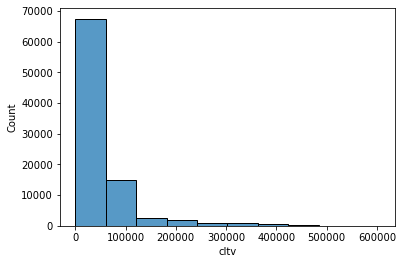

In [179]:
sns.histplot(error, bins = 10)

<AxesSubplot:xlabel='cltv', ylabel='Count'>

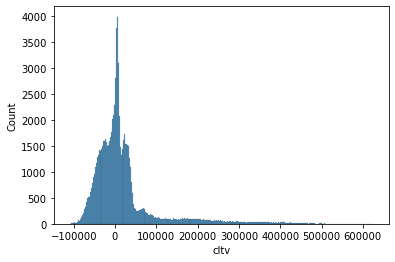

In [155]:
sns.histplot(error + 20000)

In [147]:
test['cltv'] = preds = model.predict(test_features)
test[['id','cltv']].to_csv('cat_sub1.csv',index = False)

In [195]:
len(error[error > 100000])

8348

<AxesSubplot:xlabel='cltv', ylabel='Count'>

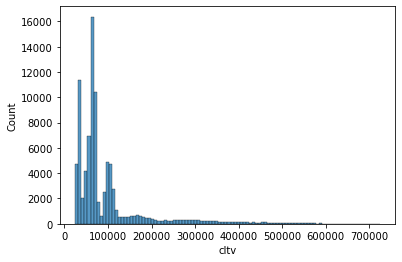

In [204]:
sns.histplot(train['cltv'], bins = 100)